In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load Data

In [ ]:
df0 = pd.read_csv('/content/drive/MyDrive/Kì I 24 25/Finale Data Preparation/Data/previous_application.csv')
df0.head()

,SK_ID_PREV,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,SK_ID_CURR
0,2030495,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,...,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0,293189
1,1696966,Consumer loans,68258.655,1800000.0,1754721.0,180000.0,1800000.0,SATURDAY,18,Y,...,36.0,low_normal,POS industry with interest,NaN,NaN,NaN,NaN,NaN,NaN,293189
2,2154916,Consumer loans,12417.390,108400.5,119848.5,0.0,108400.5,SUNDAY,14,Y,...,12.0,middle,POS industry with interest,365243.0,-512.0,-182.0,-392.0,-387.0,0.0,293189
3,2802425,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,...,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0,91587
4,1536272,Cash loans,21709.125,450000.0,512370.0,NaN,450000.0,WEDNESDAY,9,Y,...,36.0,low_normal,Cash X-Sell: low,365243.0,-485.0,565.0,-155.0,-147.0,1.0,91587


In [ ]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1413701 non-null  int64  
 1   NAME_CONTRACT_TYPE           1413701 non-null  object 
 2   AMT_ANNUITY                  1106483 non-null  float64
 3   AMT_APPLICATION              1413701 non-null  float64
 4   AMT_CREDIT                   1413700 non-null  float64
 5   AMT_DOWN_PAYMENT             664161 non-null   float64
 6   AMT_GOODS_PRICE              1094176 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1413701 non-null  object 
 8   HOUR_APPR_PROCESS_START      1413701 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1413701 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1413701 non-null  int64  
 11  RATE_DOWN_PAYMENT            664161 non-null   float64
 12  RATE_INTEREST_PRIMARY        4791 non-null

- NAME_CONTRACT_TYPE: loại khoản vay
- AMT_ANNUITY: trái phiếu đồng niên/niêm kim
- AMT_APPLICATION: số tiền người đó muốn vay
- AMT_CREDIT: số tiền thực tế đã vay được
- AMT_DOWN_PAYMENT: số tiền phải trả trước
- AMT_GOODS_PRICE: giá của sản phẩm mà khách hàng yêu cầu ở lần vay trước
- WEEKDAY_APPR_PROCESS_START: ngày khách hàng đăng kí
- HOUR_APPR_PROCESS_START: giờ khách hàng đăng kí
- FLAG_LAST_APPL_PER_CONTRACT: đánh dấu nếu đây là lần đăng kí cuối cùng của hợp đồng cho vay bởi đôi khi 1 hợp đồng cho vay sẽ có nhiều lần đăng kí
- NFLAG_LAST_APPL_IN_DAY: đánh dấu nếu đây là lần đăng kí cuối cùng trong ngày bởi khách có thể đăng kí nhiều lần trong 1 ngày
- NFLAG_MICRO_CASH: đánh dấu nếu đây là khoản vay tài chính vi mô (các dịch vụ ngân hàng dành cho những người có thu nhập thấp và không thể tiếp cận các dịch vụ tài chính khác, cung cấp những khoản vay nhỏ an toàn và hợp lí với lãi suất thấp.)
- RATE_DOWN_PAYMENT: tỉ lệ tiền đặt cọc đã được normalized
- RATE_INTEREST_PRIMARY: tỉ lệ lãi suất chính đã được normalized
- NAME_CASH_LOAN_PURPOSE: mục đích vay tiền mặt
- NAME_CONTRACT_STATUS: tình trạng của hợp đồng (Cancled là tự khách hàng hủy application trong quá trình approval, Unused offer cũng giống kiểu cancled nhưng ở giai đoạn khác trong process)
- DAYS_DECISION: liên quan đến lần đăng kí hiện tại, khi nào khách hàng đưa ra quyết định về lần vay trước
- NAME_PAYMENT_TYPE: Phương án trả tiền khoản vay trước đó
- CODE_REJECT_REASON: lý do chính bị từ chối cho vay
- NAME_TYPE_SUITE: người đi cùng với khách hàng khi đăng kí vay
- NAME_CLIENT_TYPE: cho biết khách hàng là người vay cũ hay lần đầu vay
- NAME_GOODS_CATEGORY: loại sản phẩm mà khách hàng muốn vay để mua
- NAME_PORTFOLIO: khách hàng muốn vay gì : tiền mặt, điểm mua hàng,...
- NAME_PRODUCT_TYPE: x-sell: người mua đã mua 1 sp nào đó ở home credit rồi và sp đó bây giờ được bán lại, walk-in: khách hàng tự đến physical store để đăng kí vay
- CHANNEL_TYPE: thông qua kênh nào mà có được khách hàng
- SELLERPLACE_AREA: khu vực bán hàng của người bán lần apply trước
- NAME_SELLER_INDUSTRY: ngành hàng của người bán
- CNT_PAYMENT: credit term của lần vay trước (thừi gian)
- NAME_YIELD_GROUP: nhóm các loại lãi suất từ nhỏ, trung bình, cao
- PRODUCT_COMBINATION: chi tiết sản phẩm kết hợp của lần vay trước (POS or CASH combination)
- DAYS_FIRST_DRAWING: mối liên quan giữa ngày đăng kí hiện tại cho đến ngày giải ngân của lần vay trước
- DAYS_FIRST_DUE: ngày đáo hạn đầu tiên là khi nào ( first installment)
- DAYS_LAST_DUE_1ST_VERSION: ngày đáo hạn cuối cùng theo kế hoạch là khi nào(last installment) - thông tin từ thời điểm đăng kí
- DAYS_LAST_DUE: ngày đến hạn cuối cùng là khi nào (lần trả góp cuối cùng)-thông tin gần đây nhất (ngày đến hạn cuối cùng có thể thay đổi, ví dụ: trong trường hợp trả nợ sớm hoặc gặp khó khăn trong việc thanh toán)
- DAYS_TERMINATION: Liên quan đến ngày nộp đơn của đơn hiện tại khi nào dự kiến ​​đơn đăng ký trước đó sẽ chấm dứt
- NFLAG_INSURED_ON_APPROVAL: đánh dấu khách hàng có yêu cầu bảo hiểm trong suốt lần đăng kí trước không



### Categorical Features
- NAME_CONTRACT_TYPE
- WEEKDAY_APPR_PROCESS_START
- FLAG_LAST_APPL_PER_CONTRACT
- NAME_CASH_LOAN_PURPOSE
- NAME_CONTRACT_STATUS
- NAME_PAYMENT_TYPE
- CODE_REJECT_REASON
- NAME_TYPE_SUITE
- NAME_CLIENT_TYPE
- NAME_GOODS_CATEGORY
- NAME_PORTFOLIO
- NAME_PRODUCT_TYPE
- CHANNEL_TYPE
- NAME_SELLER_INDUSTRY
- NAME_YIELD_GROUP
- PRODUCT_COMBINATION
- NAME_SELLER_INDUSTRY
- NAME_YIELD_GROUP
- NAME_PRODUCT_TYPE
- CHANNEL_TYPE
- CODE_REJECT_REASON
- NAME_PORTFOLIO
- NAME_GOODS_CATEGORY
- NAME_CLIENT_TYPE
- NAME_CONTRACT_TYPE
- NAME_PAYMENT_TYPE
- NAME_CONTRACT_STATUS
- NAME_CASH_LOAN_PURPOSE

### Numerical Features
- SK_ID_PREV
- AMT_ANNUITY
- AMT_APPLICATION
- AMT_CREDIT
- AMT_DOWN_PAYMENT
- AMT_GOODS_PRICE
- HOUR_APPR_PROCESS_START
- NFLAG_LAST_APPL_IN_DAY
- RATE_DOWN_PAYMENT
- RATE_INTEREST_PRIMARY
- RATE_INTEREST_PRIVILEGED
- DAYS_DECISION
- SELLERPLACE_AREA
- CNT_PAYMENT
- DAYS_FIRST_DRAWING
- DAYS_FIRST_DUE
- DAYS_LAST_DUE_1ST_VERSION
- DAYS_LAST_DUE
- DAYS_TERMINATION
- NFLAG_INSURED_ON_APPROVAL
- SK_ID_CURR


In [ ]:
df0.describe()

,SK_ID_PREV,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,...,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,SK_ID_CURR
count,1.413701e+06,1.106483e+06,1.413701e+06,1.413700e+06,6.641610e+05,1.094176e+06,1.413701e+06,1.413701e+06,664161.000000,4791.000000,...,1.413701e+06,1.413701e+06,1.106488e+06,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000,1.413701e+06
mean,1.922744e+06,1.583718e+04,1.752436e+05,1.963541e+05,6.655317e+03,2.264512e+05,1.247893e+01,9.964321e-01,0.080175,0.189436,...,-8.803670e+02,3.149878e+02,1.605194e+01,342257.656710,13488.741567,33274.831806,76665.634755,82353.171672,0.330572,1.537647e+05
std,5.327153e+05,1.472491e+04,2.936222e+05,3.194813e+05,2.062030e+04,3.159376e+05,3.331474e+00,5.962560e-02,0.107784,0.090849,...,7.835402e+02,7.695082e+03,1.456675e+01,88832.266598,71650.147146,106161.775933,149704.716371,153537.064274,0.470419,8.867392e+04
min,1.000001e+06,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,...,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000,0.000000e+00
25%,1.461346e+06,6.257858e+03,1.975050e+04,2.488050e+04,0.000000e+00,4.982850e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,...,-1.313000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1630.000000,-1244.000000,-1316.000000,-1269.000000,0.000000,7.692000e+04
50%,1.922698e+06,1.122376e+04,7.087050e+04,8.059500e+04,1.791000e+03,1.102455e+05,1.200000e+01,1.000000e+00,0.062489,0.189136,...,-5.820000e+02,4.000000e+00,1.200000e+01,365243.000000,-825.000000,-358.000000,-534.000000,-494.000000,0.000000,1.536860e+05
75%,2.384012e+06,2.042078e+04,1.800000e+05,2.156400e+05,7.695000e+03,2.295000e+05,1.500000e+01,1.000000e+00,0.108912,0.193330,...,-2.710000e+02,8.500000e+01,2.400000e+01,365243.000000,-408.000000,135.000000,-73.000000,-42.000000,1.000000,2.305300e+05
max,2.845381e+06,4.180581e+05,5.850000e+06,4.509688e+06,3.060045e+06,5.850000e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,...,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000,3.075100e+05


### Invalid data


- `DAYS_FIRST_DRAWING`: Represents the number of days before or after the application date when the first installment of a credit or loan was supposed to be drawn. => 365243(~1000years) impossible because it is beyond any reasonable timeframe for financial transactions. => convert to 'nan'

- Same for Day column, convert with these value to nan

In [ ]:
day = ['DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']
for i in day:
    df0[i].replace(365243, np.nan, inplace = True)

<ipython-input-6-e9271280427a>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df0[i].replace(365243, np.nan, inplace = True)


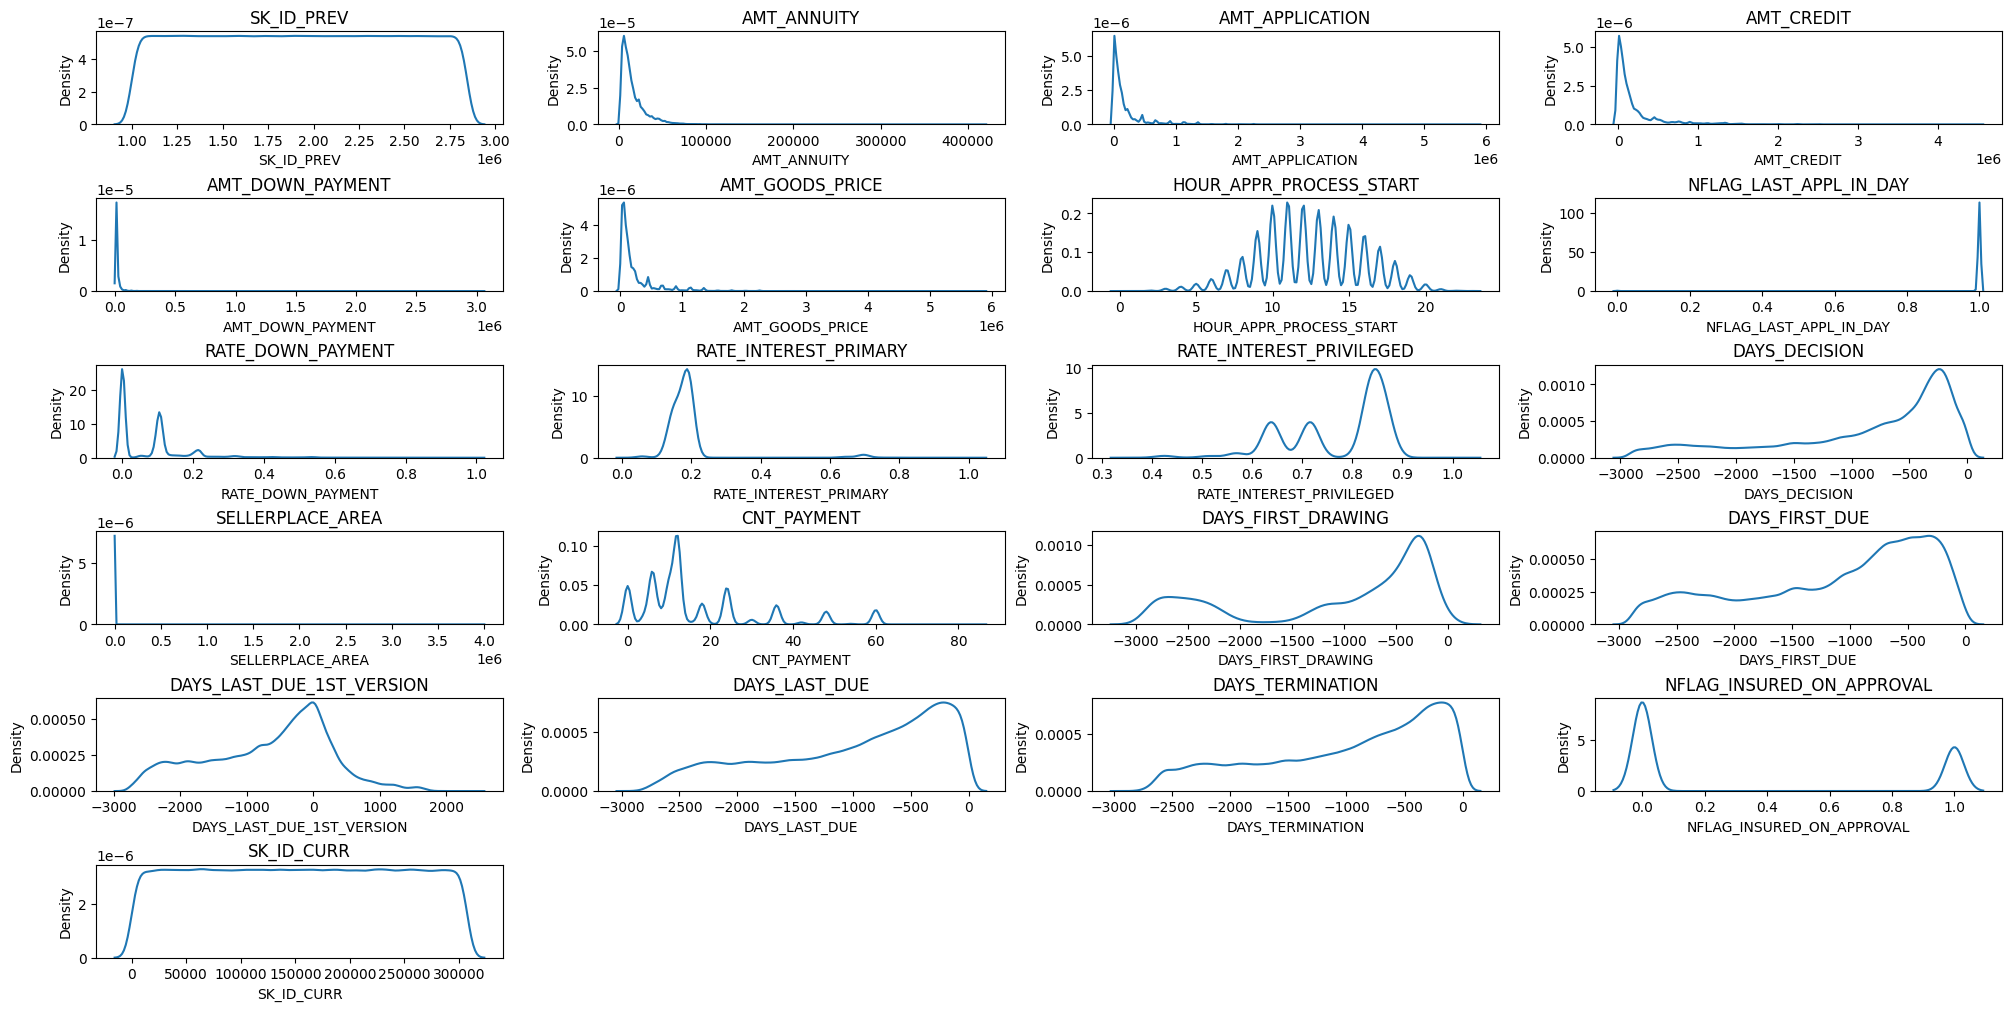

In [ ]:
# Plot distribution of numerical columns
numeric_cols = df0.select_dtypes(include=['int64', 'float64']).columns
ncol, nrow = 4, len(numeric_cols) // 4 + 1
fig, axes = plt.subplots(nrow, ncol, figsize=(20, len(numeric_cols)//2), constrained_layout=True)

for ax, column in zip(axes.flatten(), numeric_cols):
    sns.kdeplot(df0[column], ax=ax)
    ax.set_title(column)

# Remove any empty subplots
for i in range(len(numeric_cols), nrow * ncol):
    fig.delaxes(axes.flatten()[i])

plt.show()

## Check duplicated

In [ ]:
# duplicated row
df0.duplicated().sum()

0

## Check Missing data

In [ ]:
# % missing data of each feature
def check_missing(df):
    total_m = df.isnull().sum().sort_values(ascending=False)
    pct_m = df.isnull().sum() *100/df.isnull().count().sort_values(ascending=False)
    df= pd.concat([total_m, pct_m], axis = 1, keys = ['Total', 'Percent'])
    df =df[df['Percent']>0]
    return df
null_values = check_missing(df0)
null_values

,Total,Percent
RATE_INTEREST_PRIVILEGED,1408910,99.661102
RATE_INTEREST_PRIMARY,1408910,99.661102
DAYS_FIRST_DRAWING,1360200,96.215536
DAYS_TERMINATION,755106,53.413416
RATE_DOWN_PAYMENT,749540,53.019698
AMT_DOWN_PAYMENT,749540,53.019698
DAYS_LAST_DUE,741898,52.479131
NAME_TYPE_SUITE,694672,49.138538
DAYS_LAST_DUE_1ST_VERSION,640205,45.285743
DAYS_FIRST_DUE,595068,42.092918


RATE_INTEREST_PRIVILEGED, RATE_INTEREST_PRIMARY gần như missing value cả, mắc dù hai feature đã được normalized, => maybe se drop 2 features này, xem thêm correlation

In [ ]:
df1 = df0.copy(deep=True)
df1.drop(['RATE_INTEREST_PRIVILEGED', 'RATE_INTEREST_PRIMARY'], axis = 1, inplace = True)

In [ ]:
df1.head()

,SK_ID_PREV,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,SK_ID_CURR
0,2030495,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,...,12.0,middle,POS mobile with interest,NaN,-42.0,300.0,-42.0,-37.0,0.0,293189
1,1696966,Consumer loans,68258.655,1800000.0,1754721.0,180000.0,1800000.0,SATURDAY,18,Y,...,36.0,low_normal,POS industry with interest,NaN,NaN,NaN,NaN,NaN,NaN,293189
2,2154916,Consumer loans,12417.390,108400.5,119848.5,0.0,108400.5,SUNDAY,14,Y,...,12.0,middle,POS industry with interest,NaN,-512.0,-182.0,-392.0,-387.0,0.0,293189
3,2802425,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,...,36.0,low_action,Cash X-Sell: low,NaN,-134.0,916.0,NaN,NaN,1.0,91587
4,1536272,Cash loans,21709.125,450000.0,512370.0,NaN,450000.0,WEDNESDAY,9,Y,...,36.0,low_normal,Cash X-Sell: low,NaN,-485.0,565.0,-155.0,-147.0,1.0,91587


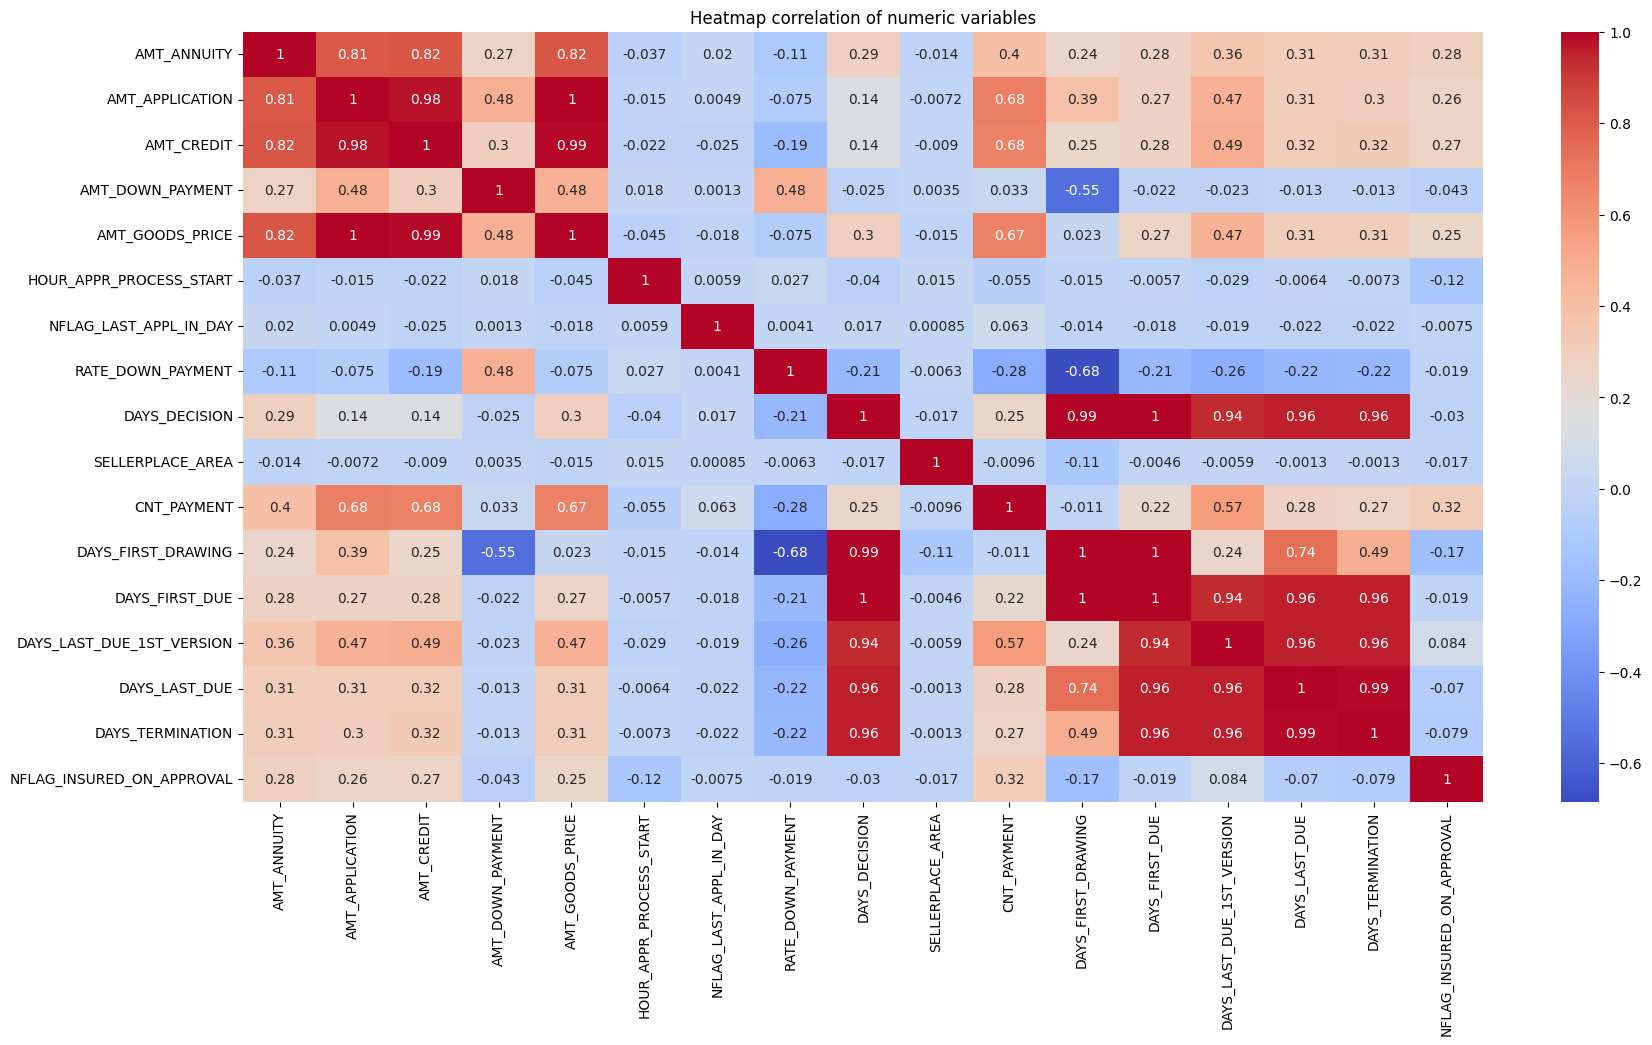

In [ ]:
# numerical features correlation
def plot_heatmap(df):
    plt.figure(figsize=(20,10))
    sns.heatmap(df[df.select_dtypes(include=['int64','float64']).columns].drop(['SK_ID_PREV', 'SK_ID_CURR'], axis = 1).corr(), annot = True, cmap='coolwarm')
    plt.title('Heatmap correlation of numeric variables')
    plt.show()

plot_heatmap(df1)

high correlated feature: => may be drop to avoid multicollinearity
- `DAYS_LAST_DUE` & `DAYS_TERMINATION`
- `AMT_APPLICATION` & `AMT_CREDIT`, `AMT__GOODS_PRICE` & `AMT_ANNUITY`
- `DAYS_LAST_DUE_1ST_VERSION` & `AMT_APPLICATION`



In [ ]:
# check % XNA, XAP in some columns
def check_XNA(df):
    for col in df.columns:
        if df[col].dtype == 'object' and df[col].isin(['XNA']).any():
            missing = df[col].value_counts(normalize=True).get('XNA', 0) * 100
            print(f'{col} has {missing:.2f}% XNA')
check_XNA(df1)

NAME_CONTRACT_TYPE has 0.02% XNA
NAME_CASH_LOAN_PURPOSE has 40.13% XNA
NAME_PAYMENT_TYPE has 36.99% XNA
CODE_REJECT_REASON has 0.31% XNA
NAME_CLIENT_TYPE has 0.11% XNA
NAME_GOODS_CATEGORY has 56.39% XNA
NAME_PORTFOLIO has 21.73% XNA
NAME_PRODUCT_TYPE has 63.67% XNA
NAME_SELLER_INDUSTRY has 50.60% XNA
NAME_YIELD_GROUP has 30.36% XNA


In [ ]:
def check_XAP(df):
    for col in df.columns:
        if df[col].dtype == 'object' and df[col].isin(['XAP']).any():
            missing = df[col].value_counts(normalize=True).get('XAP', 0) * 100
            print(f'{col} has {missing:.2f}% XAP')
check_XAP(df1)

NAME_CASH_LOAN_PURPOSE has 55.67% XAP
CODE_REJECT_REASON has 81.03% XAP


In [ ]:
# Ham fill special categorical value
def fill_missing_special(df, nan_value):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col].replace(nan_value, np.nan, inplace = True)
    return df
nan_value = ['XNA', 'XAP']
df1 = fill_missing_special(df1, nan_value)

<ipython-input-15-d5de2217f404>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace(nan_value, np.nan, inplace = True)


## Check outliers


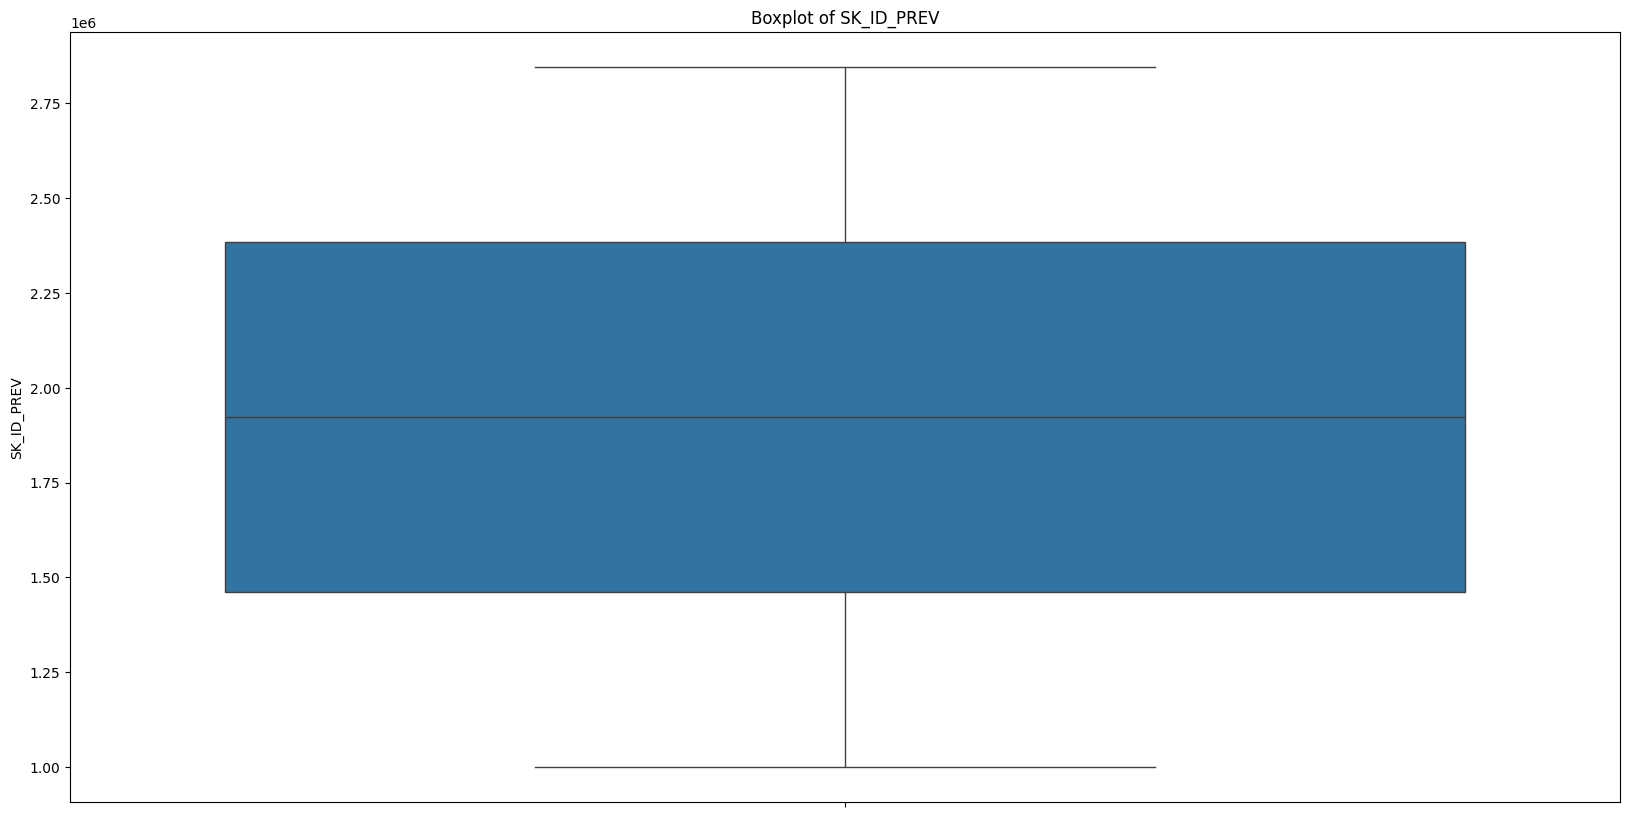

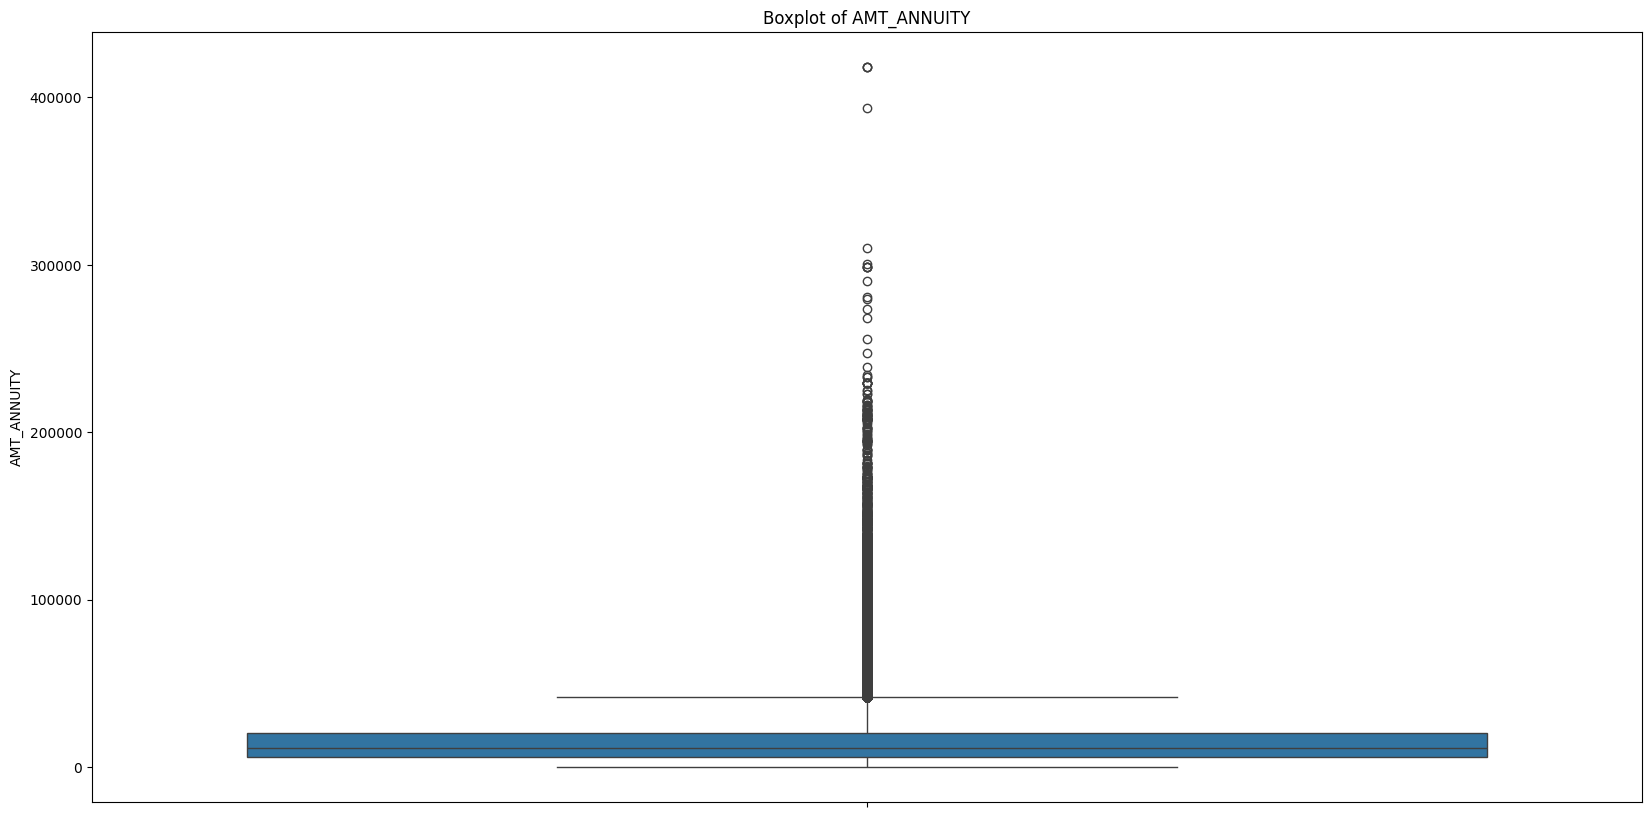

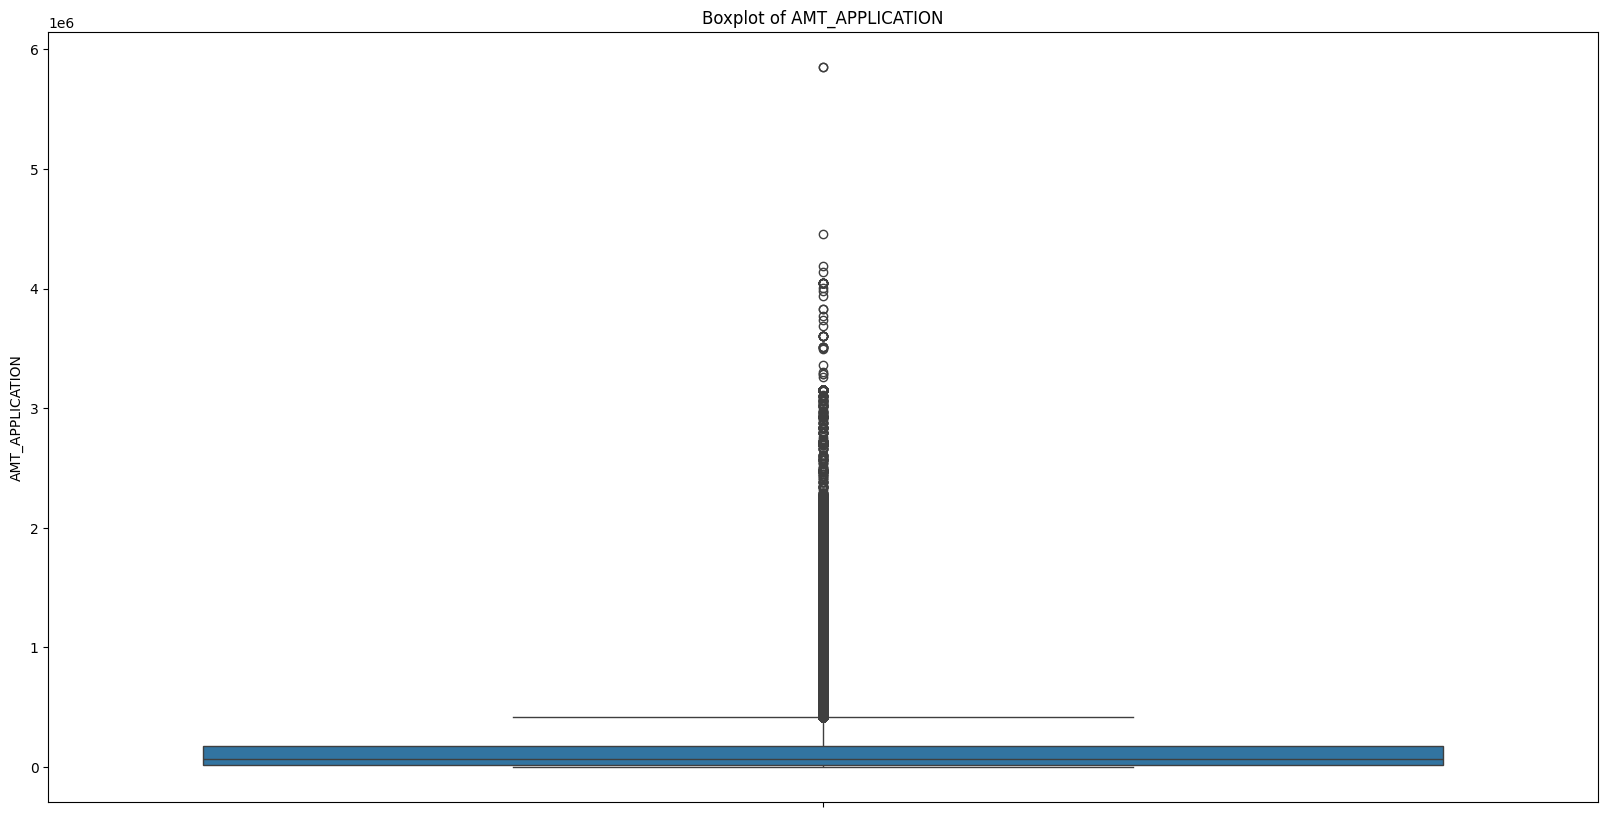

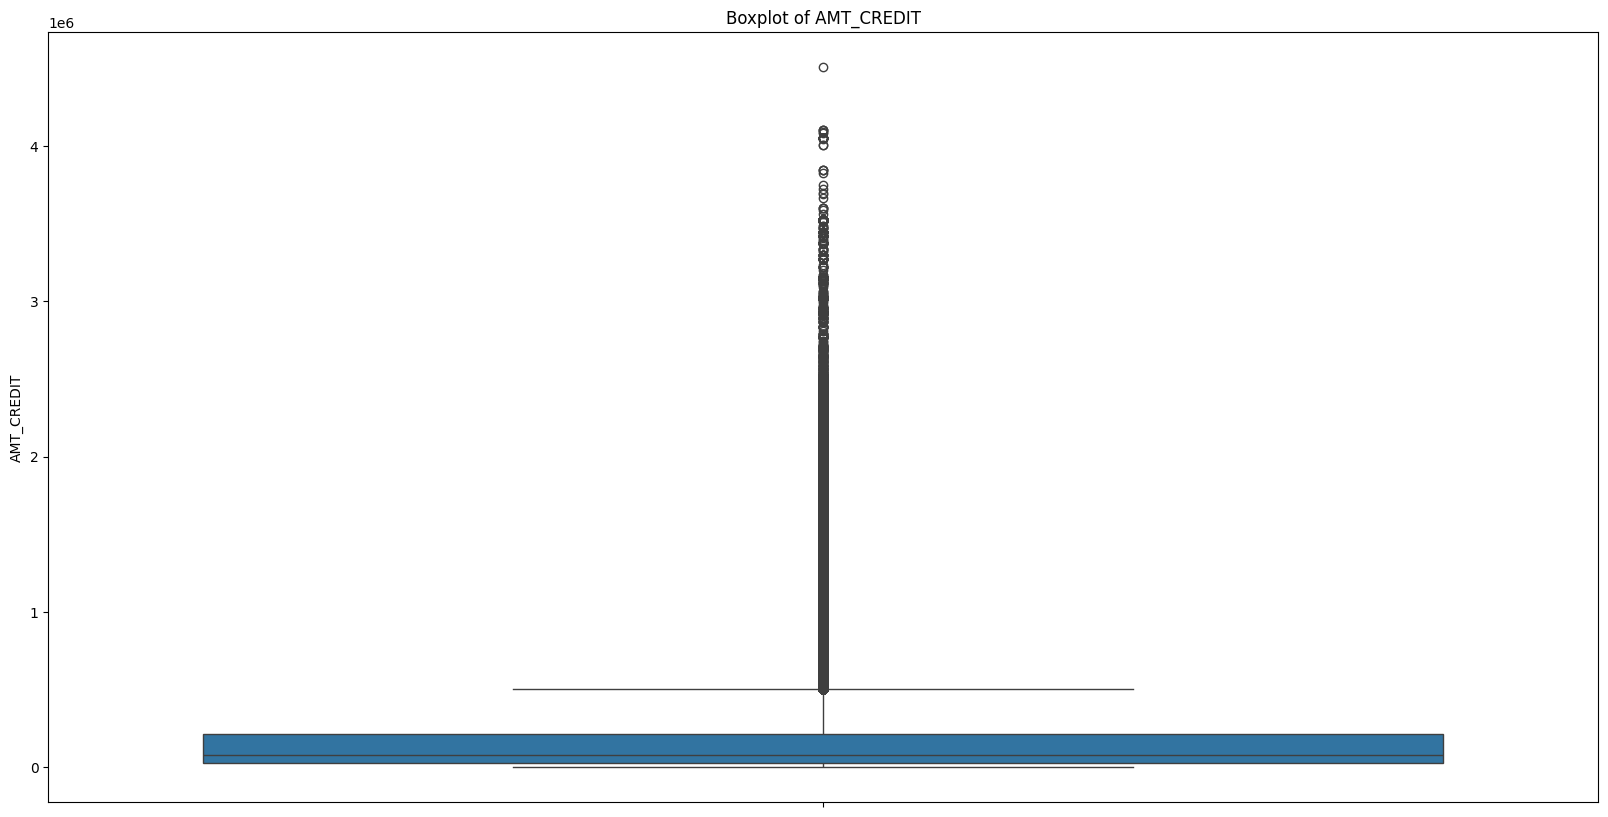

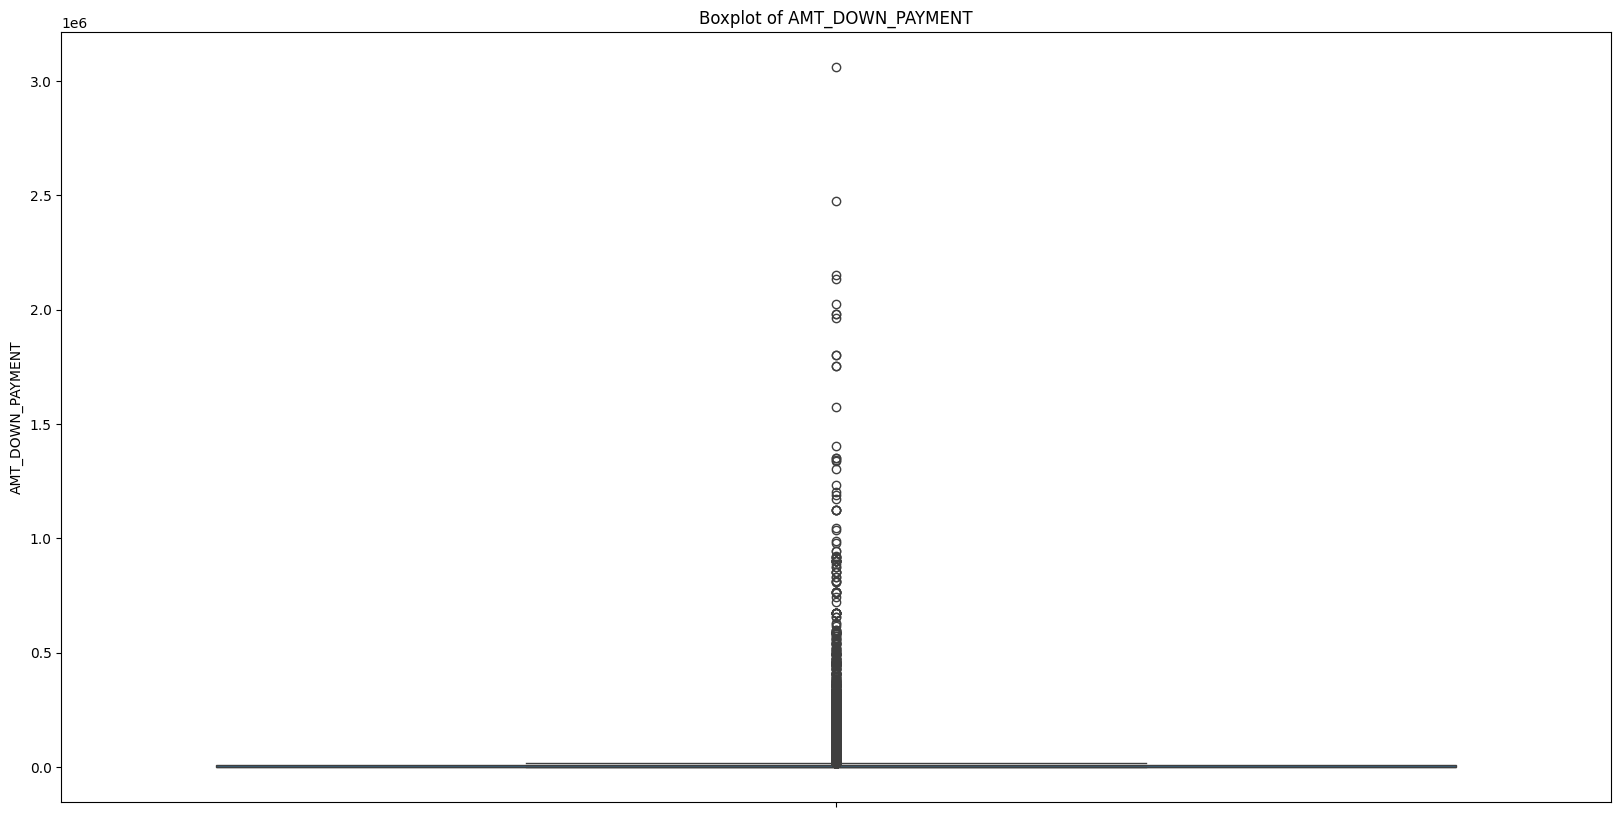

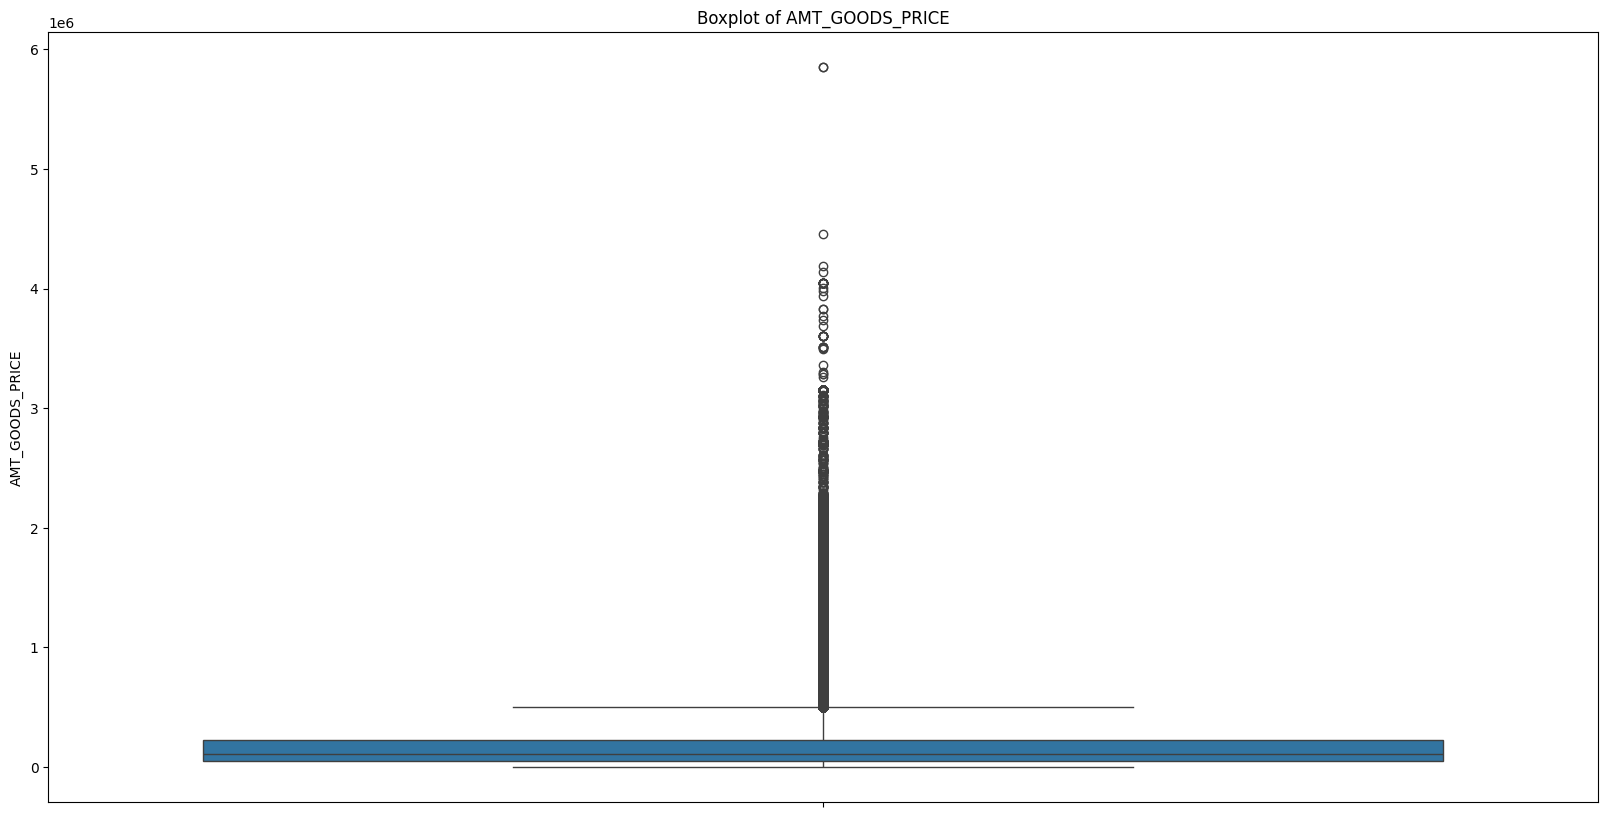

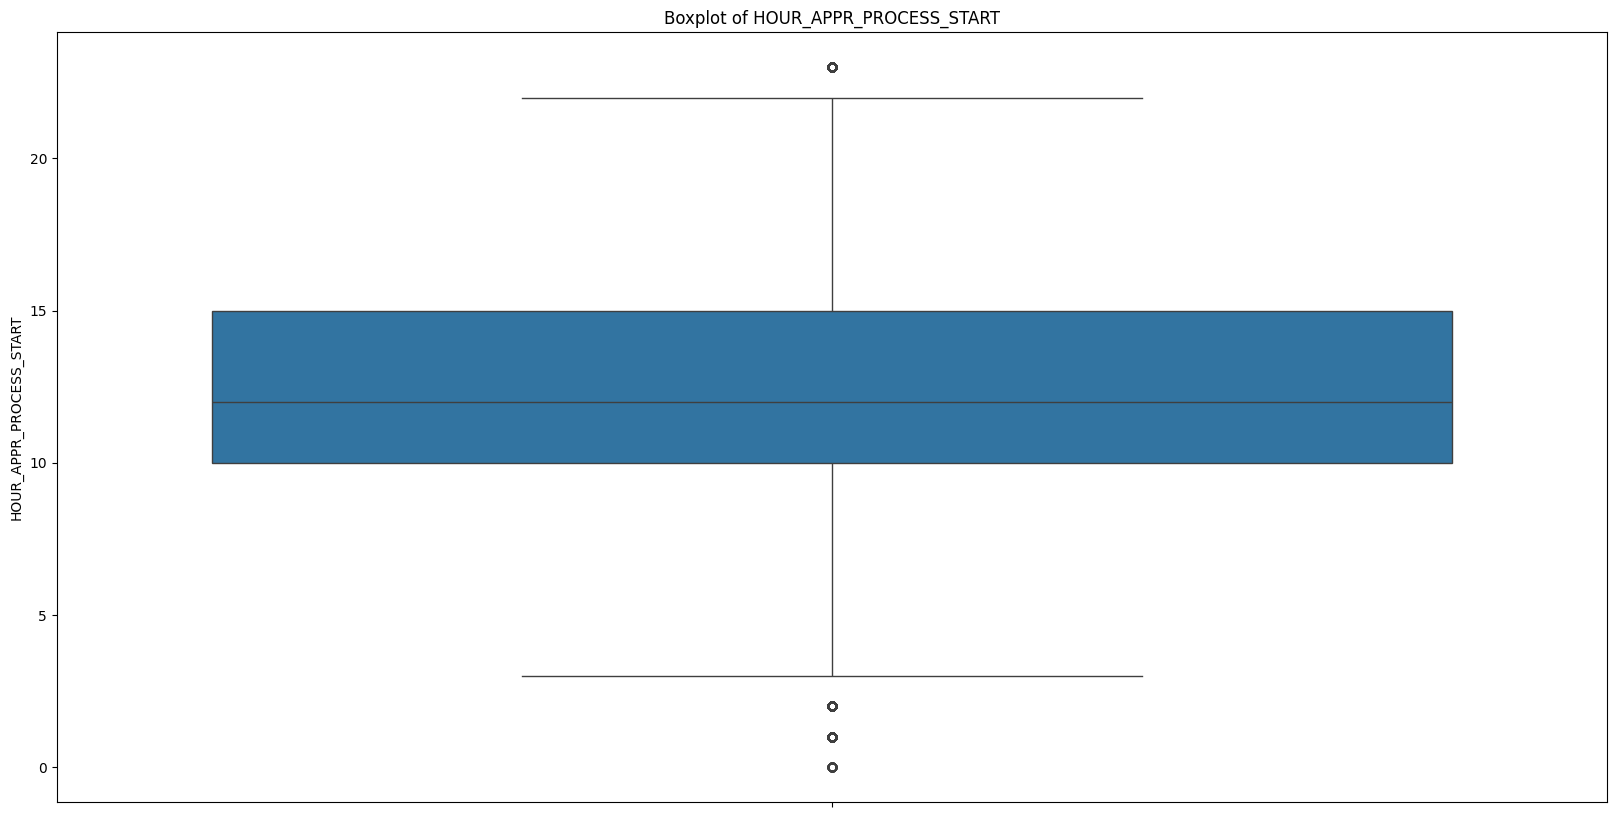

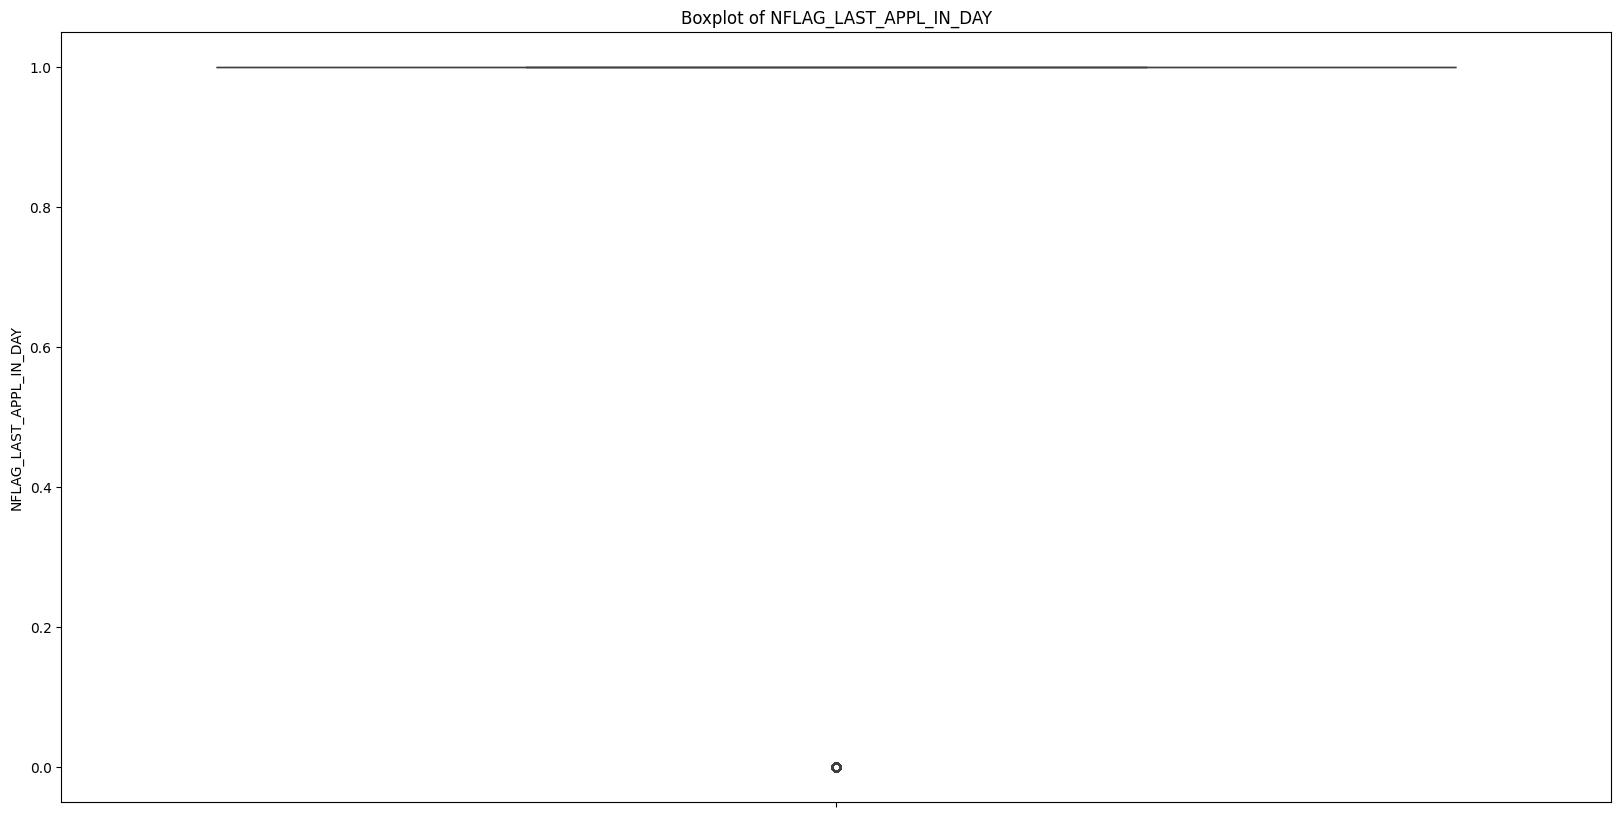

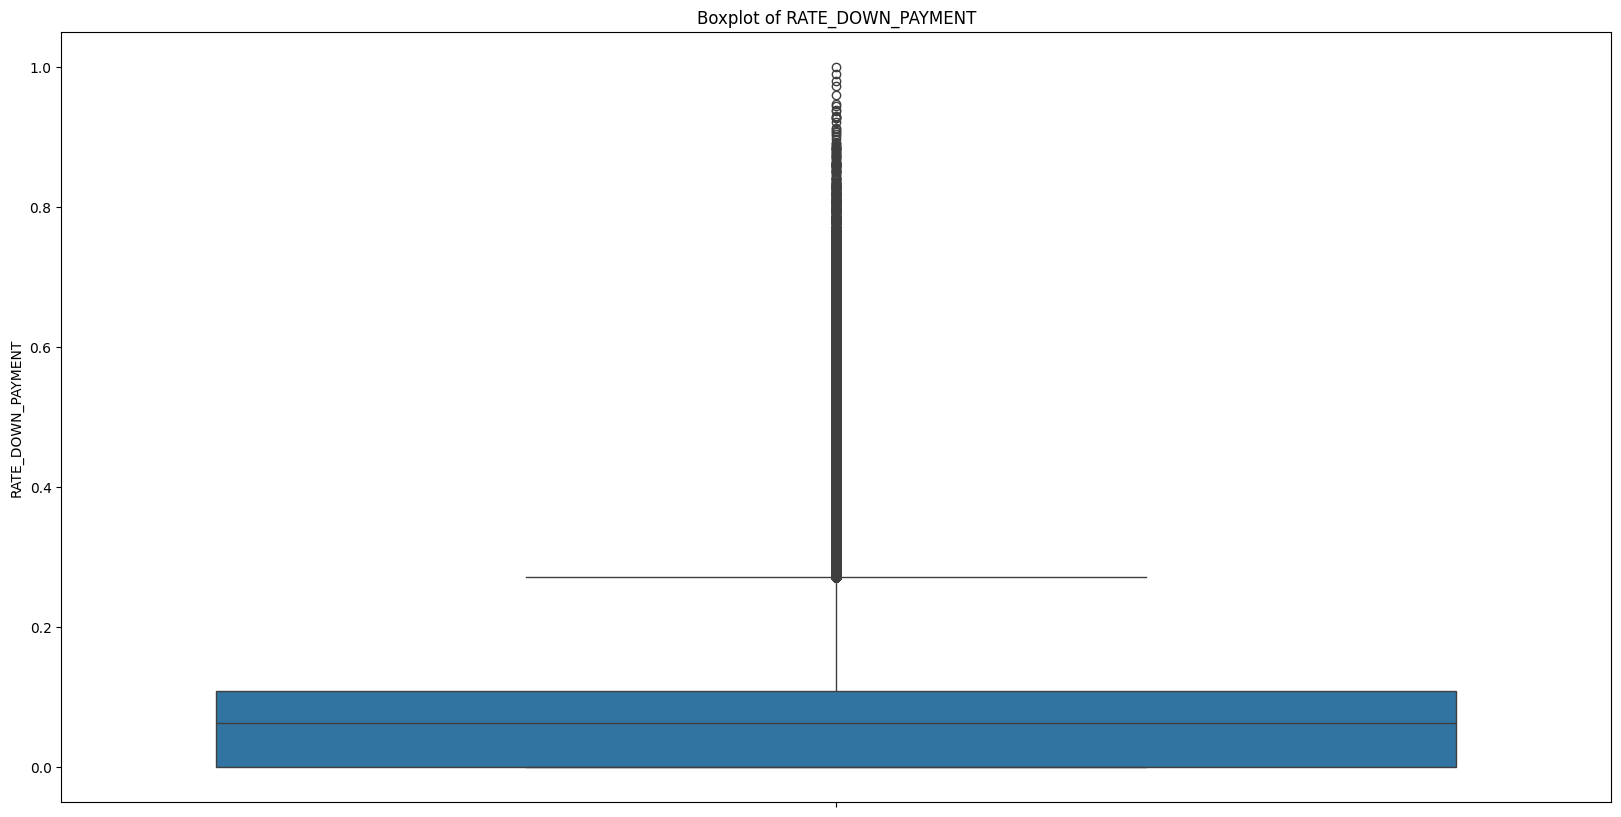

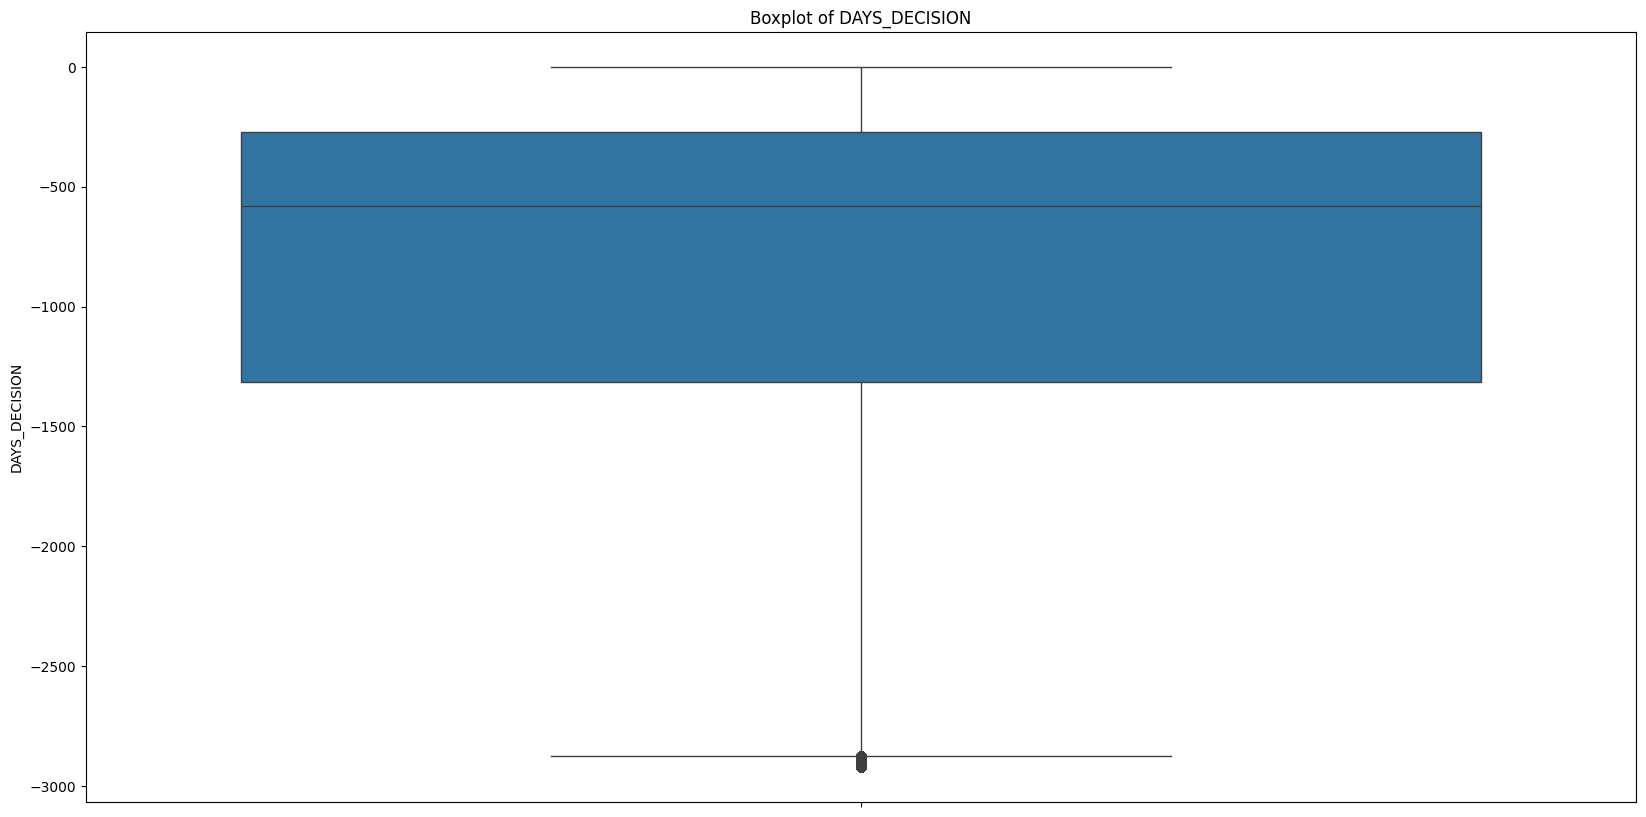

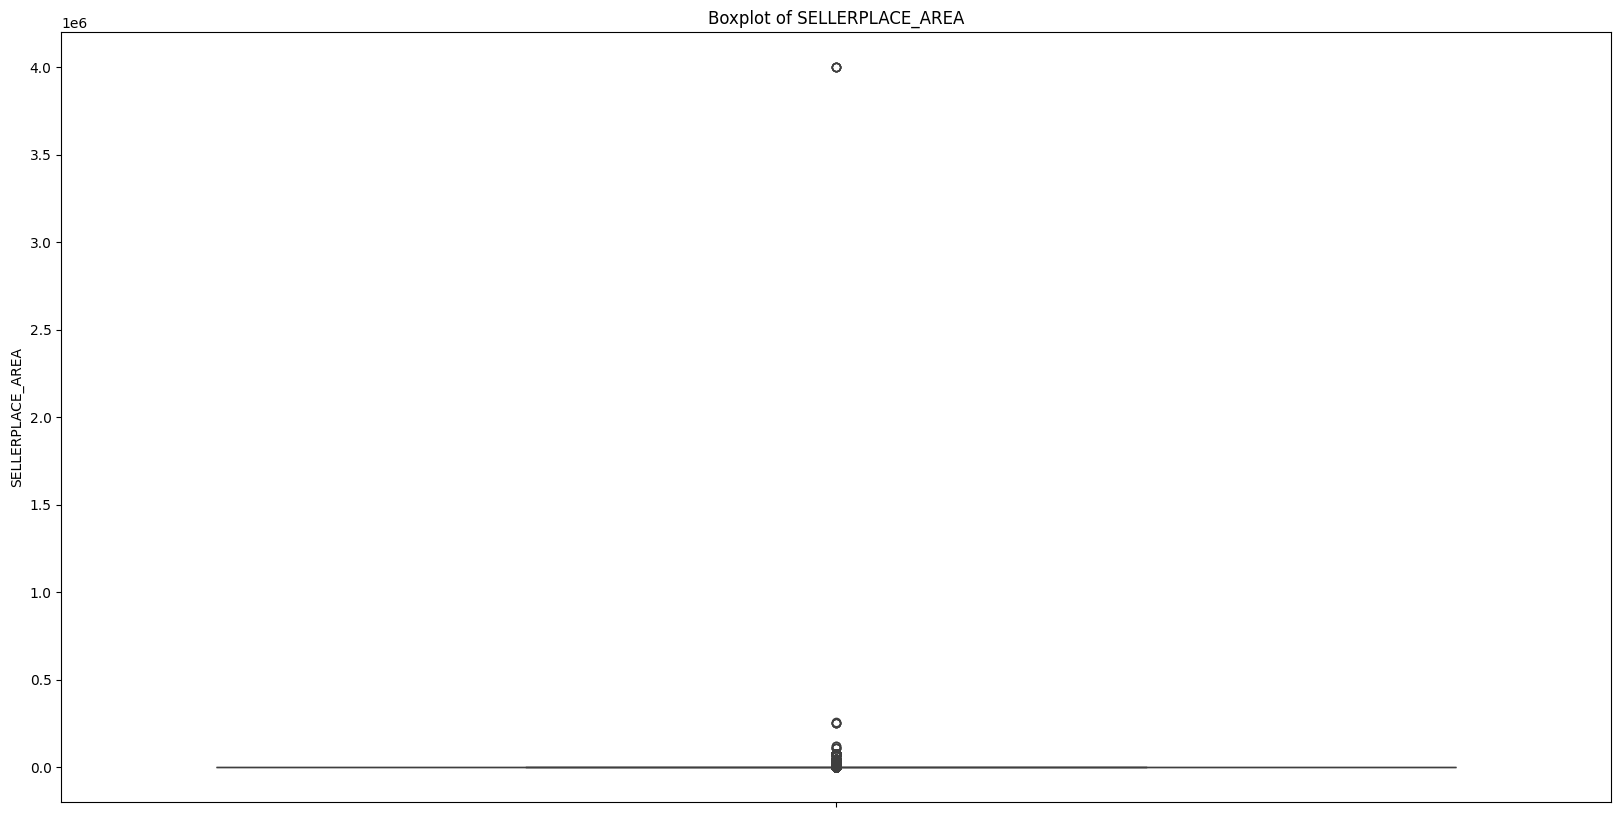

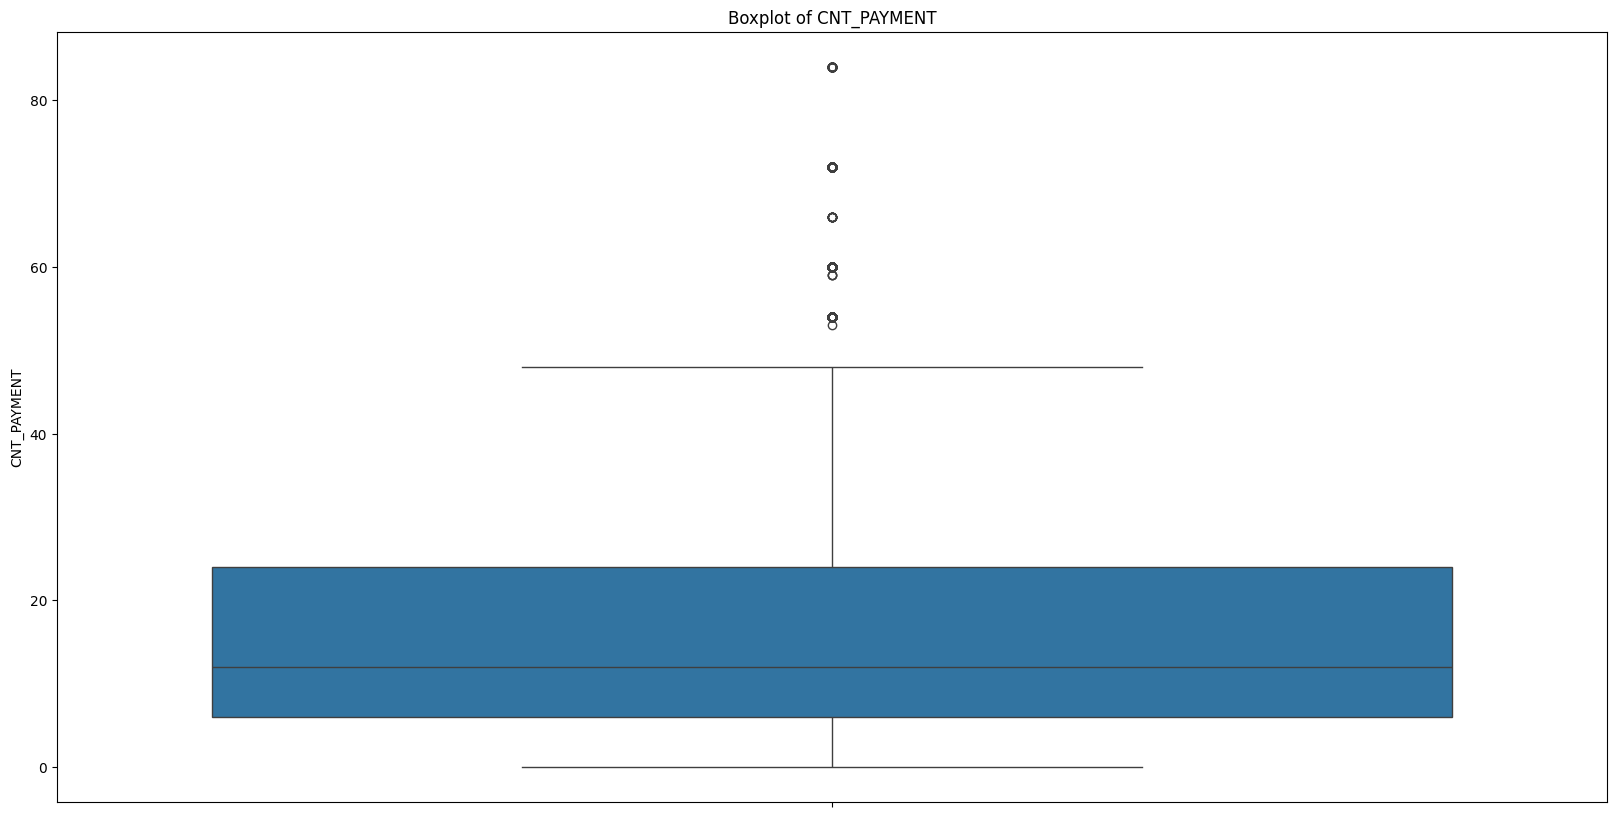

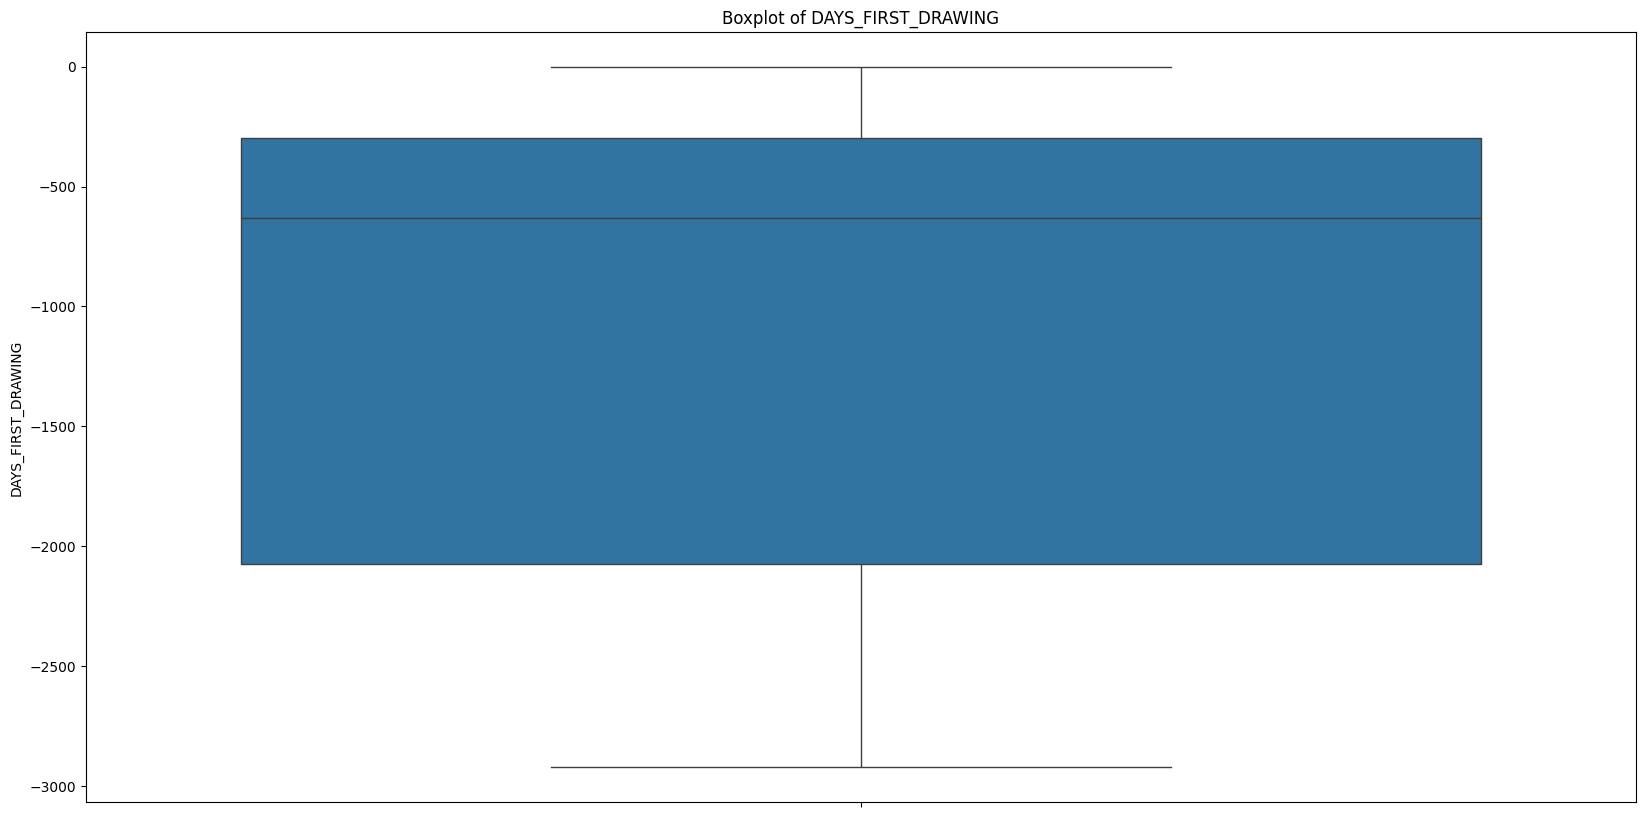

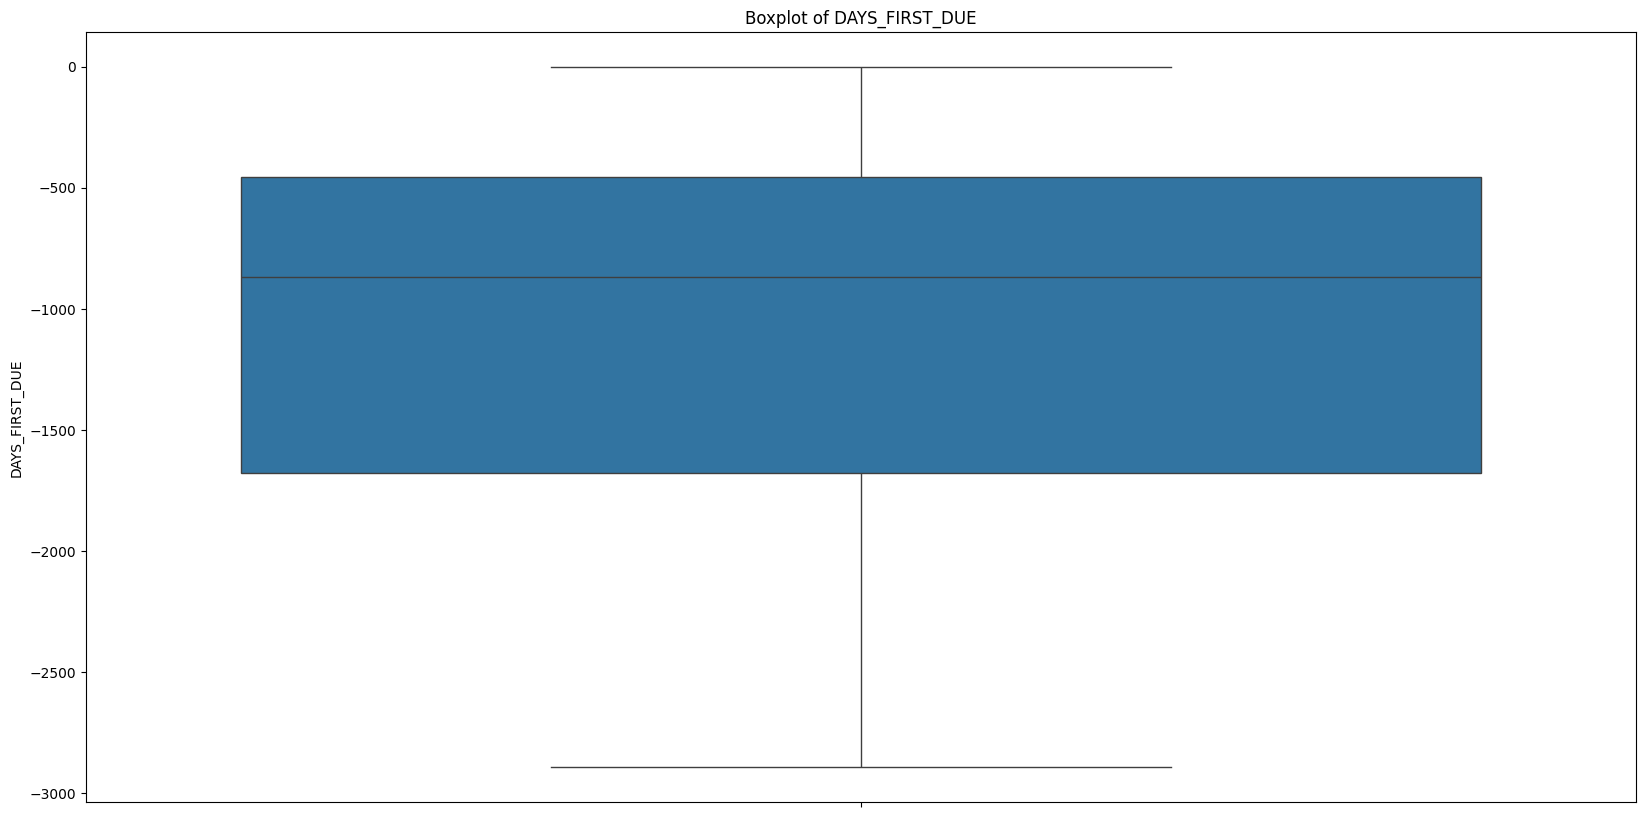

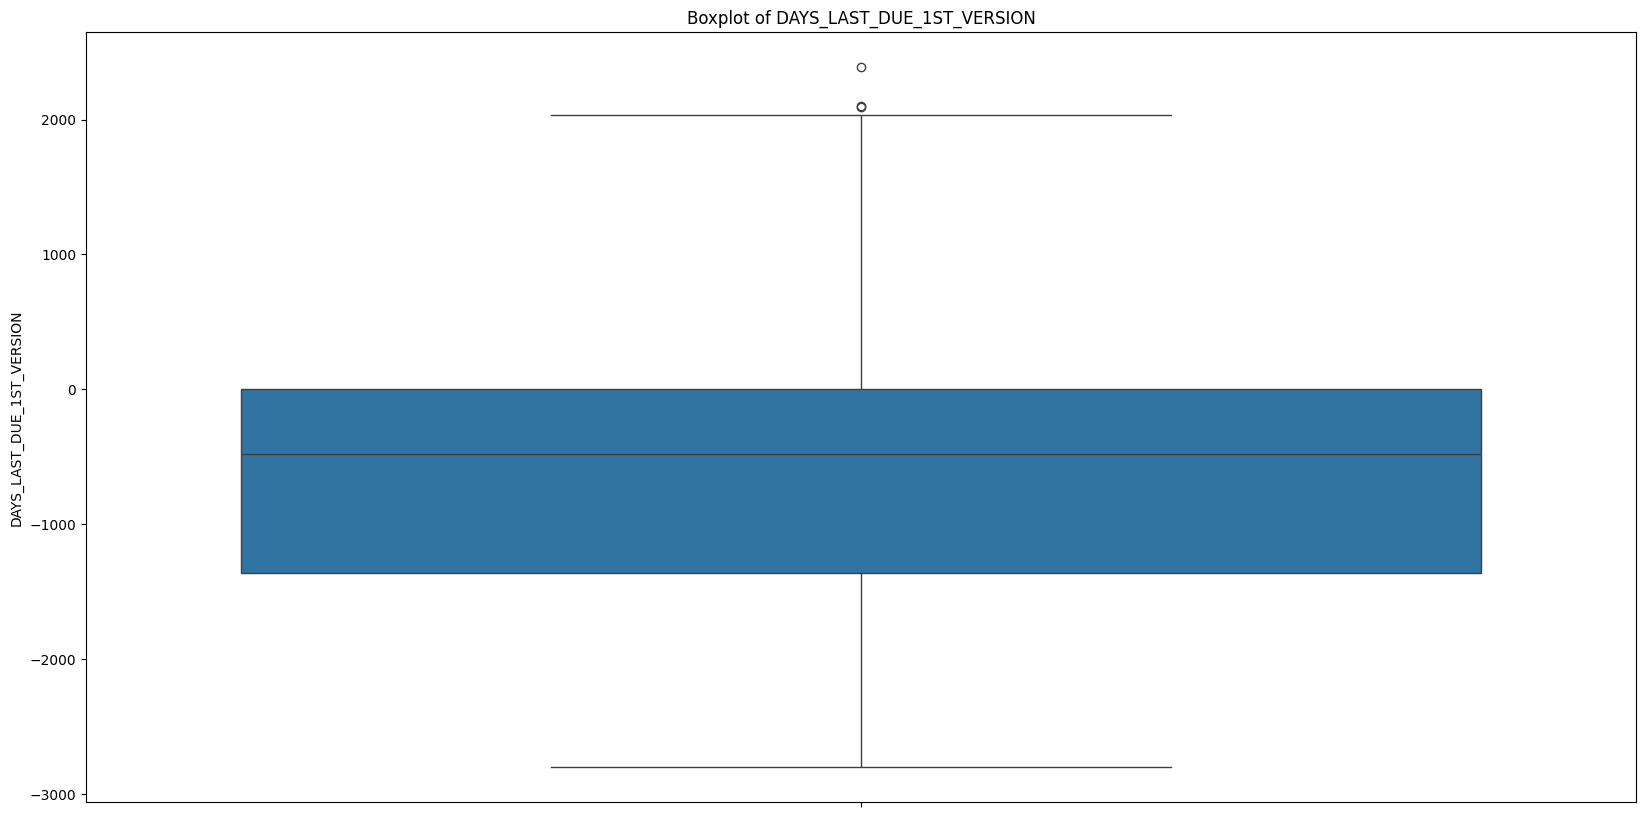

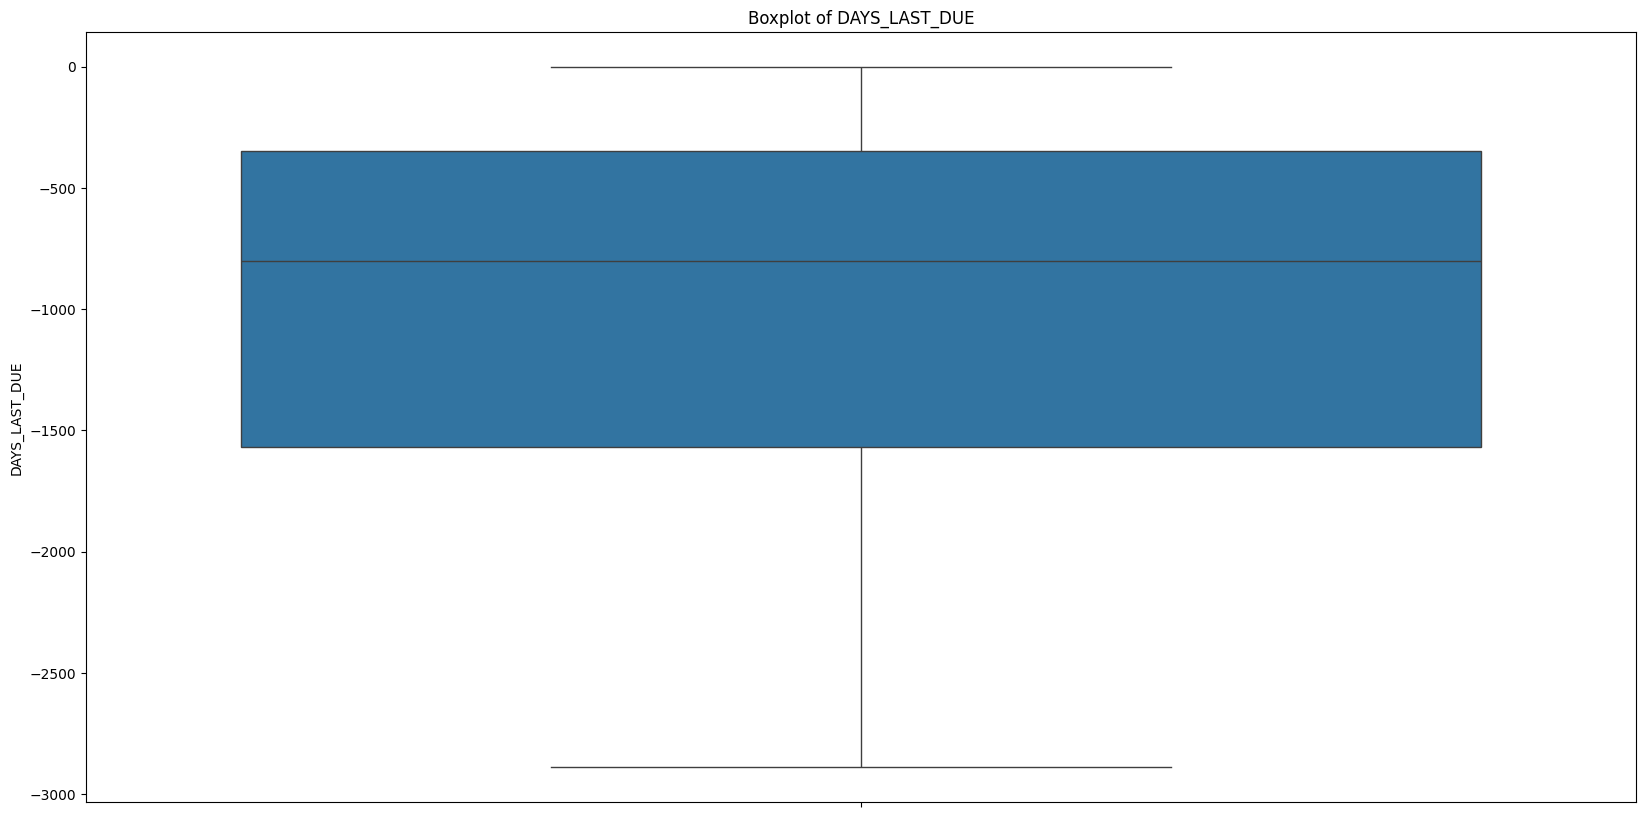

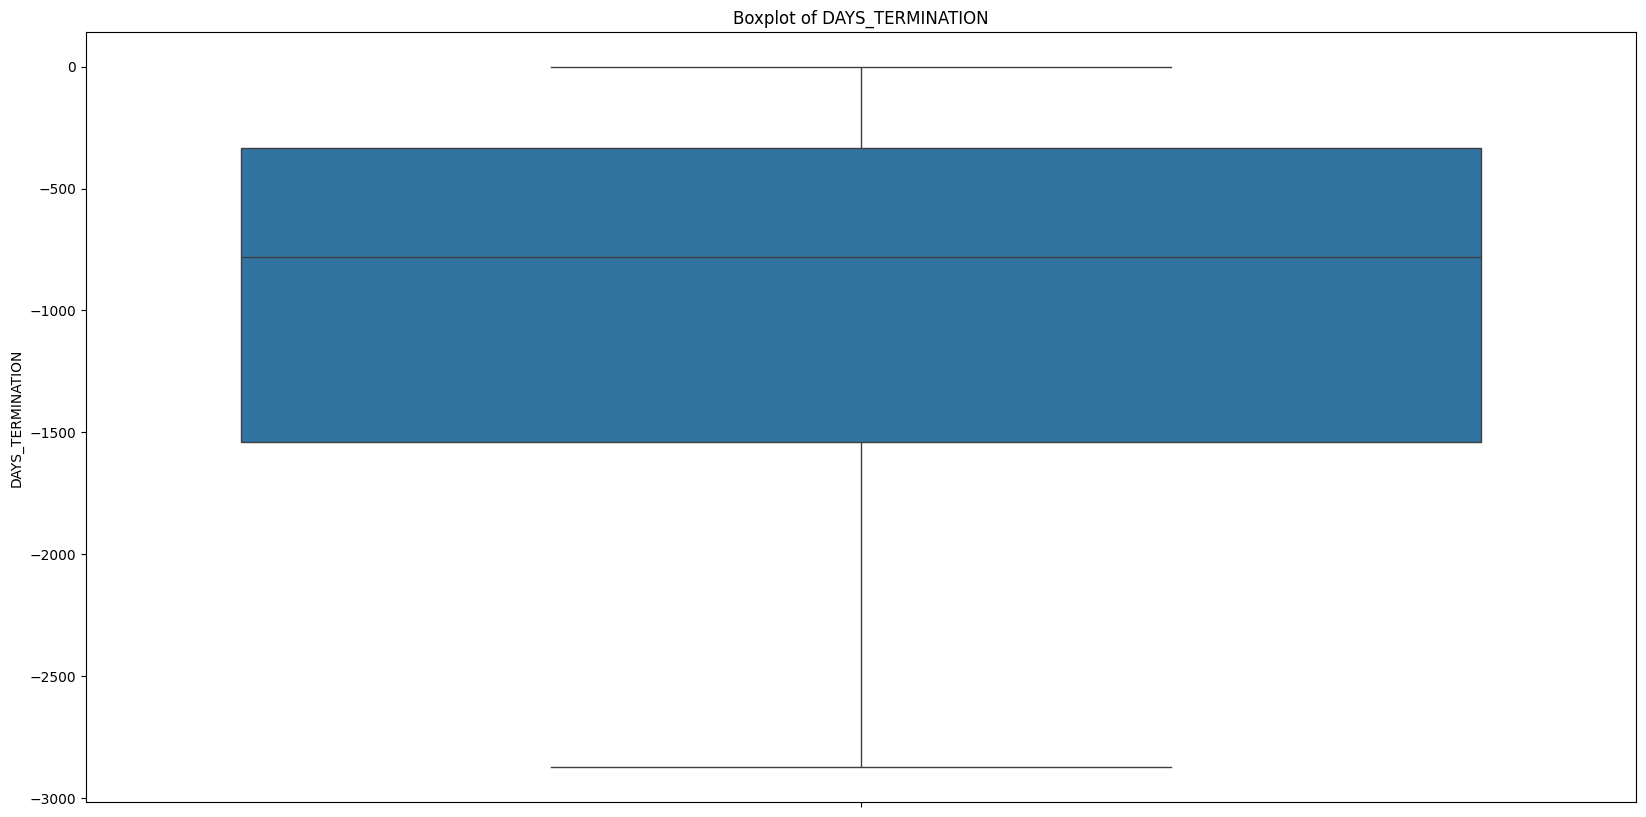

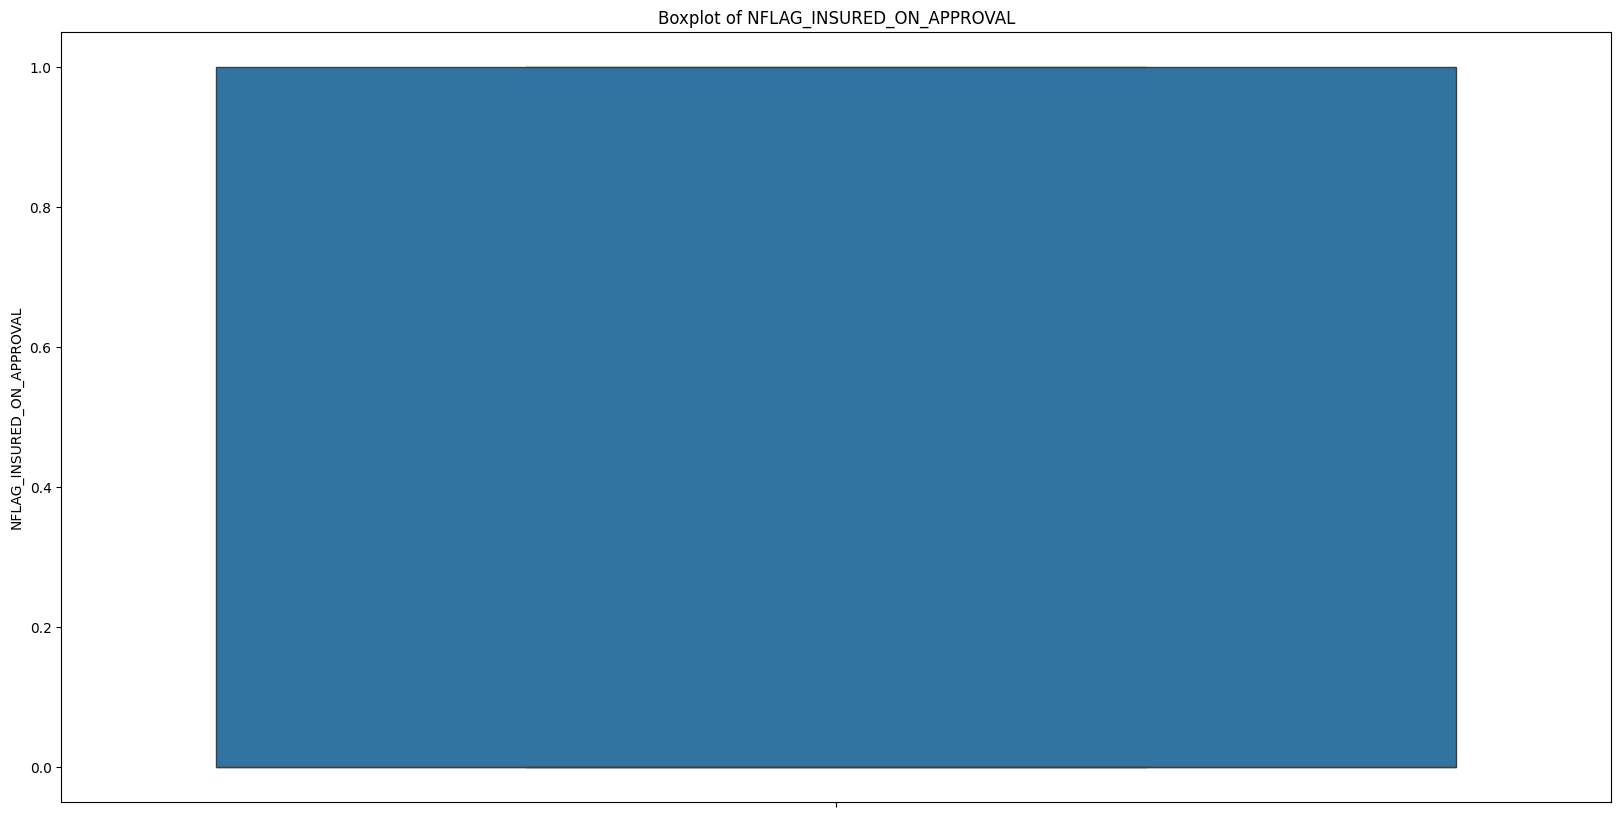

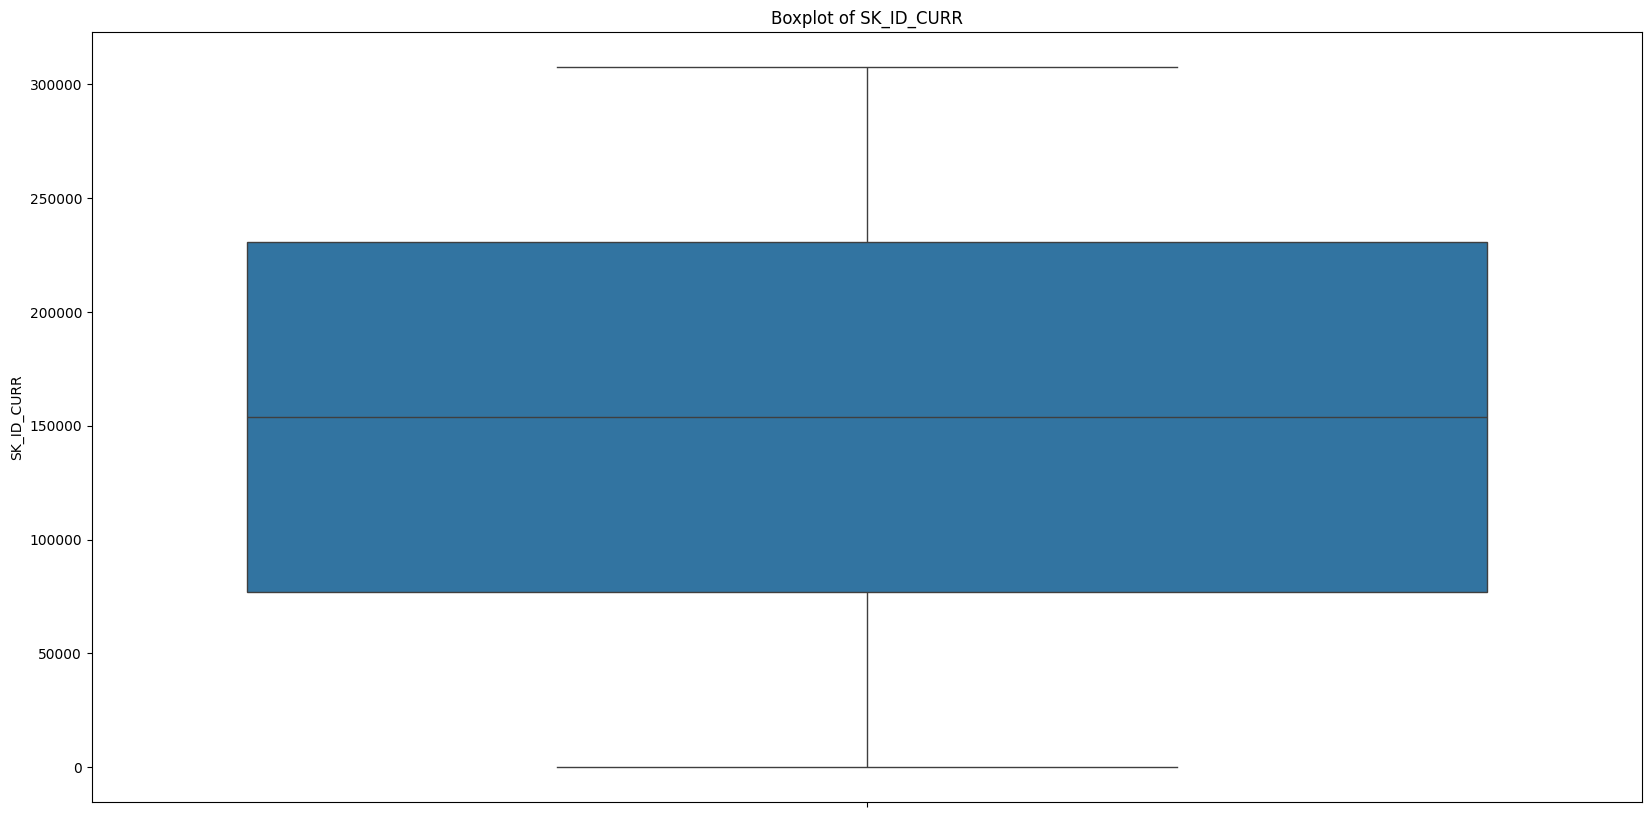

In [ ]:
# Vẽ boxplot của các biến numeric
def plot_boxplot(df):
    for col in df.select_dtypes(include=['int64','float64']).columns:
        plt.figure(figsize=(20,10))
        sns.boxplot(df[col], orient = 'v')
        plt.title('Boxplot of {}'.format(col))
        plt.show()
plot_boxplot(df1)

## Add application_train => TARGET

In [ ]:
app_df = pd.read_csv('/content/drive/MyDrive/Kì I 24 25/Finale Data Preparation/Data/application_train.csv').drop('Unnamed: 0', axis = 1)
app_df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_CURR
0,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,278621
1,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,139008
2,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,138348
3,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,...,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,64140
4,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,219374


In [ ]:
df1.head()

,SK_ID_PREV,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,SK_ID_CURR
0,2030495,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,...,12.0,middle,POS mobile with interest,NaN,-42.0,300.0,-42.0,-37.0,0.0,293189
1,1696966,Consumer loans,68258.655,1800000.0,1754721.0,180000.0,1800000.0,SATURDAY,18,Y,...,36.0,low_normal,POS industry with interest,NaN,NaN,NaN,NaN,NaN,NaN,293189
2,2154916,Consumer loans,12417.390,108400.5,119848.5,0.0,108400.5,SUNDAY,14,Y,...,12.0,middle,POS industry with interest,NaN,-512.0,-182.0,-392.0,-387.0,0.0,293189
3,2802425,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,...,36.0,low_action,Cash X-Sell: low,NaN,-134.0,916.0,NaN,NaN,1.0,91587
4,1536272,Cash loans,21709.125,450000.0,512370.0,NaN,450000.0,WEDNESDAY,9,Y,...,36.0,low_normal,Cash X-Sell: low,NaN,-485.0,565.0,-155.0,-147.0,1.0,91587


In [ ]:
df_drop = df1.drop(['SK_ID_PREV'], axis = 1)
df_drop.head()

,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,...,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,SK_ID_CURR
0,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,...,12.0,middle,POS mobile with interest,NaN,-42.0,300.0,-42.0,-37.0,0.0,293189
1,Consumer loans,68258.655,1800000.0,1754721.0,180000.0,1800000.0,SATURDAY,18,Y,1,...,36.0,low_normal,POS industry with interest,NaN,NaN,NaN,NaN,NaN,NaN,293189
2,Consumer loans,12417.390,108400.5,119848.5,0.0,108400.5,SUNDAY,14,Y,1,...,12.0,middle,POS industry with interest,NaN,-512.0,-182.0,-392.0,-387.0,0.0,293189
3,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,...,36.0,low_action,Cash X-Sell: low,NaN,-134.0,916.0,NaN,NaN,1.0,91587
4,Cash loans,21709.125,450000.0,512370.0,NaN,450000.0,WEDNESDAY,9,Y,1,...,36.0,low_normal,Cash X-Sell: low,NaN,-485.0,565.0,-155.0,-147.0,1.0,91587


In [ ]:
df_merge = df1.merge(app_df[['SK_ID_CURR', 'TARGET']], on = 'SK_ID_CURR', how = 'left')
df_merge

,SK_ID_PREV,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,SK_ID_CURR,TARGET
0,2030495,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,...,middle,POS mobile with interest,NaN,-42.0,300.0,-42.0,-37.0,0.0,293189,NaN
1,1696966,Consumer loans,68258.655,1800000.0,1754721.0,180000.0,1800000.0,SATURDAY,18,Y,...,low_normal,POS industry with interest,NaN,NaN,NaN,NaN,NaN,NaN,293189,NaN
2,2154916,Consumer loans,12417.390,108400.5,119848.5,0.0,108400.5,SUNDAY,14,Y,...,middle,POS industry with interest,NaN,-512.0,-182.0,-392.0,-387.0,0.0,293189,NaN
3,2802425,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,...,low_action,Cash X-Sell: low,NaN,-134.0,916.0,NaN,NaN,1.0,91587,0.0
4,1536272,Cash loans,21709.125,450000.0,512370.0,NaN,450000.0,WEDNESDAY,9,Y,...,low_normal,Cash X-Sell: low,NaN,-485.0,565.0,-155.0,-147.0,1.0,91587,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413696,1261221,Consumer loans,6030.675,133866.0,133866.0,0.0,133866.0,SATURDAY,15,Y,...,low_action,POS household without interest,NaN,-801.0,-111.0,-531.0,-518.0,0.0,302680,0.0
1413697,1563733,Consumer loans,13726.080,137250.0,123525.0,13725.0,137250.0,SATURDAY,14,Y,...,low_normal,POS household with interest,NaN,-464.0,-194.0,-194.0,-186.0,0.0,192560,0.0
1413698,2319569,Consumer loans,4716.495,46800.0,46800.0,0.0,46800.0,FRIDAY,9,Y,...,middle,POS industry with interest,NaN,-119.0,211.0,NaN,NaN,0.0,91682,0.0
1413699,2829648,Consumer loans,10301.940,101745.0,112491.0,0.0,101745.0,FRIDAY,12,Y,...,low_action,POS household without interest,NaN,-529.0,-199.0,-199.0,-194.0,0.0,126653,0.0


In [ ]:
df_merge.describe()

,SK_ID_PREV,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,SK_ID_CURR,TARGET
count,1.413701e+06,1.106483e+06,1.413701e+06,1.413700e+06,6.641610e+05,1.094176e+06,1.413701e+06,1.413701e+06,664161.000000,1.413701e+06,1.413701e+06,1.106488e+06,53501.000000,818633.000000,773496.000000,671803.000000,658595.000000,852595.000000,1.413701e+06,1.130891e+06
mean,1.922744e+06,1.583718e+04,1.752436e+05,1.963541e+05,6.655317e+03,2.264512e+05,1.247893e+01,9.964321e-01,0.080175,-8.803670e+02,3.149878e+02,1.605194e+01,-1052.747033,-1104.217824,-672.790594,-994.749342,-976.684606,0.330572,1.537647e+05,8.632397e-02
std,5.327153e+05,1.472491e+04,2.936222e+05,3.194813e+05,2.062030e+04,3.159376e+05,3.331474e+00,5.962560e-02,0.107784,7.835402e+02,7.695082e+03,1.456675e+01,934.925558,791.788811,926.895067,753.013859,749.319423,0.470419,8.867392e+04,2.808420e-01
min,1.000001e+06,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000,0.000000e+00,0.000000e+00
25%,1.461346e+06,6.257858e+03,1.975050e+04,2.488050e+04,0.000000e+00,4.982850e+04,1.000000e+01,1.000000e+00,0.000000,-1.313000e+03,-1.000000e+00,6.000000e+00,-2076.000000,-1677.000000,-1360.000000,-1568.000000,-1541.000000,0.000000,7.692000e+04,0.000000e+00
50%,1.922698e+06,1.122376e+04,7.087050e+04,8.059500e+04,1.791000e+03,1.102455e+05,1.200000e+01,1.000000e+00,0.062489,-5.820000e+02,4.000000e+00,1.200000e+01,-630.000000,-868.000000,-477.000000,-801.000000,-780.000000,0.000000,1.536860e+05,0.000000e+00
75%,2.384012e+06,2.042078e+04,1.800000e+05,2.156400e+05,7.695000e+03,2.295000e+05,1.500000e+01,1.000000e+00,0.108912,-2.710000e+02,8.500000e+01,2.400000e+01,-296.000000,-454.000000,3.000000,-349.000000,-333.000000,1.000000,2.305300e+05,0.000000e+00
max,2.845381e+06,4.180581e+05,5.850000e+06,4.509688e+06,3.060045e+06,5.850000e+06,2.300000e+01,1.000000e+00,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,-2.000000,-2.000000,2389.000000,-2.000000,-2.000000,1.000000,3.075100e+05,1.000000e+00


In [ ]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Data columns (total 36 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1413701 non-null  int64  
 1   NAME_CONTRACT_TYPE           1413388 non-null  object 
 2   AMT_ANNUITY                  1106483 non-null  float64
 3   AMT_APPLICATION              1413701 non-null  float64
 4   AMT_CREDIT                   1413700 non-null  float64
 5   AMT_DOWN_PAYMENT             664161 non-null   float64
 6   AMT_GOODS_PRICE              1094176 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1413701 non-null  object 
 8   HOUR_APPR_PROCESS_START      1413701 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1413701 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1413701 non-null  int64  
 11  RATE_DOWN_PAYMENT            664161 non-null   float64
 12  NAME_CASH_LOAN_PURPOSE       59413 non-nul

In [ ]:
# drop tất cả các dòng có TARGET = NaN
df_merge.dropna(subset = ['TARGET'], inplace = True)
df_merge

,SK_ID_PREV,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,SK_ID_CURR,TARGET
3,2802425,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,...,low_action,Cash X-Sell: low,NaN,-134.0,916.0,NaN,NaN,1.0,91587,0.0
4,1536272,Cash loans,21709.125,450000.0,512370.0,NaN,450000.0,WEDNESDAY,9,Y,...,low_normal,Cash X-Sell: low,NaN,-485.0,565.0,-155.0,-147.0,1.0,91587,0.0
5,2068863,Consumer loans,4830.930,47250.0,23688.0,24750.0,47250.0,THURSDAY,11,Y,...,high,POS household with interest,NaN,-588.0,-438.0,-588.0,-580.0,0.0,91587,0.0
6,2551979,Consumer loans,6664.275,71352.0,71352.0,0.0,71352.0,WEDNESDAY,9,Y,...,low_normal,POS industry with interest,NaN,-1176.0,-846.0,-846.0,-840.0,0.0,91587,0.0
7,2517198,Revolving loans,11250.000,0.0,225000.0,NaN,NaN,TUESDAY,13,Y,...,NaN,Card X-Sell,-713.0,-673.0,NaN,-461.0,-61.0,0.0,91587,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413696,1261221,Consumer loans,6030.675,133866.0,133866.0,0.0,133866.0,SATURDAY,15,Y,...,low_action,POS household without interest,NaN,-801.0,-111.0,-531.0,-518.0,0.0,302680,0.0
1413697,1563733,Consumer loans,13726.080,137250.0,123525.0,13725.0,137250.0,SATURDAY,14,Y,...,low_normal,POS household with interest,NaN,-464.0,-194.0,-194.0,-186.0,0.0,192560,0.0
1413698,2319569,Consumer loans,4716.495,46800.0,46800.0,0.0,46800.0,FRIDAY,9,Y,...,middle,POS industry with interest,NaN,-119.0,211.0,NaN,NaN,0.0,91682,0.0
1413699,2829648,Consumer loans,10301.940,101745.0,112491.0,0.0,101745.0,FRIDAY,12,Y,...,low_action,POS household without interest,NaN,-529.0,-199.0,-199.0,-194.0,0.0,126653,0.0


### Numeric vs Target

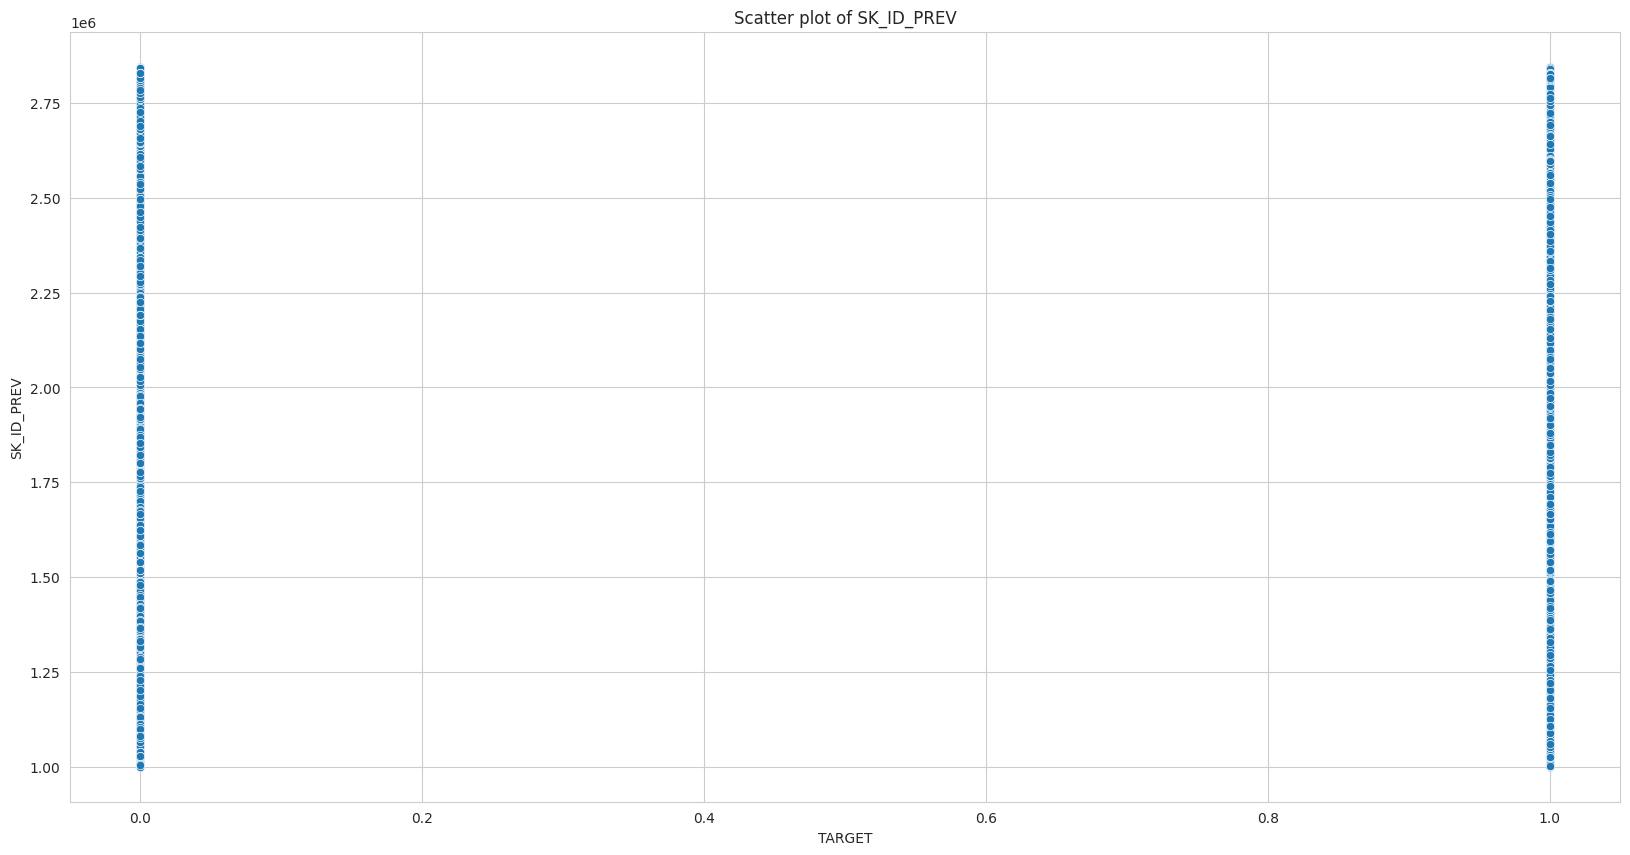

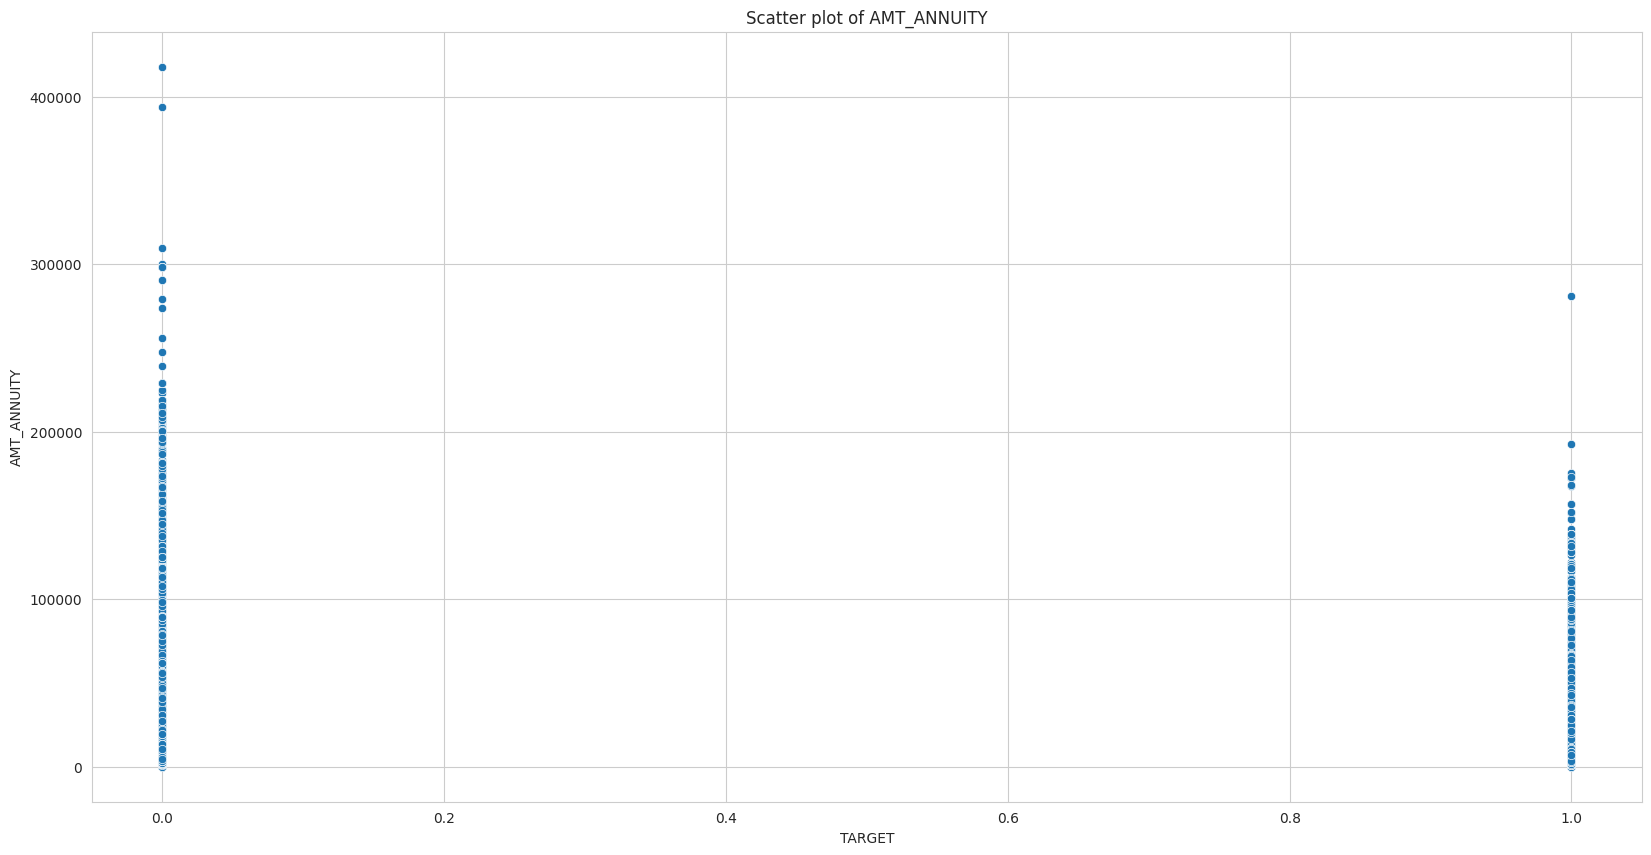

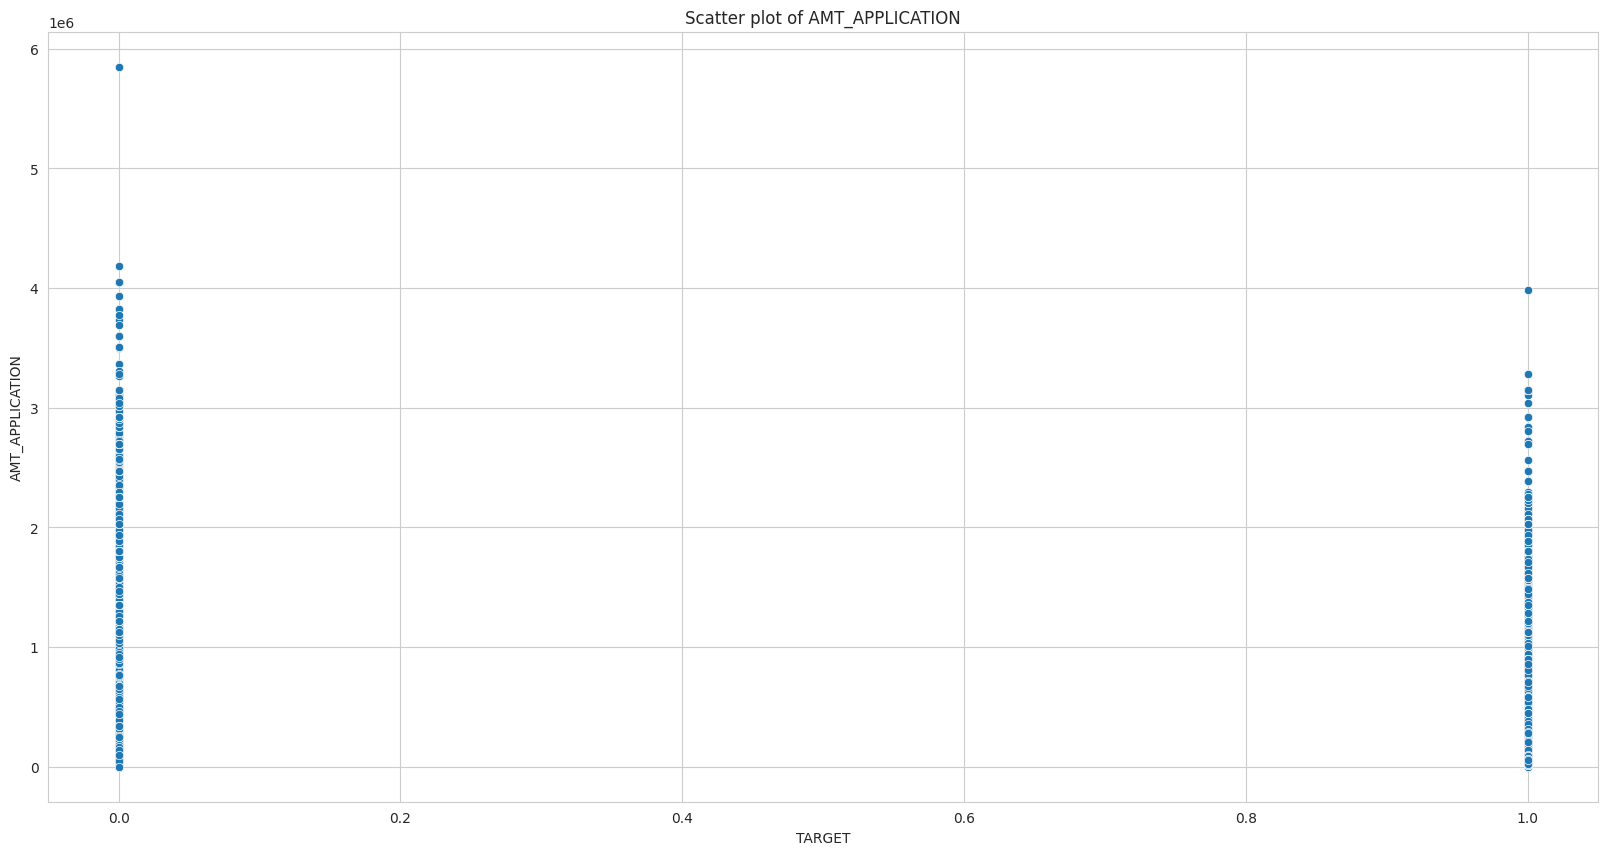

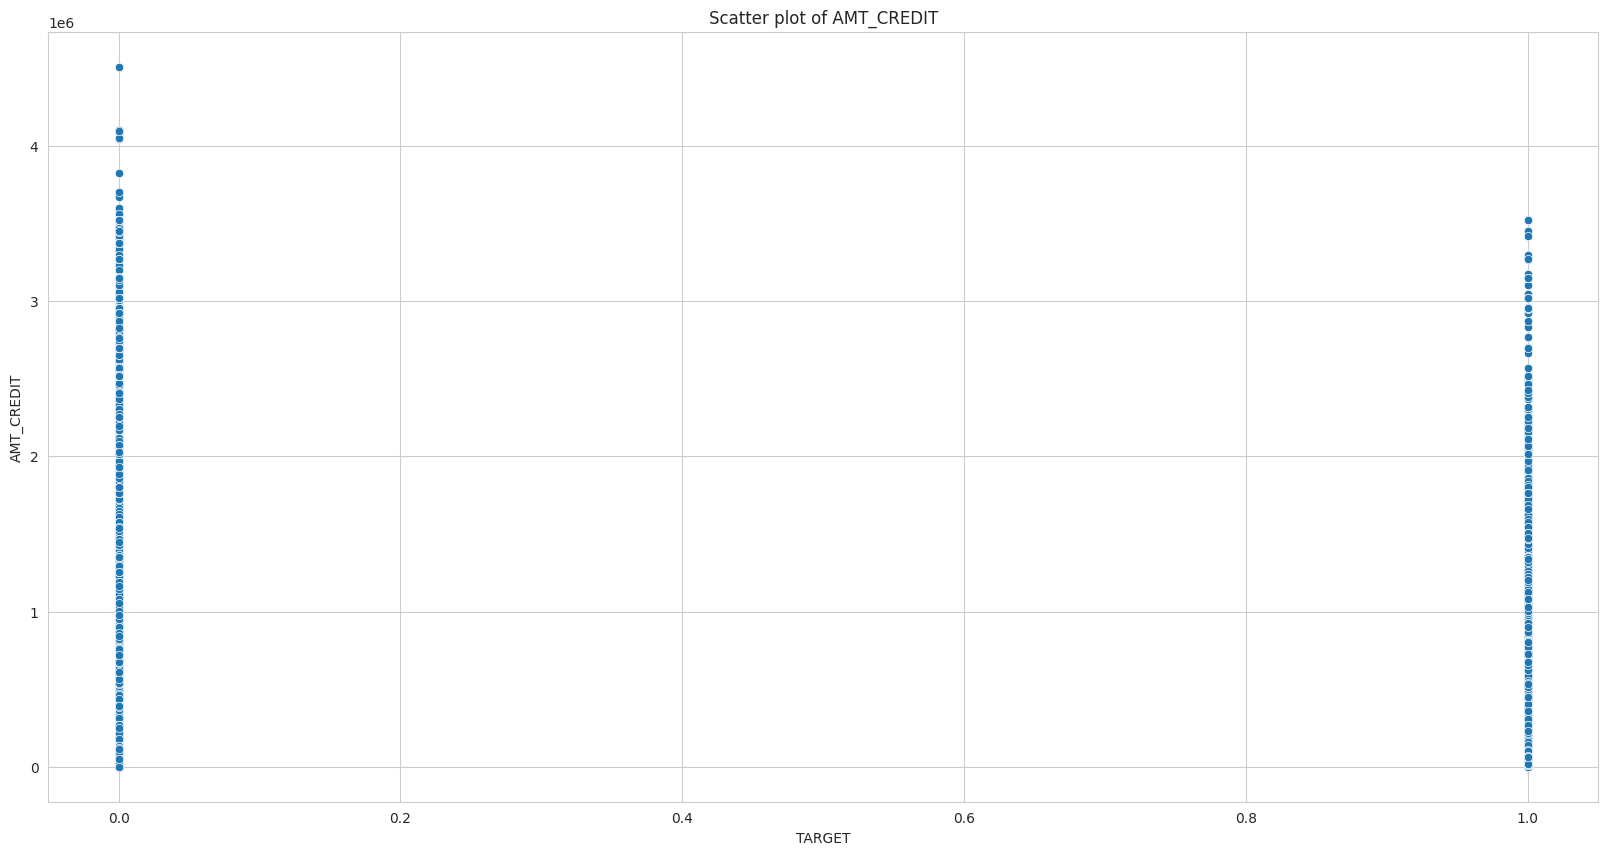

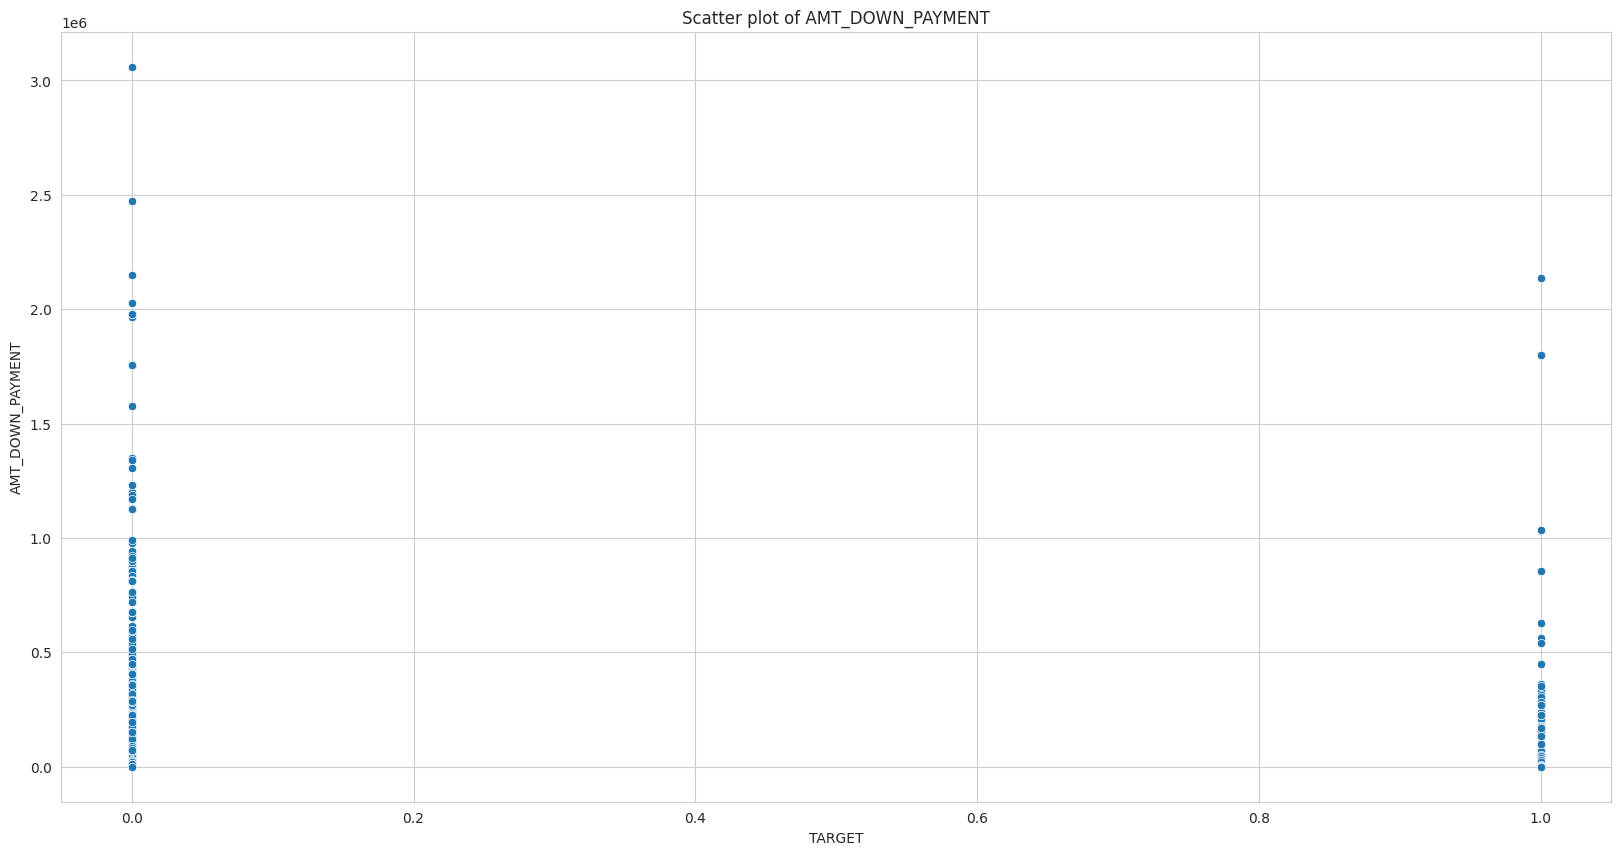

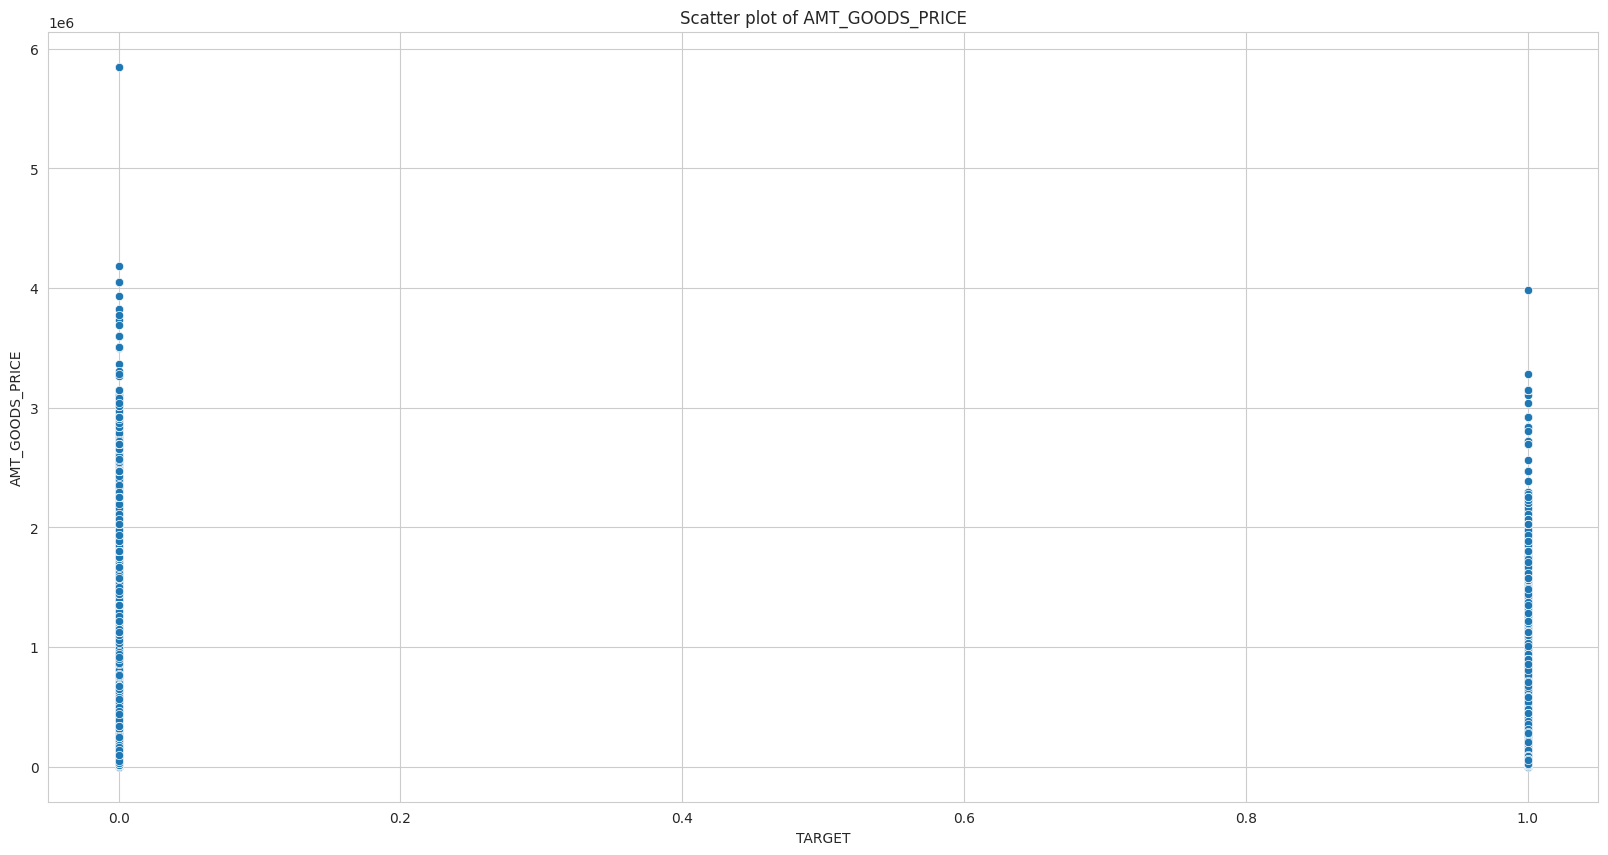

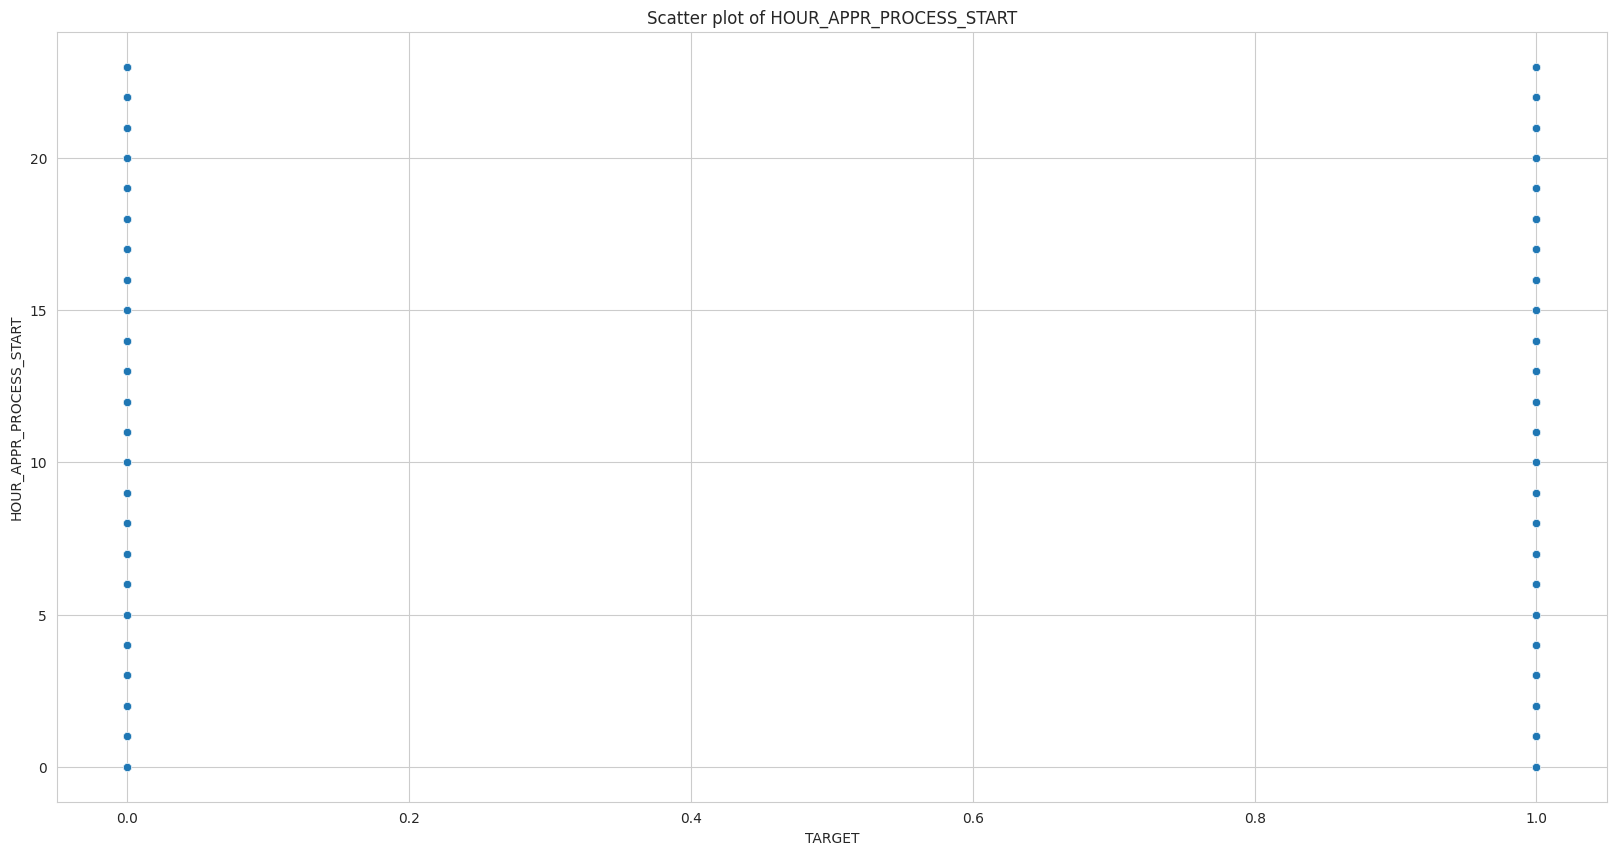

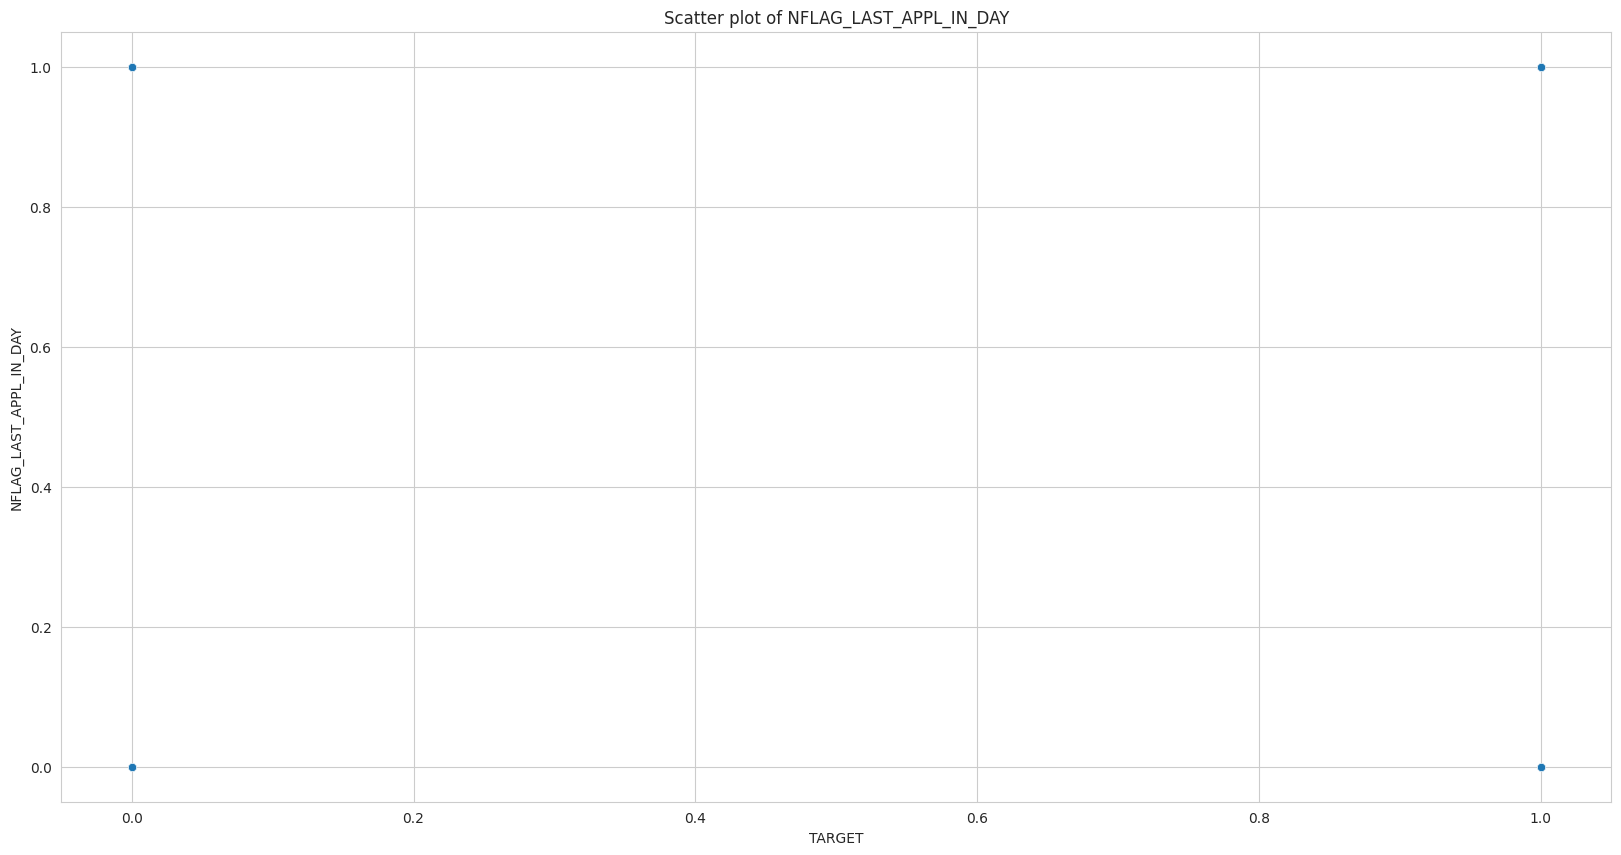

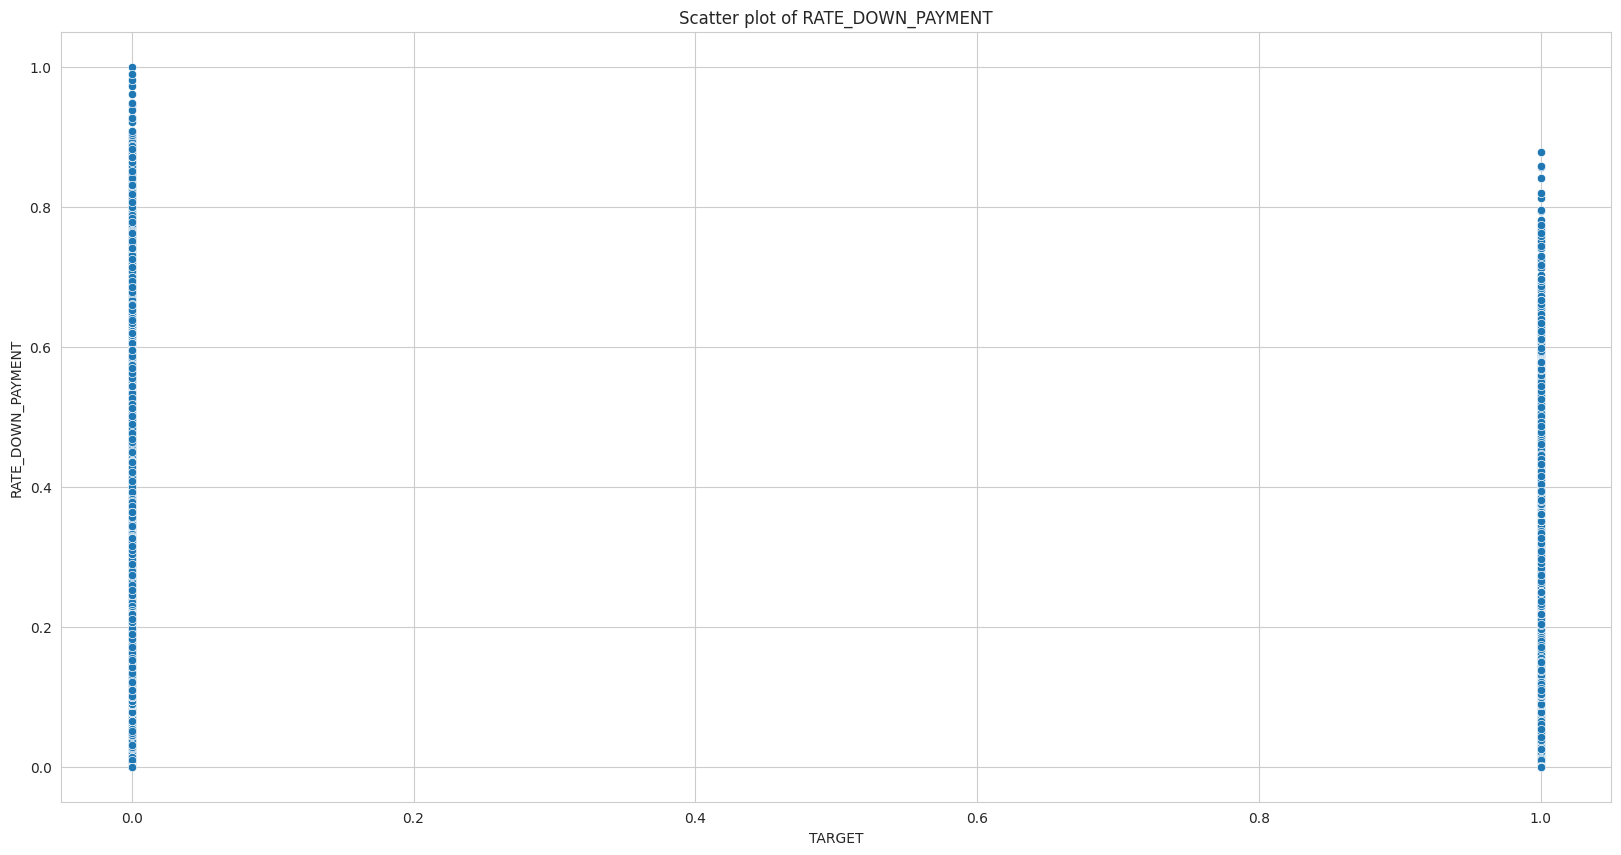

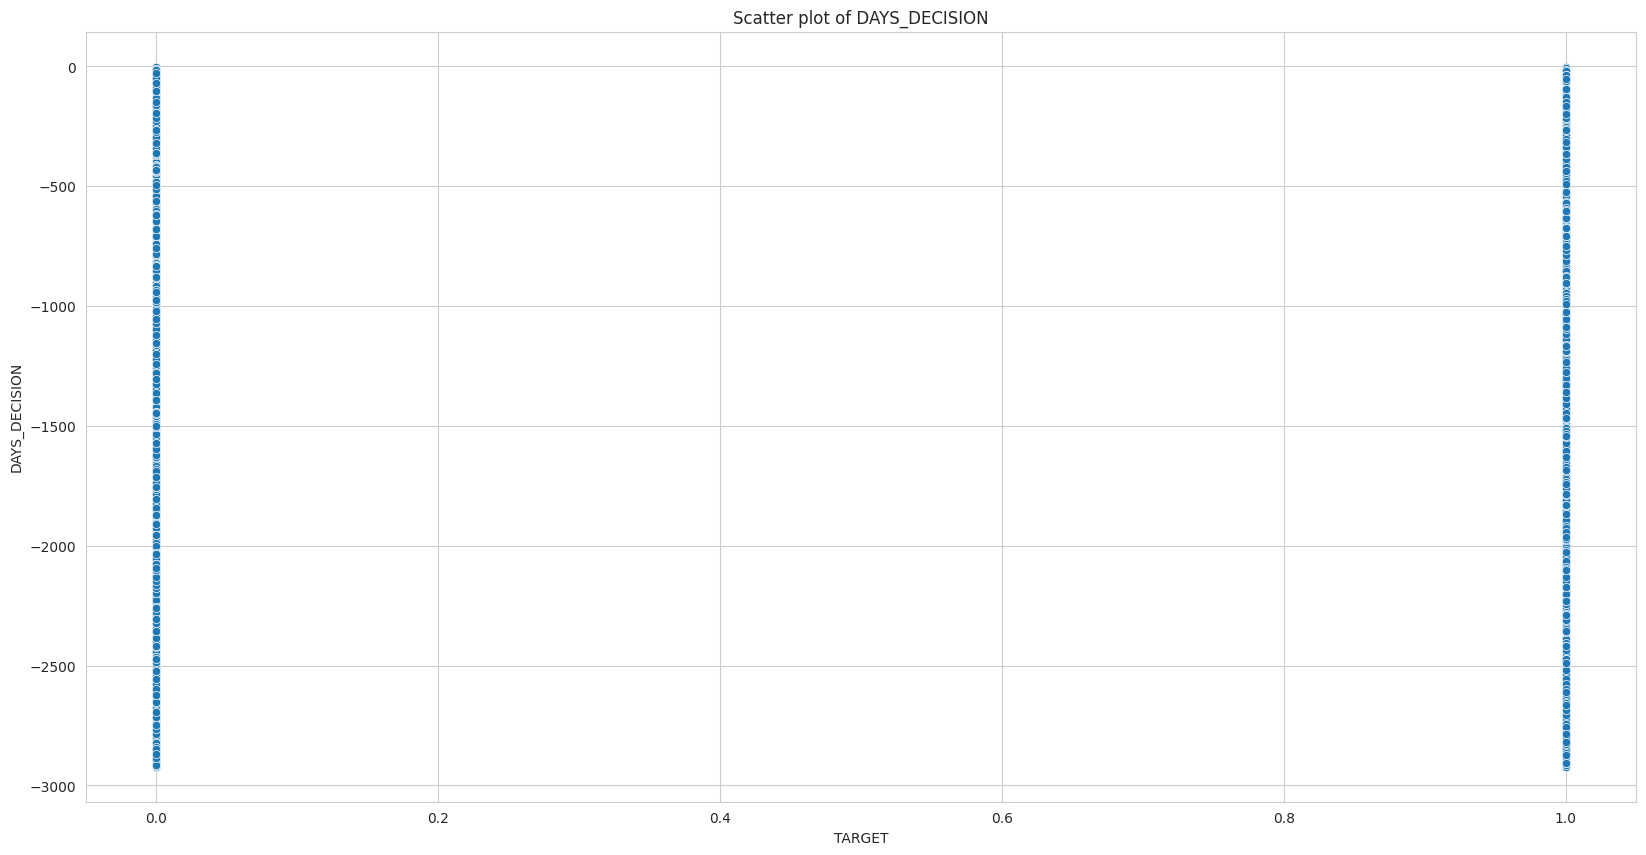

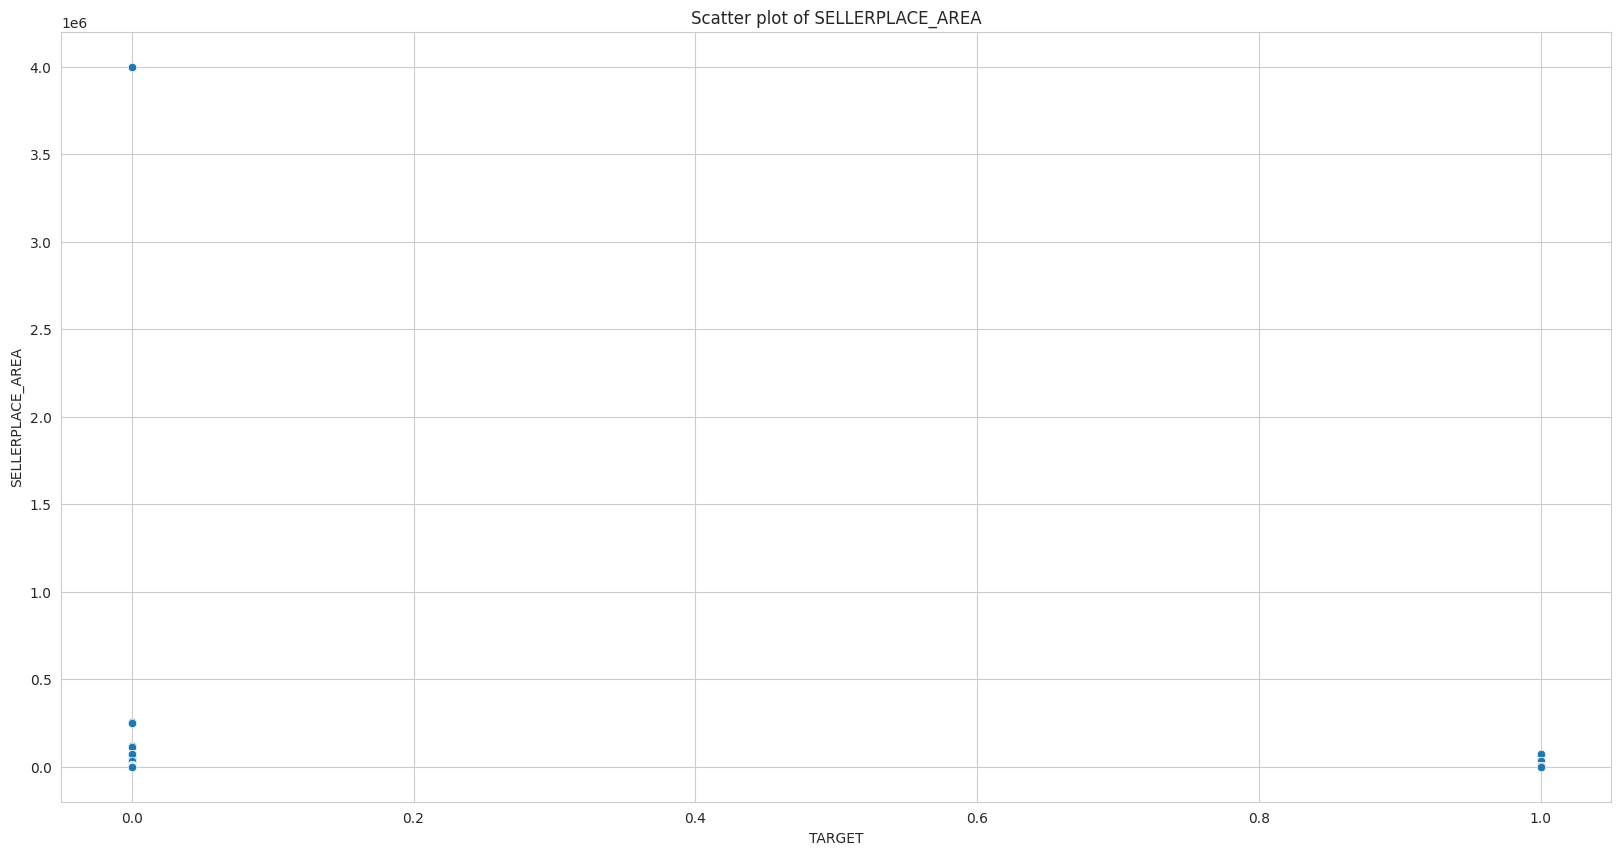

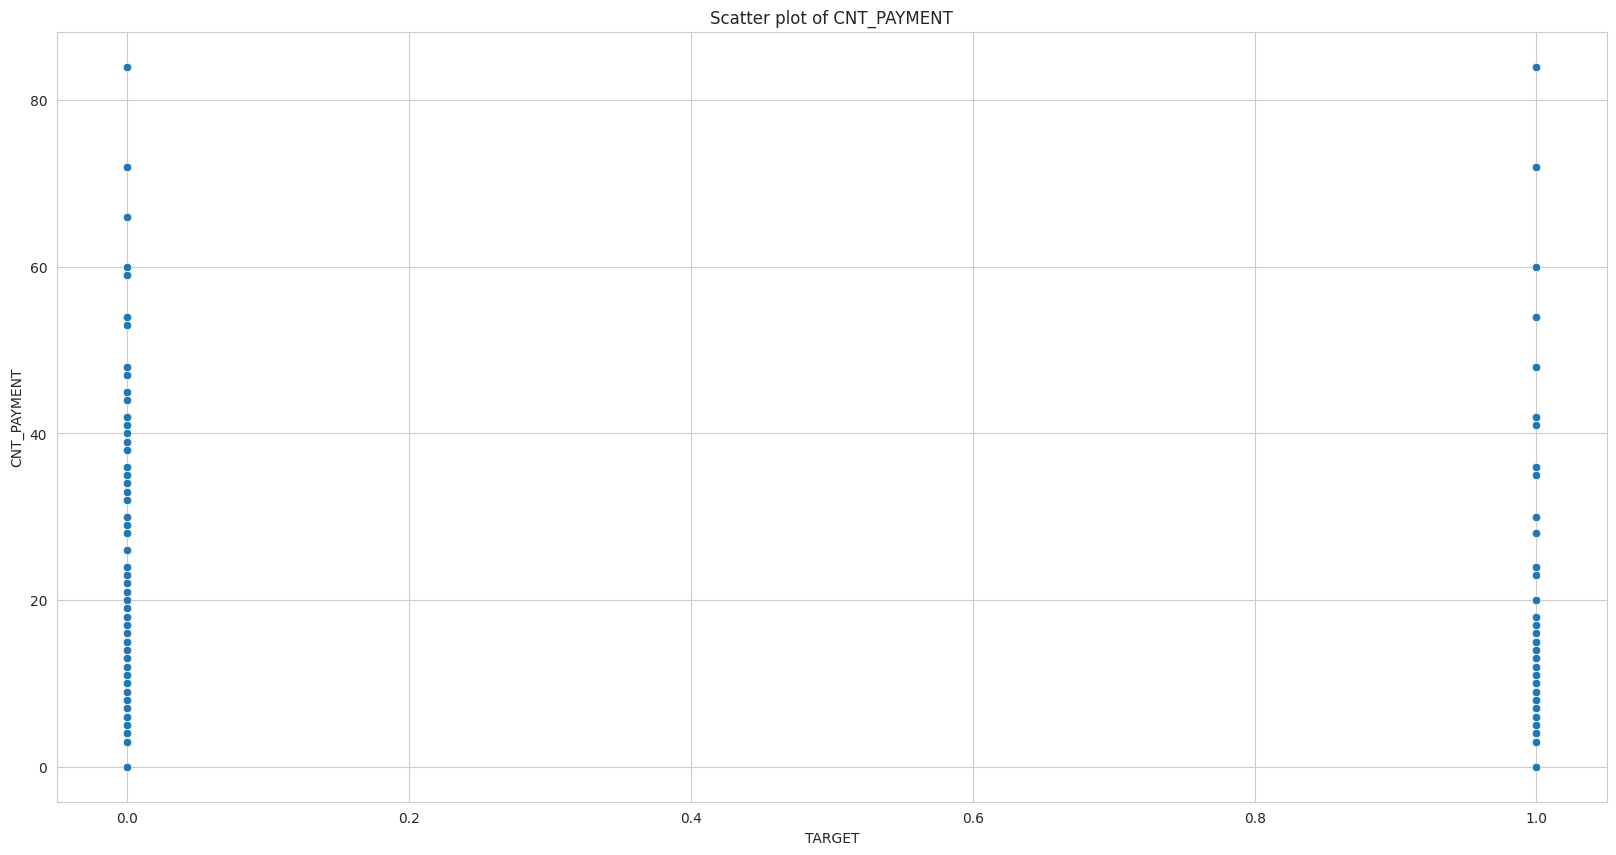

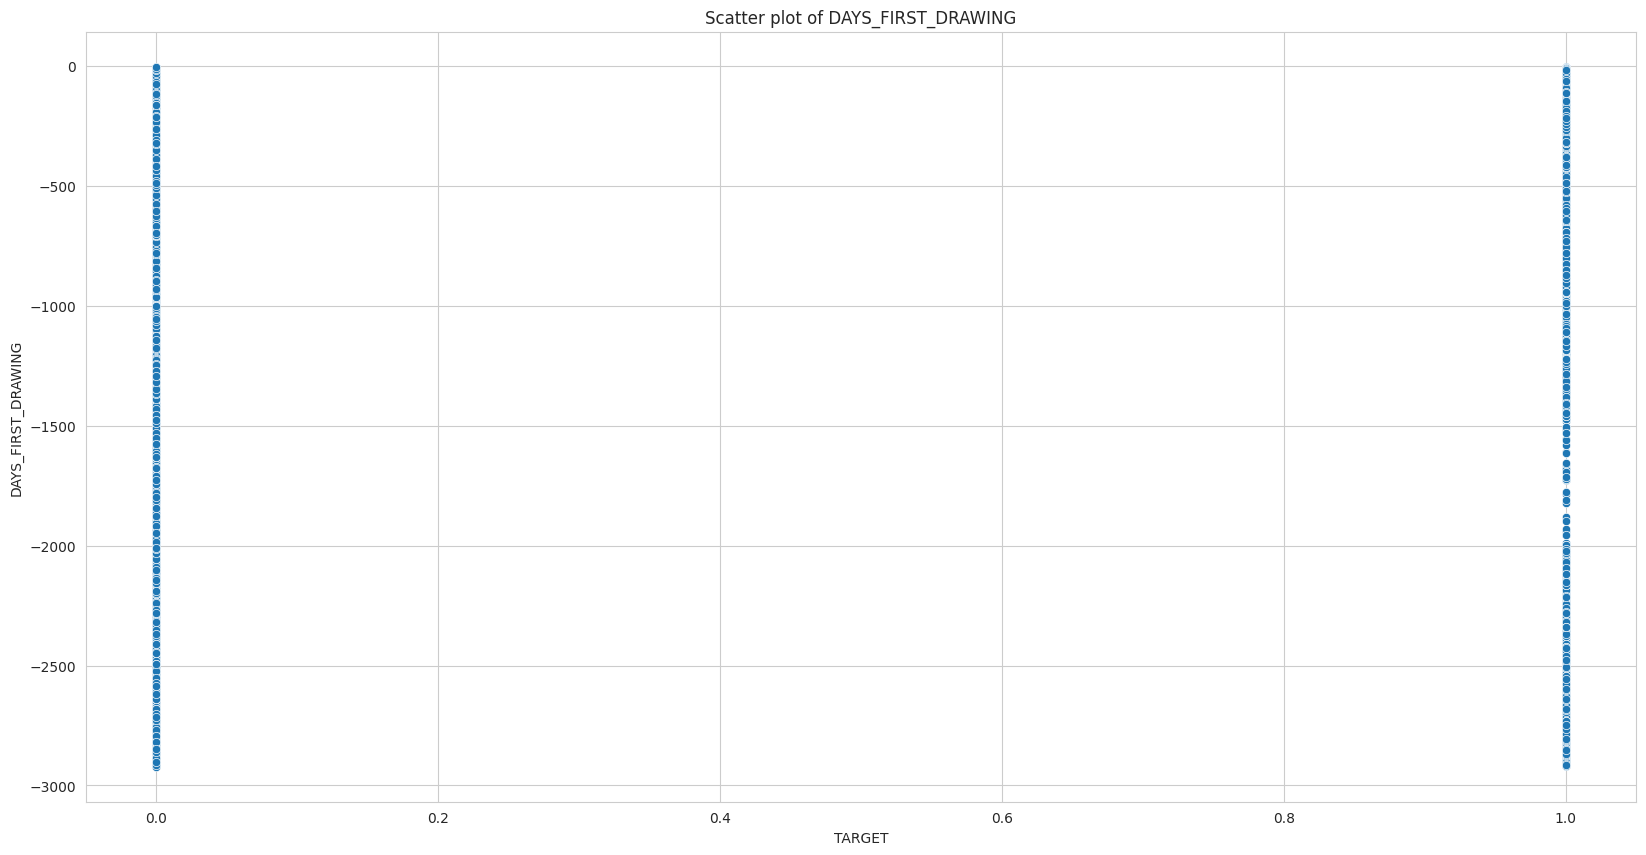

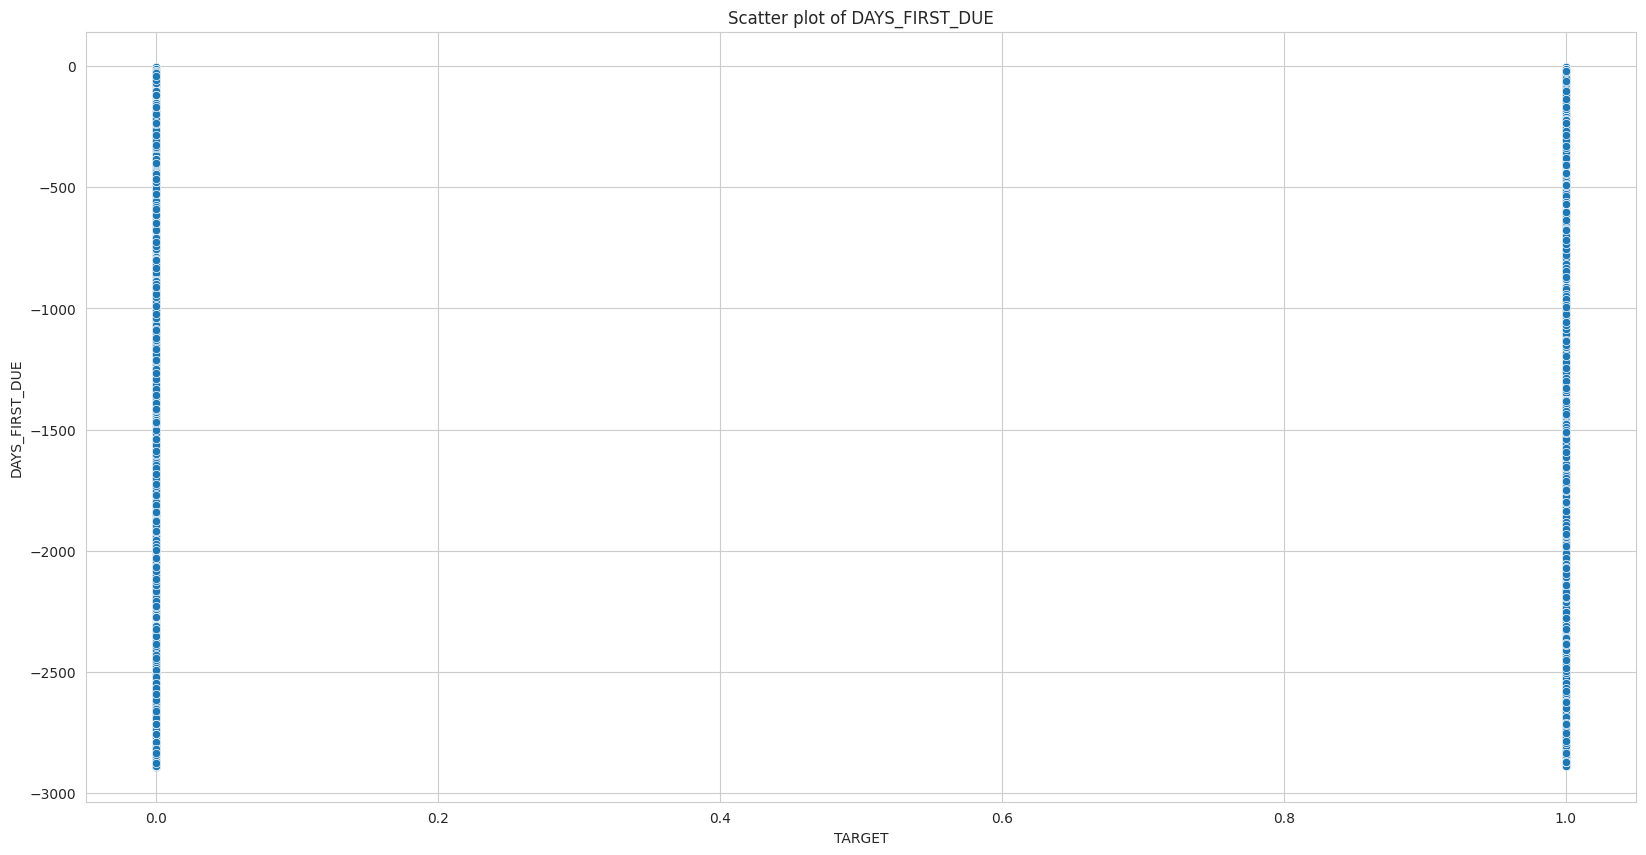

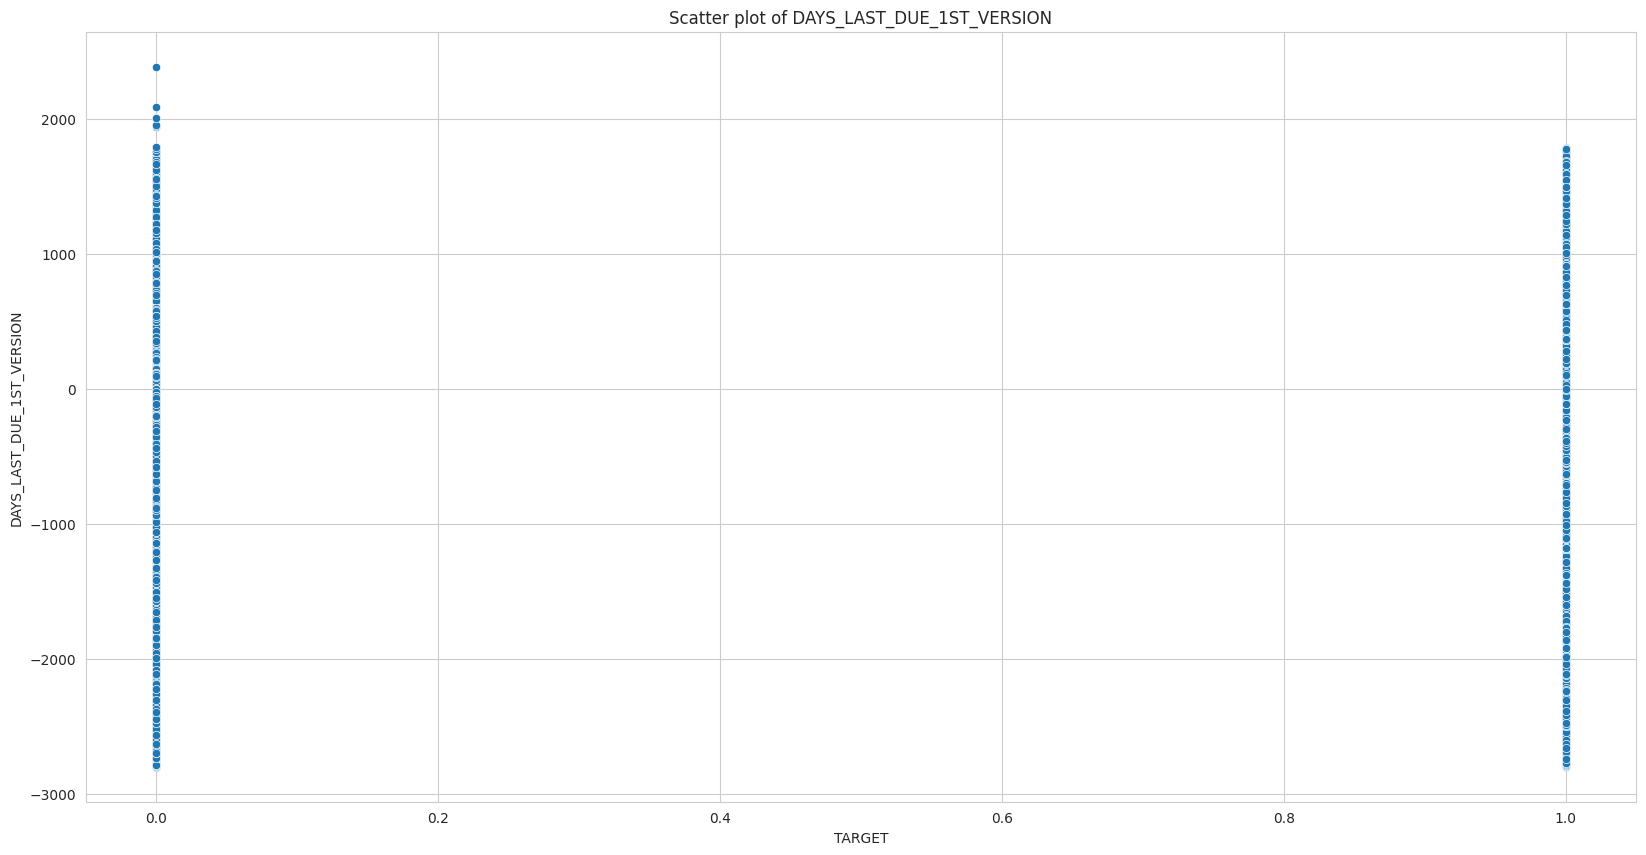

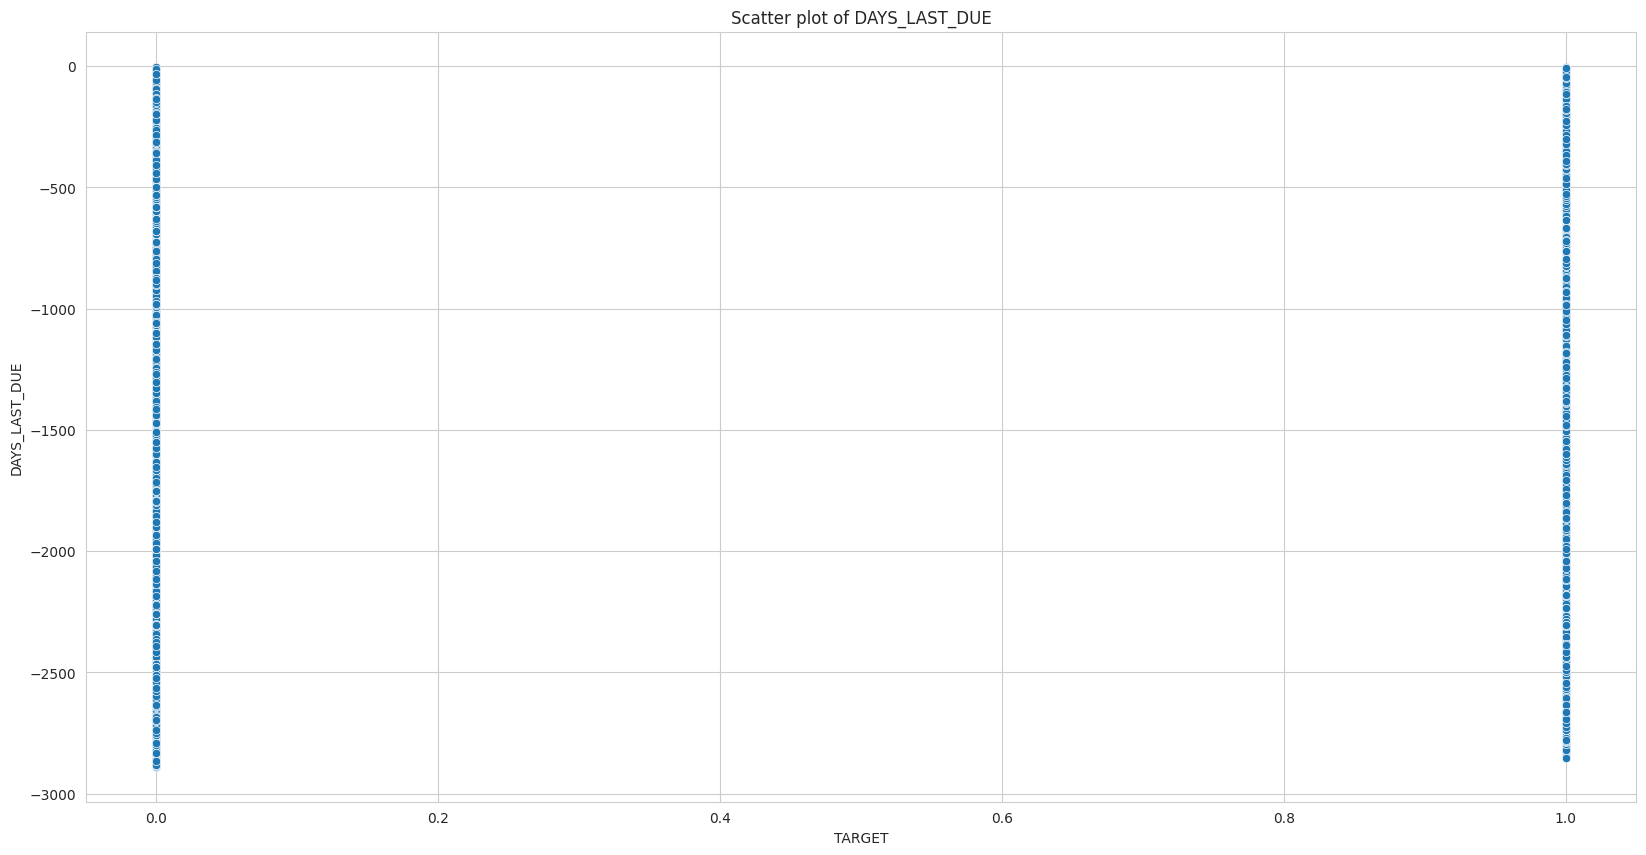

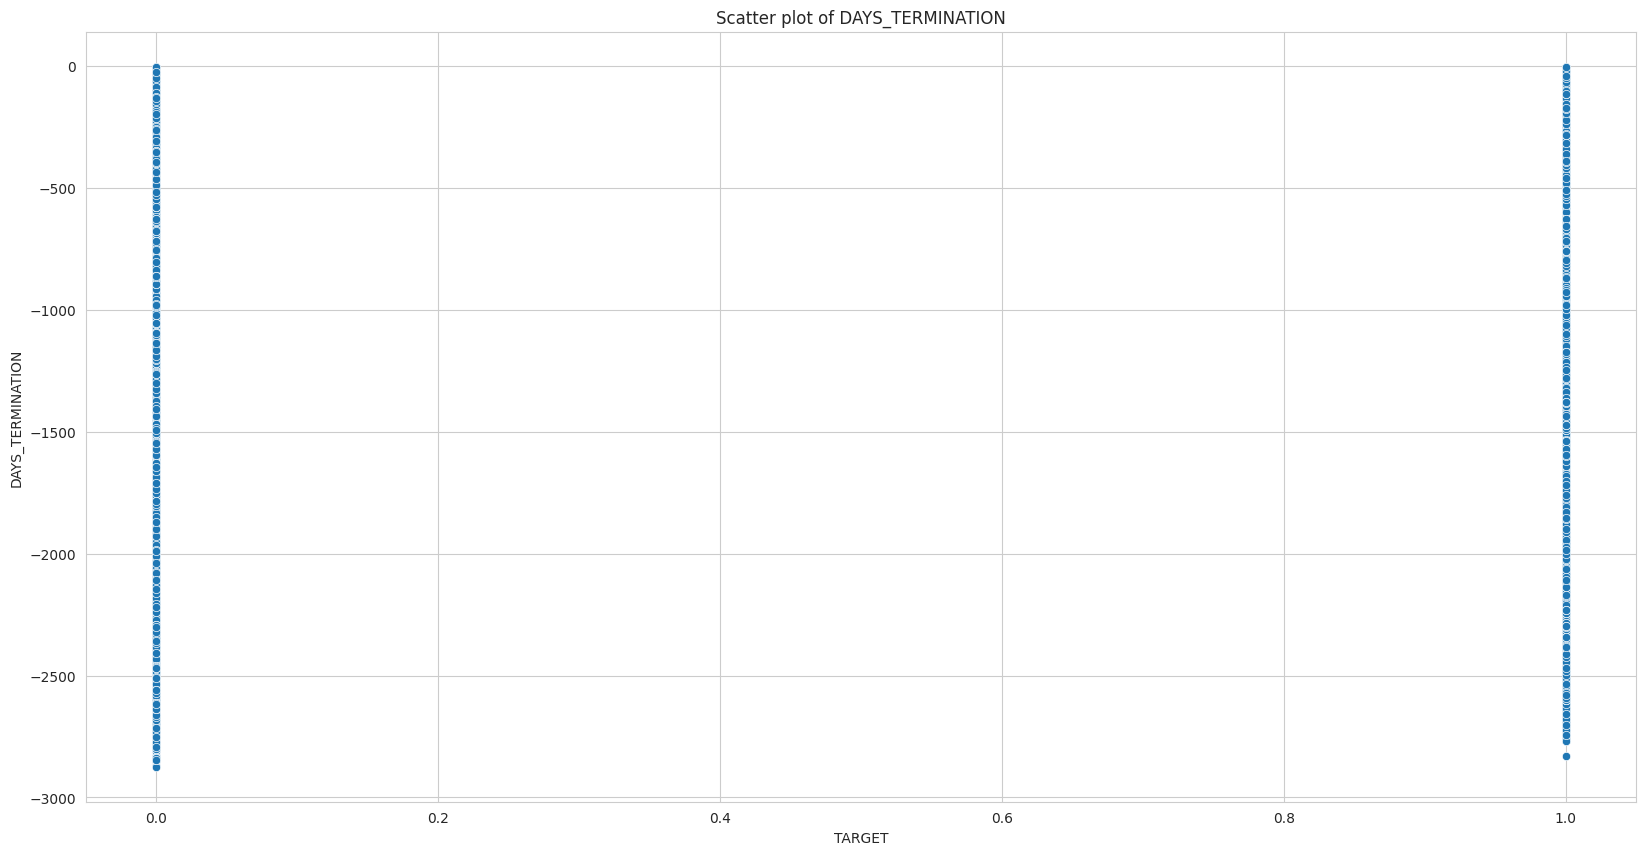

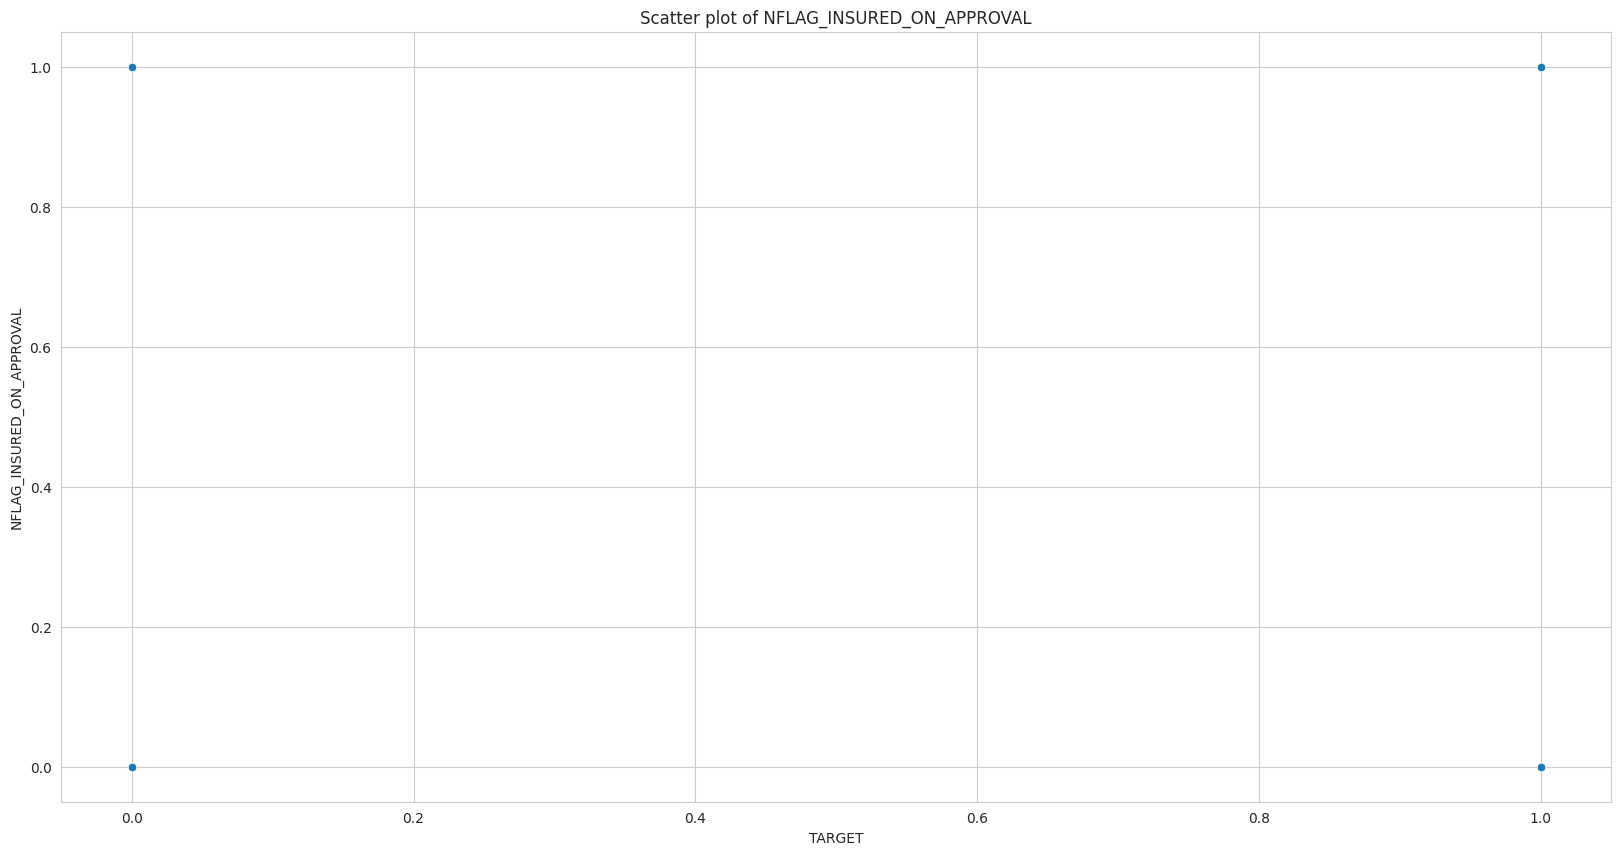

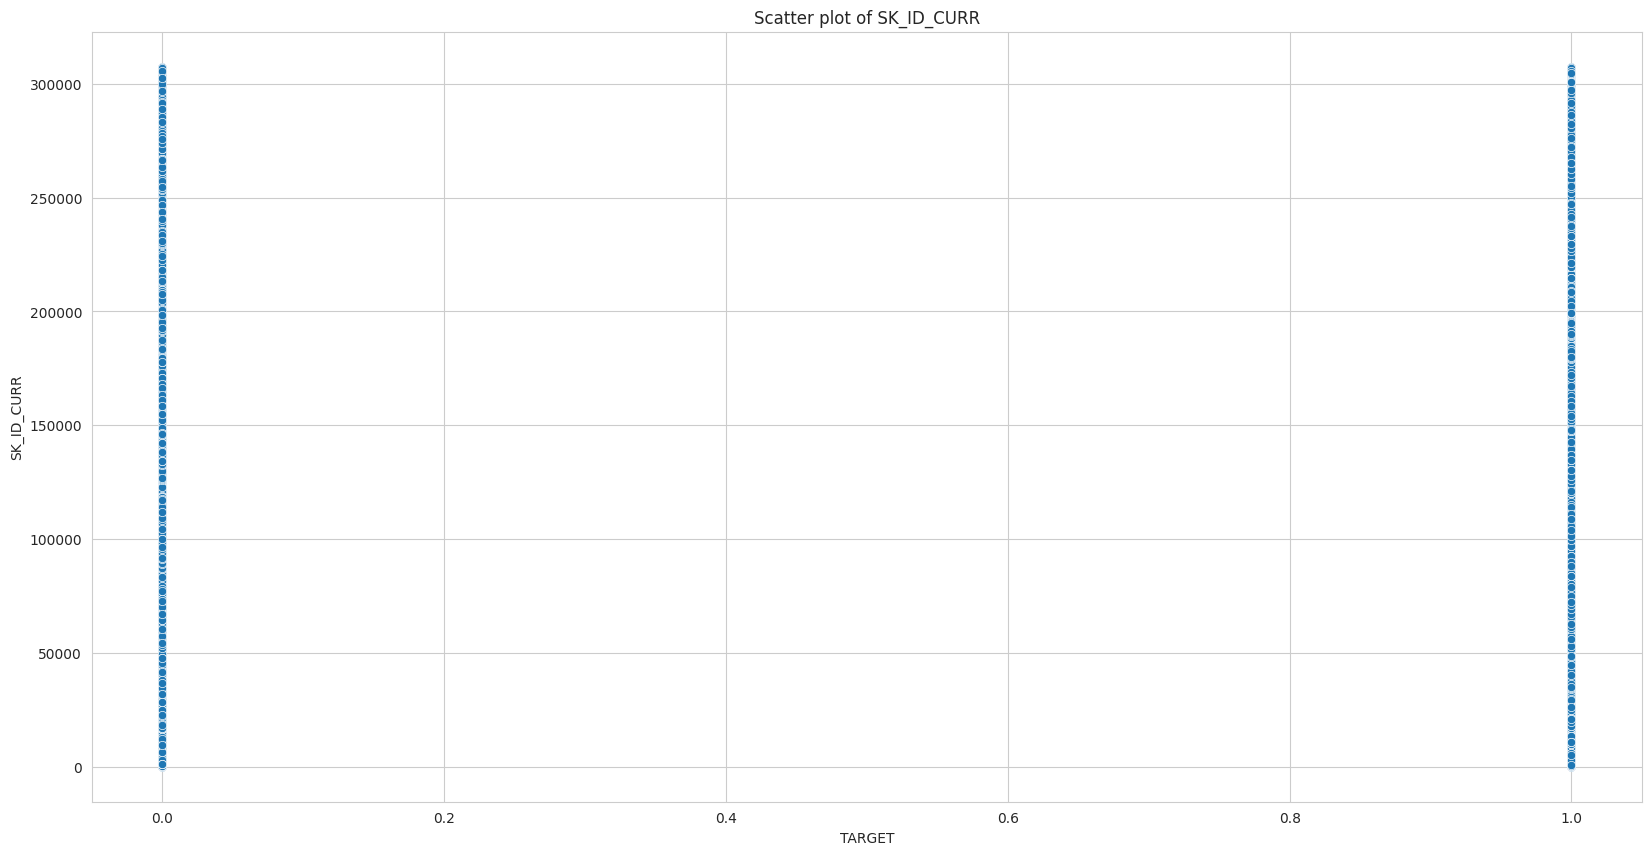

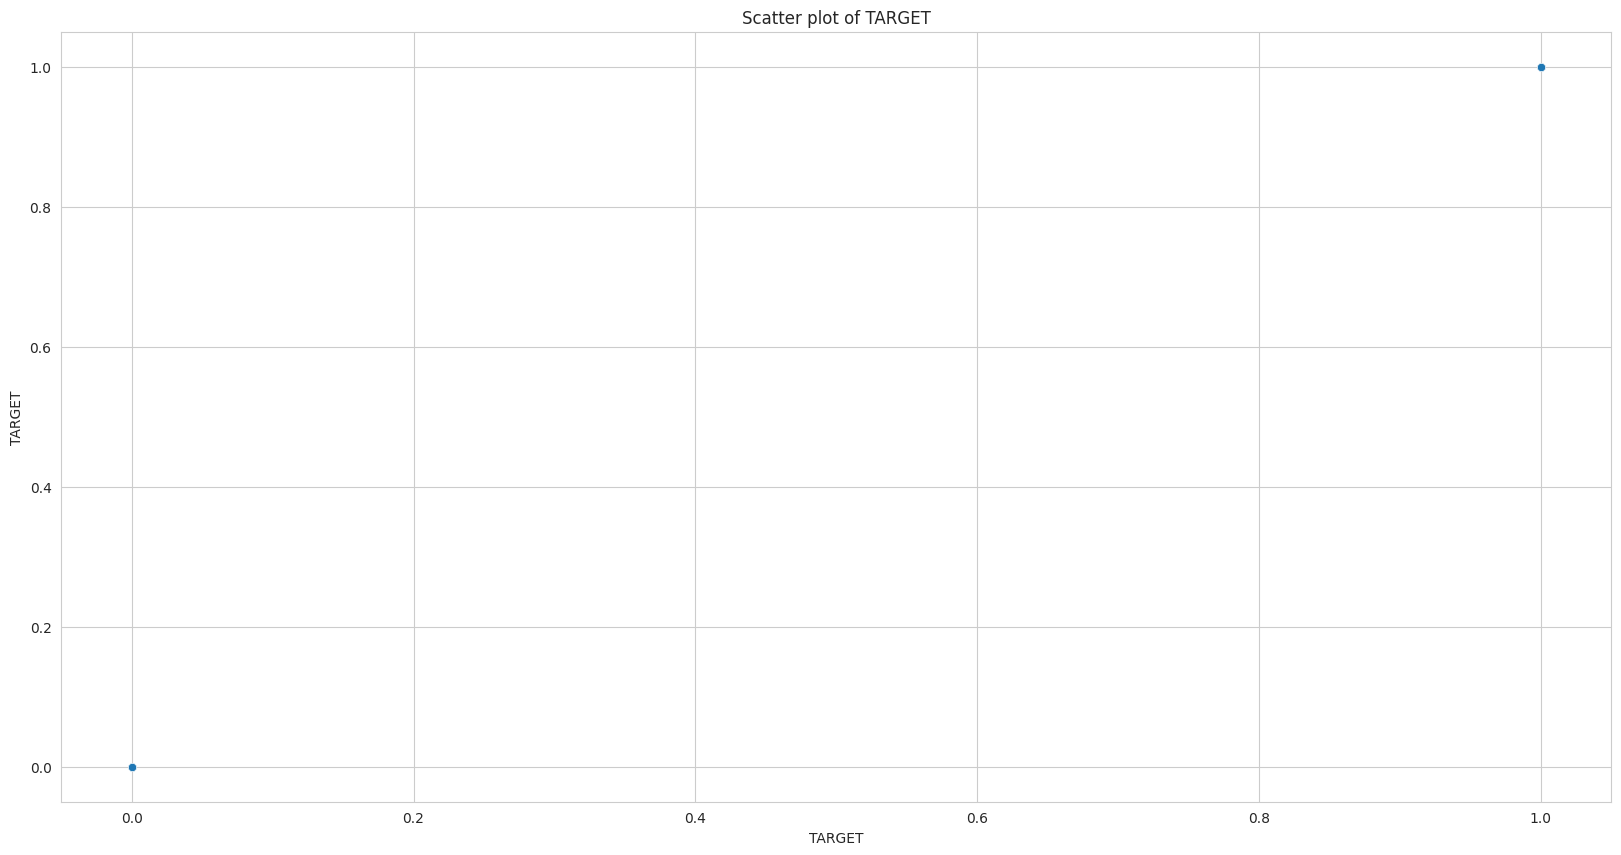

In [ ]:
# Scatter plot của các biến numeric so với biến TARGET
def plot_scatter(df):
    for col in df.select_dtypes(include=['int64','float64']).columns:
        sns.set_style('whitegrid')
        plt.figure(figsize=(20,10))
        sns.scatterplot(y = df[col], x = df['TARGET'])
        plt.title('Scatter plot of {}'.format(col))
        plt.show()
plot_scatter(df_merge)


1. AMT_ANNUITY: càng cao thì số người vỡ nợ càng giảm
2. AMT_DOWN_PAYMENT: càng cao thì số người vỡ nợ càng giảm
3. HOUR_APPR_PROCESS_START, DAY_DECISION, SELLERPLACE_AREA, DAYS_LAST_DUE có phân bố tương đối giống nhau, không có tính quyết định, cân nhắc bỏ
4. DAY_FIRST_DRAWING, DAY_FIRST_DUE: tỉ lệ null của 2 features này rất cao (>95%), cân nhắc bỏ
5. RATE_DOWN_PAYMENT: Những khách hàng có RATE_DOWN_PAYMENT thấp hơn khoảng 0.9 thì có khả năng vỡ nợ cao hơn

AMT_CREDIT can be higher than AMT_APPLICATION, probably due to insurance purchase (see explanation for goods price). It can also be a smaller value depending on HC judgment (risk, credit limit...)

### Categorical vs Target

In [ ]:
# plot  2 pie chart của các biến categorical ở 2 biến TARGET = 0 và TARGET = 1
def plot_pie(df):
    for col in df.select_dtypes(include=['object']).columns:
        plt.figure(figsize=(20,10))
        plt.subplot(1,2,1)
        plt.title('TARGET = 0')
        df[df['TARGET'] == 0][col].value_counts().plot.pie(autopct = '%1.1f%%')

        plt.title(col, fontsize = 10, fontweight = 'bold', color = 'blue', loc ='left')
        plt.subplot(1,2,2)
        plt.title('TARGET = 1')
        df[df['TARGET'] == 1][col].value_counts().plot.pie(autopct = '%1.1f%%')
        plt.show()
plot_pie(df_merge)

Output hidden; open in https://colab.research.google.com to view.

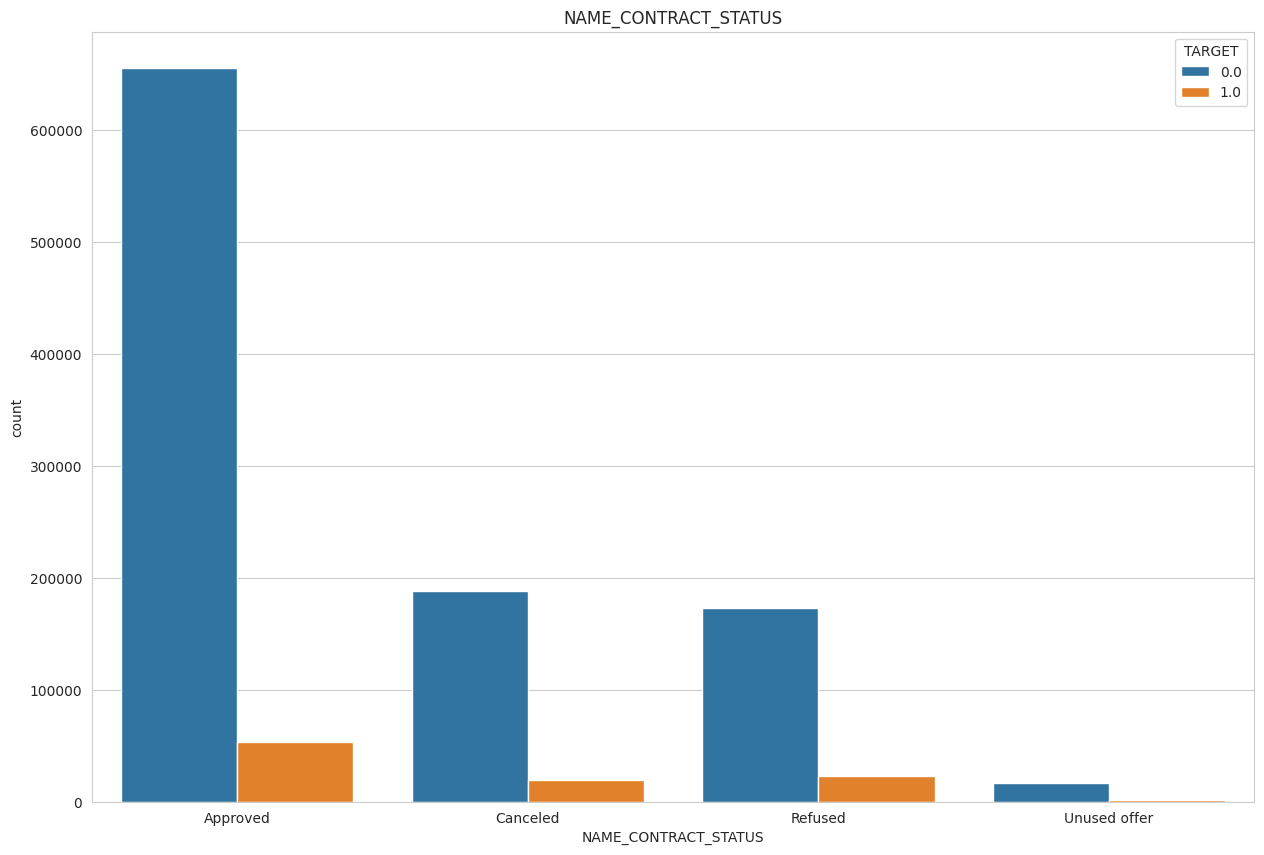

In [ ]:
# 'NAME_CONTRACT_STATUS' it null value
plt.figure(figsize=(15,10))
sns.countplot(x = df_merge['NAME_CONTRACT_STATUS'], hue = df_merge['TARGET'])
plt.title('NAME_CONTRACT_STATUS')
plt.show()

In [ ]:
# tỉ lệ khách hàng có target=1 theo từng contract status
# refused
total_refuse = df_merge[df_merge['NAME_CONTRACT_STATUS'] == 'Refused'].shape[0]
# approved
total_approved = df_merge[df_merge['NAME_CONTRACT_STATUS'] == 'Approved'].shape[0]
# ko vo no
nondefaulter_refused = df_merge[(df_merge['NAME_CONTRACT_STATUS'] == 'Refused') & (df_merge['TARGET'] == 0)].shape[0]
#vo no
defaulter_approved = df_merge[(df_merge['NAME_CONTRACT_STATUS'] == 'Approved') & (df_merge['TARGET'] == 1)].shape[0]

In [ ]:

print(f'{round(defaulter_approved *100/total_approved,2)}% khách hàng bị vỡ nợ có khoản vay trước thành công')
print(f'{round(nondefaulter_refused *100/total_refuse,2)}% khách hàng không bị vỡ nợ có khoản vay bị từ chối\n')


7.58% khách hàng bị vỡ nợ có khoản vay trước thành công
88.08% khách hàng không bị vỡ nợ có khoản vay bị từ chối



In [ ]:
# % target=1 in each categorical feature
def plot_percent(df, col):
    percent_df = []
    for category in df[col].unique():
        if df[df[col] == category].shape[0] == 0:
            pass
        else:
            percent = (df[(df[col] == category) & (df['TARGET'] == 1)].shape[0] / df[df[col] == category].shape[0]) * 100
            percent_df.append([category, percent])
    percent_df = pd.DataFrame(percent_df, columns = [col, 'Percent'])
    percent_df.sort_values(by = 'Percent', ascending = False, inplace = True)
    plt.figure(figsize=(20,10))
    sns.barplot(y = percent_df[col], x = percent_df['Percent'])
    plt.title('Percent of target = 1 in {}'.format(col))
    plt.show()


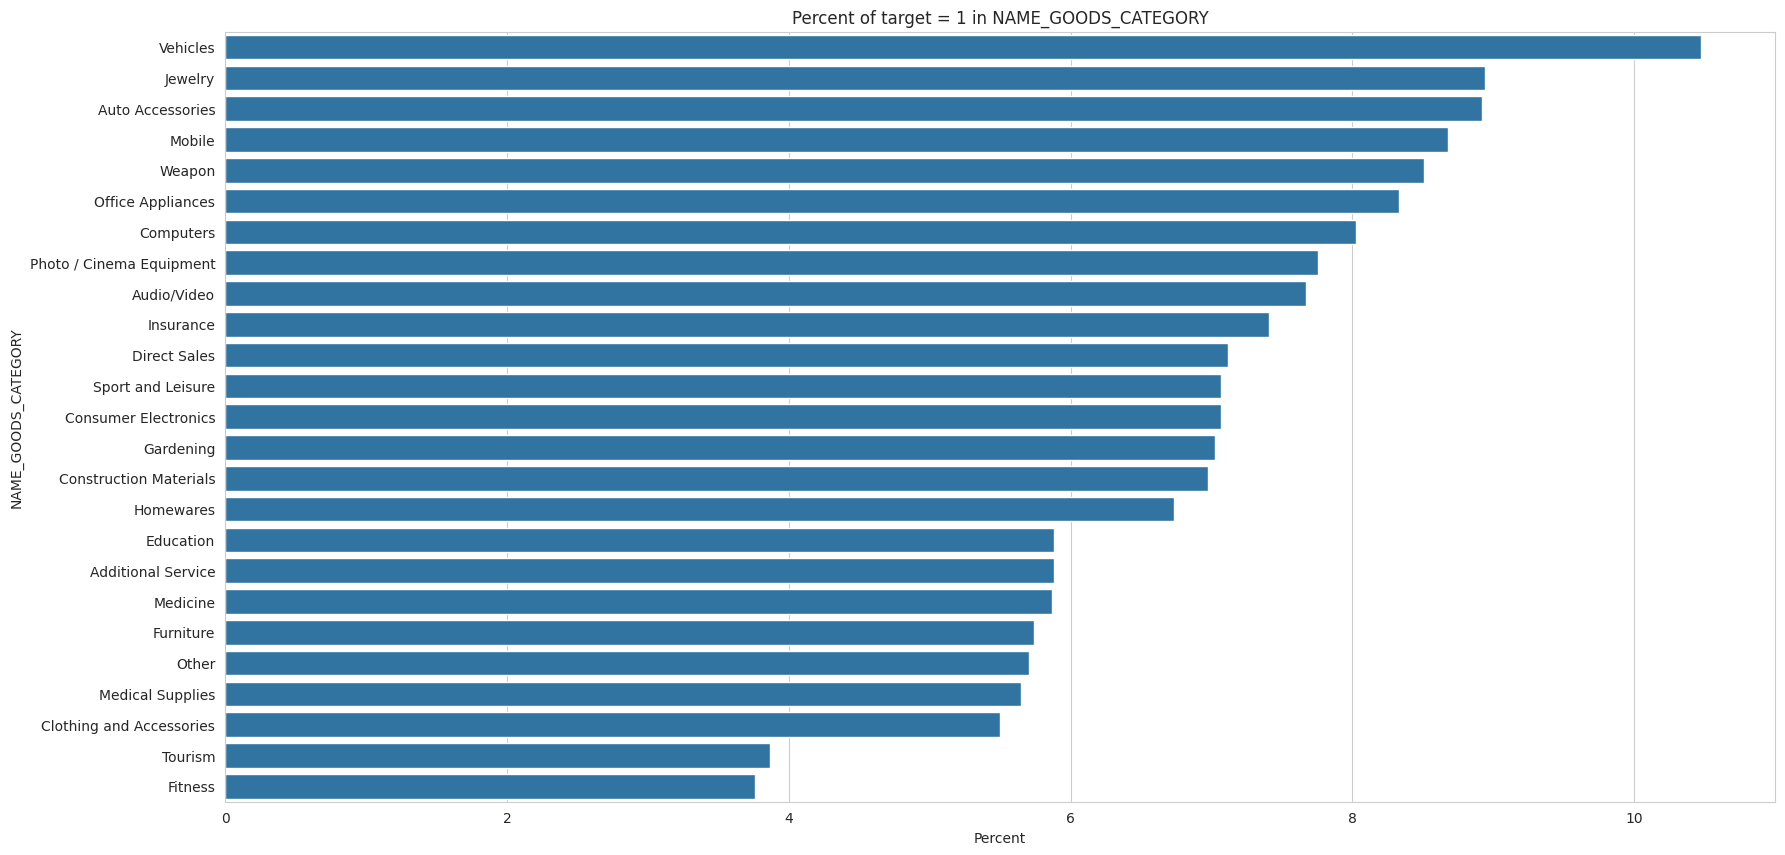

In [ ]:
# vay de mua
plot_percent(df_merge, 'NAME_GOODS_CATEGORY')

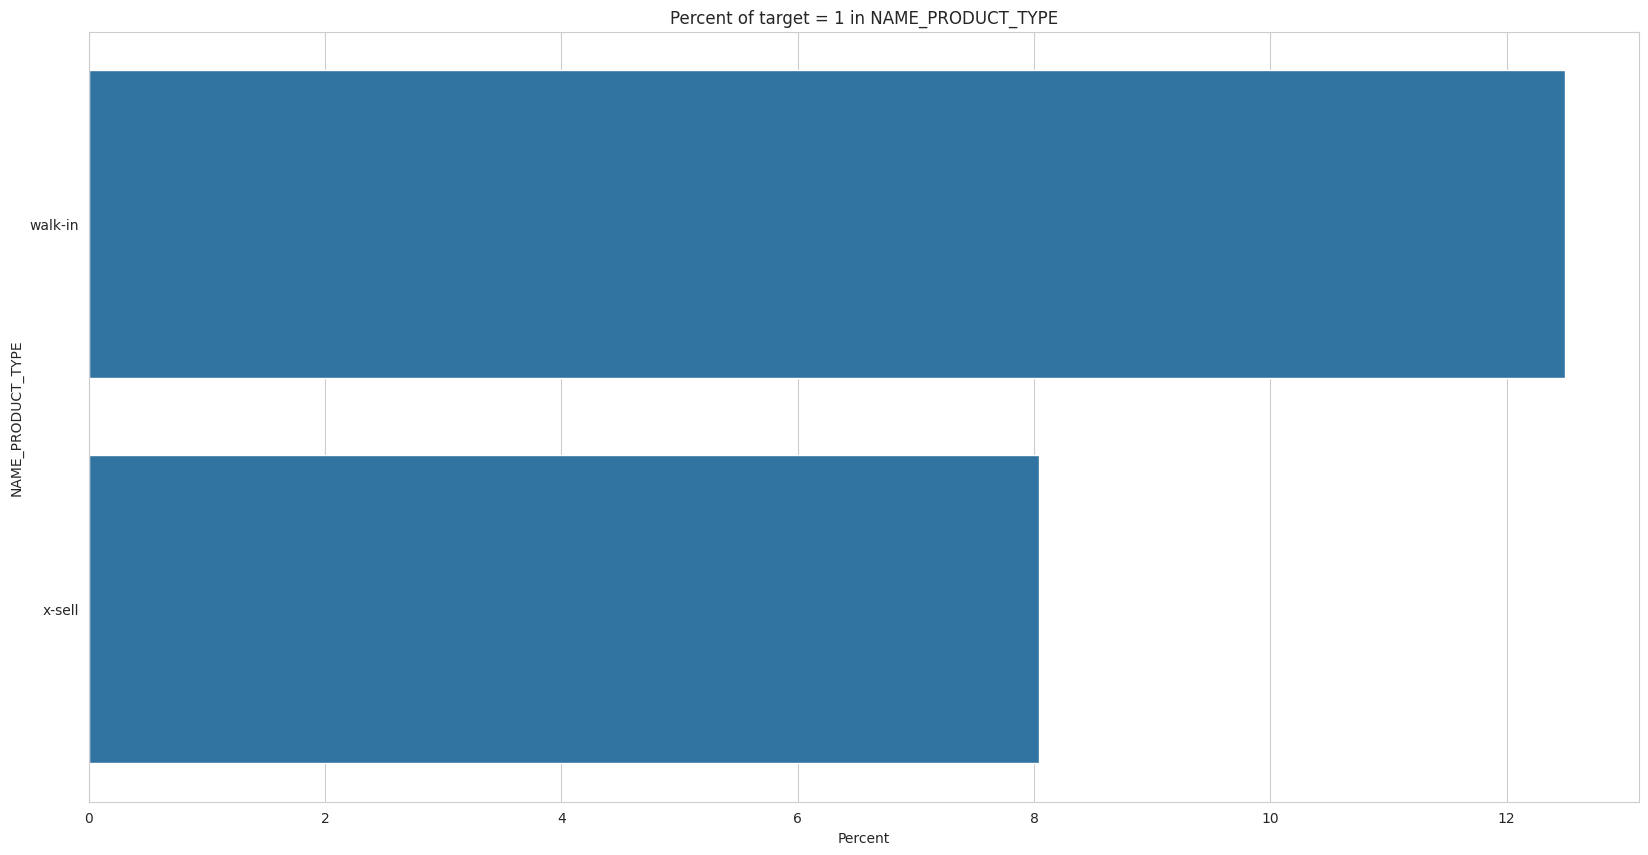

In [ ]:
# NAME_PRODUCT_TYPE
plot_percent(df_merge, 'NAME_PRODUCT_TYPE')

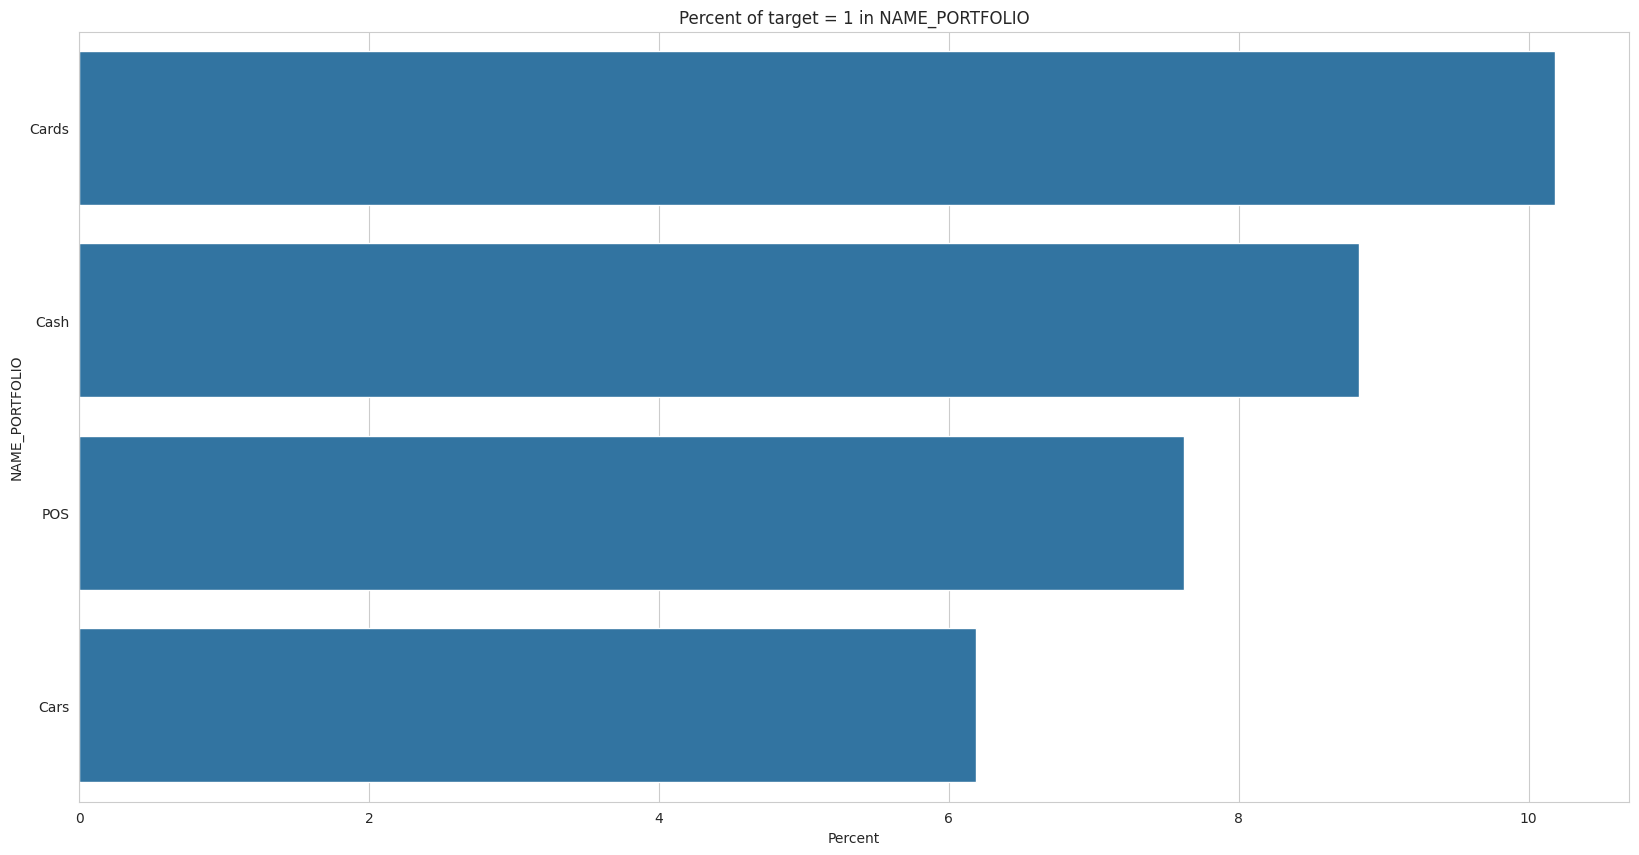

In [ ]:
plot_percent(df_merge, 'NAME_PORTFOLIO')

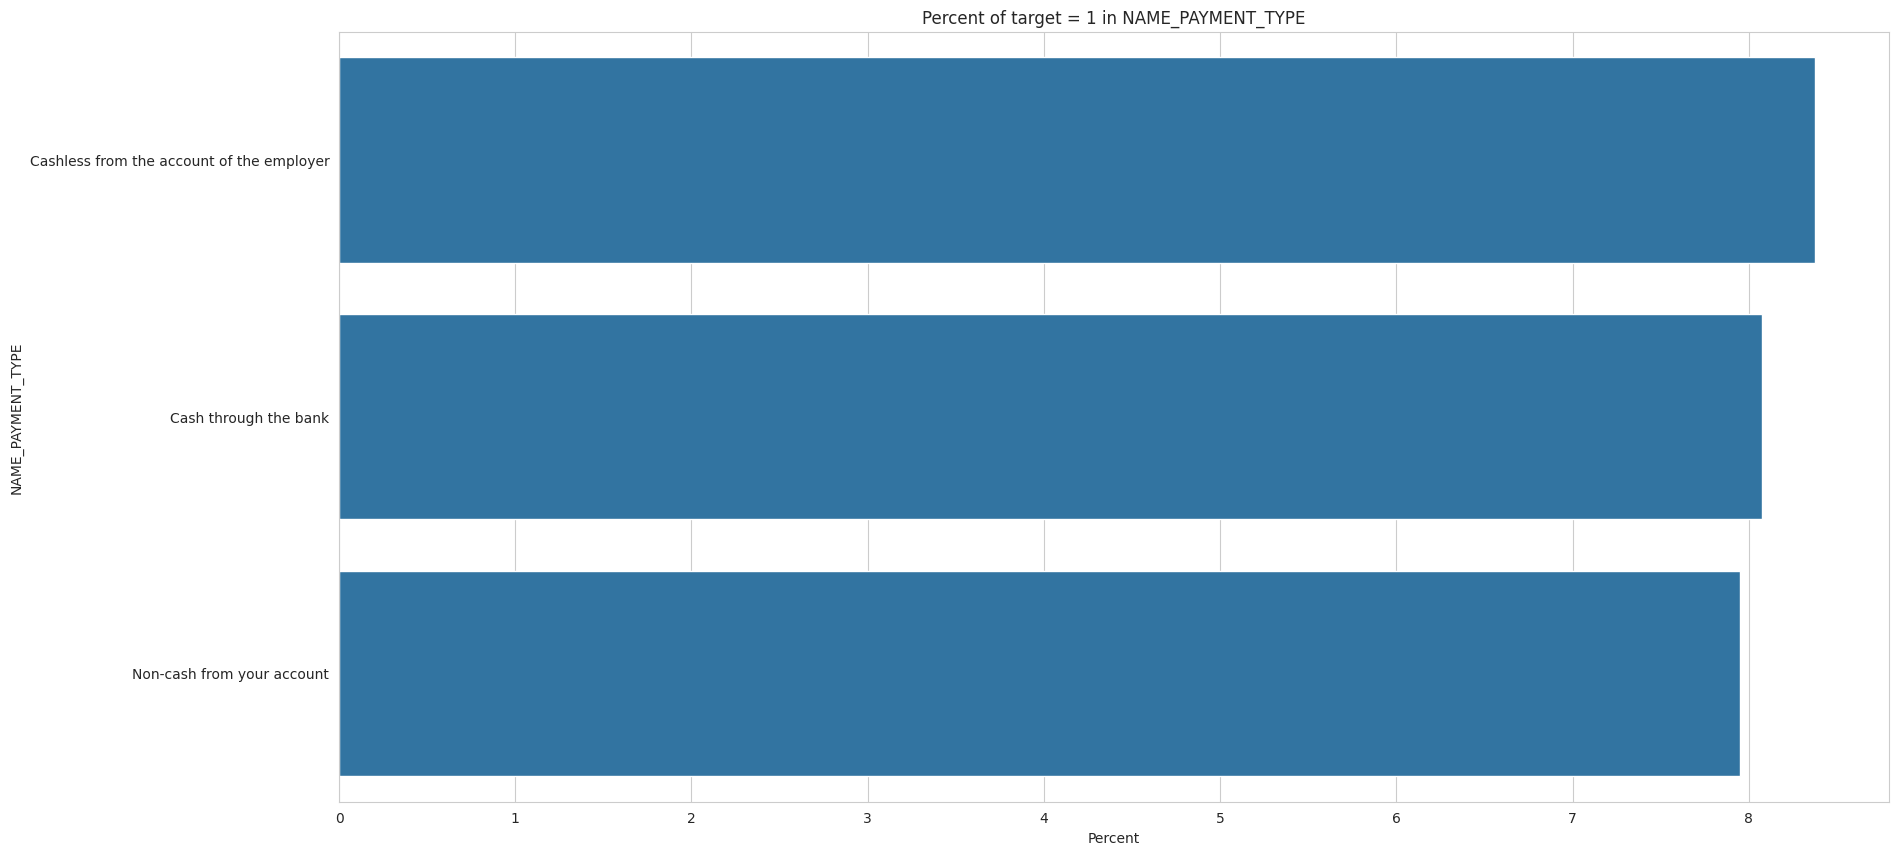

In [ ]:
plot_percent(df_merge, 'NAME_PAYMENT_TYPE')

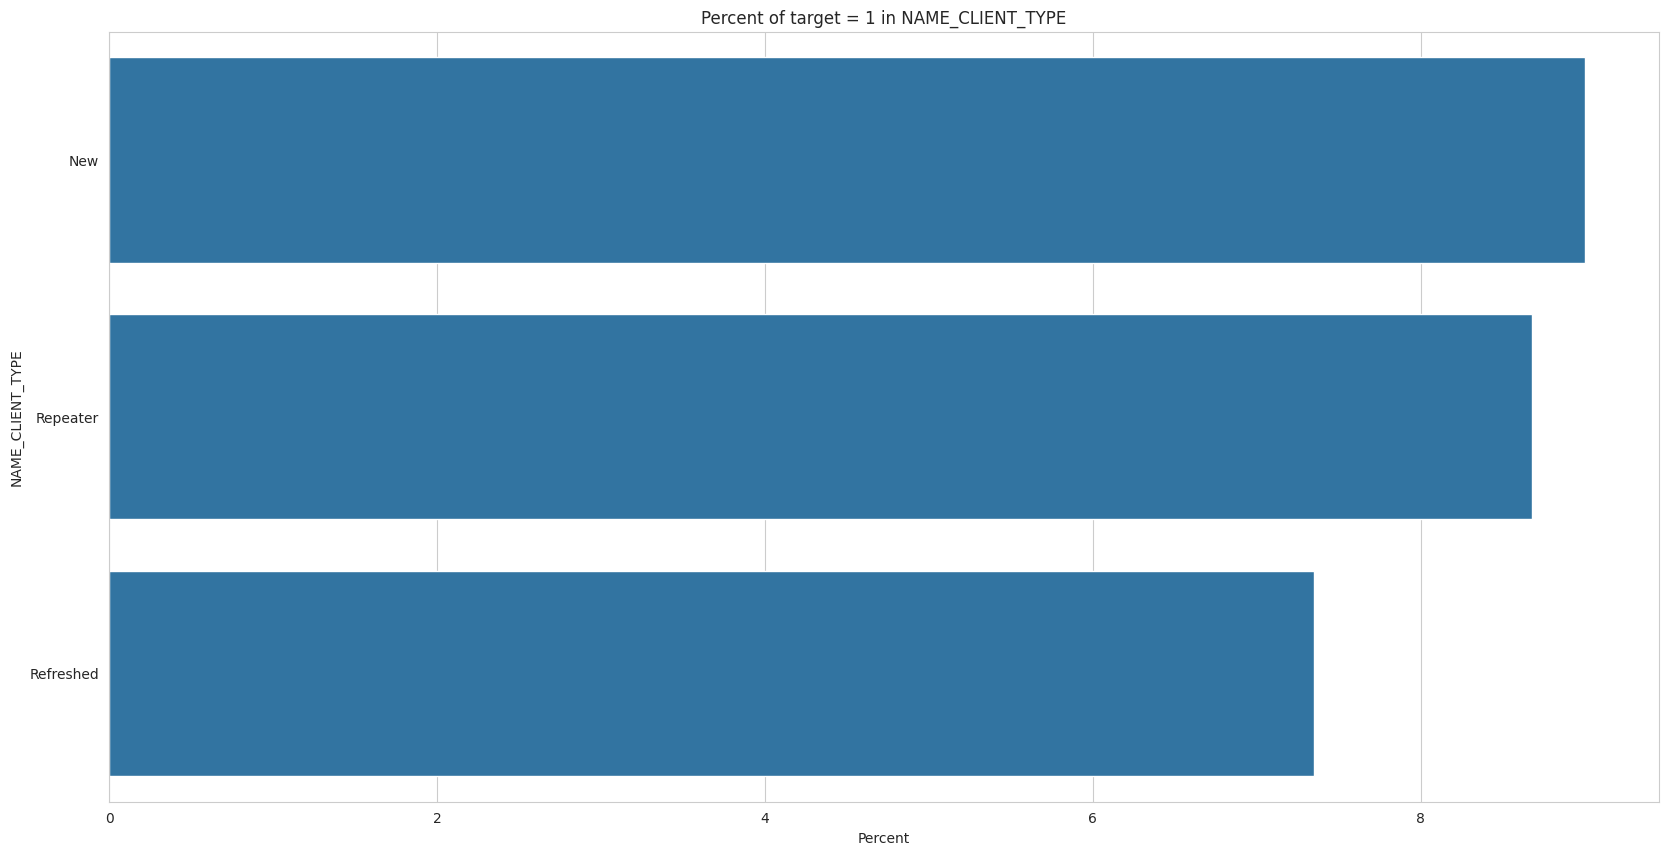

In [ ]:
plot_percent(df_merge, 'NAME_CLIENT_TYPE')

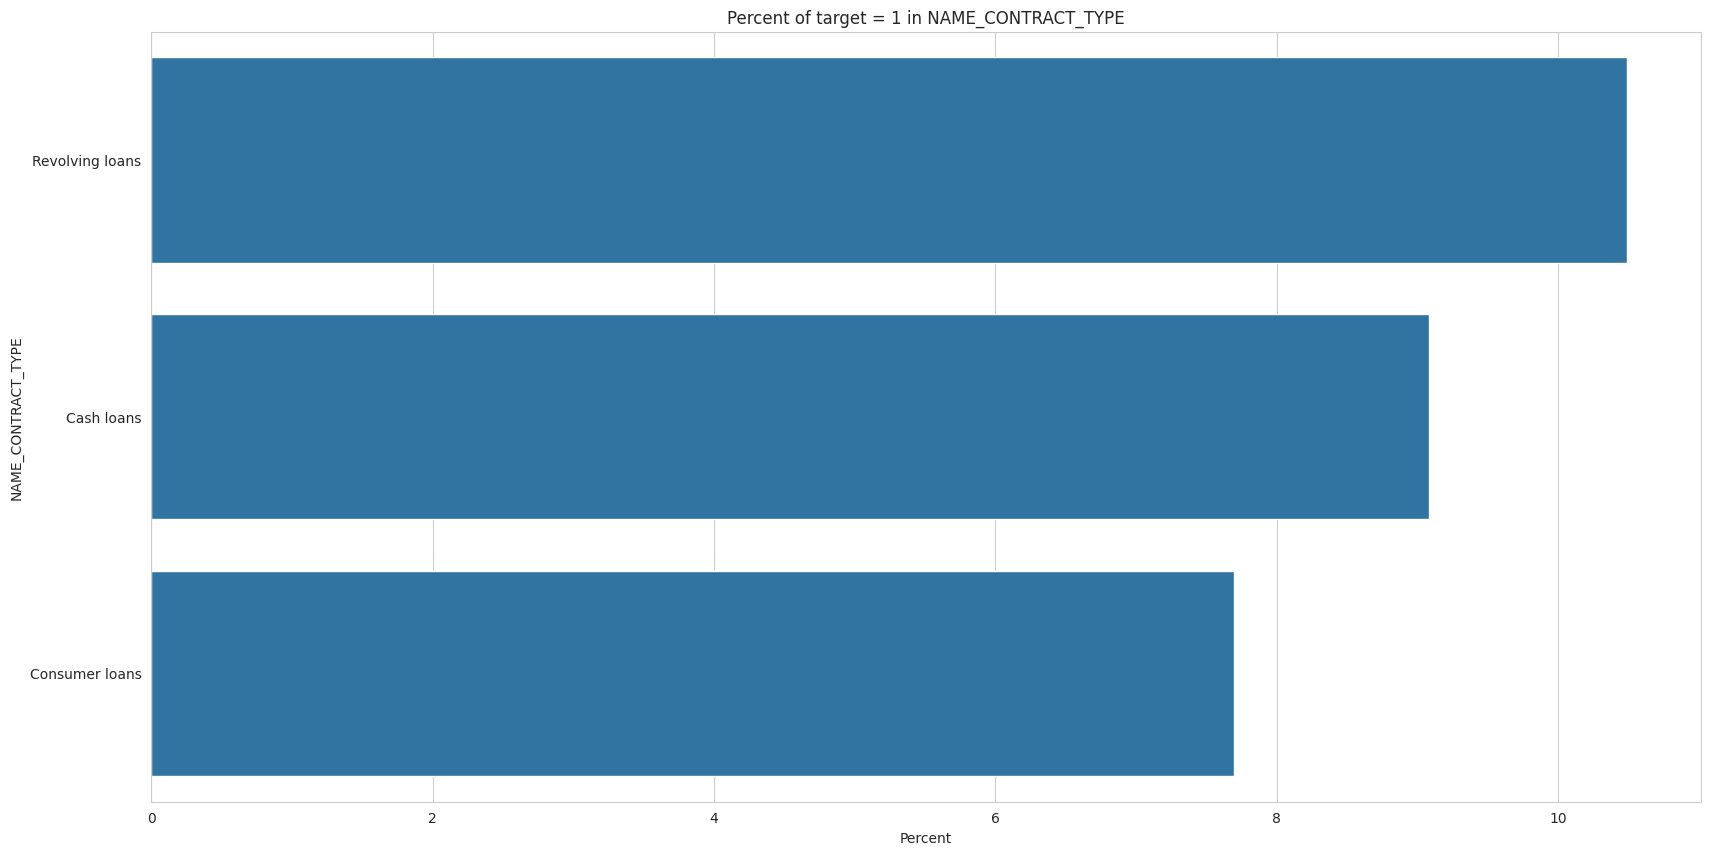

In [ ]:
plot_percent(df_merge, 'NAME_CONTRACT_TYPE')

- Revolving loans (credit card) : Loan applicant is given a credit limit, he/she can spend/withdraw in a month within that credit limit, and at the end of the month HC will inform him minimum payment he needs to make.


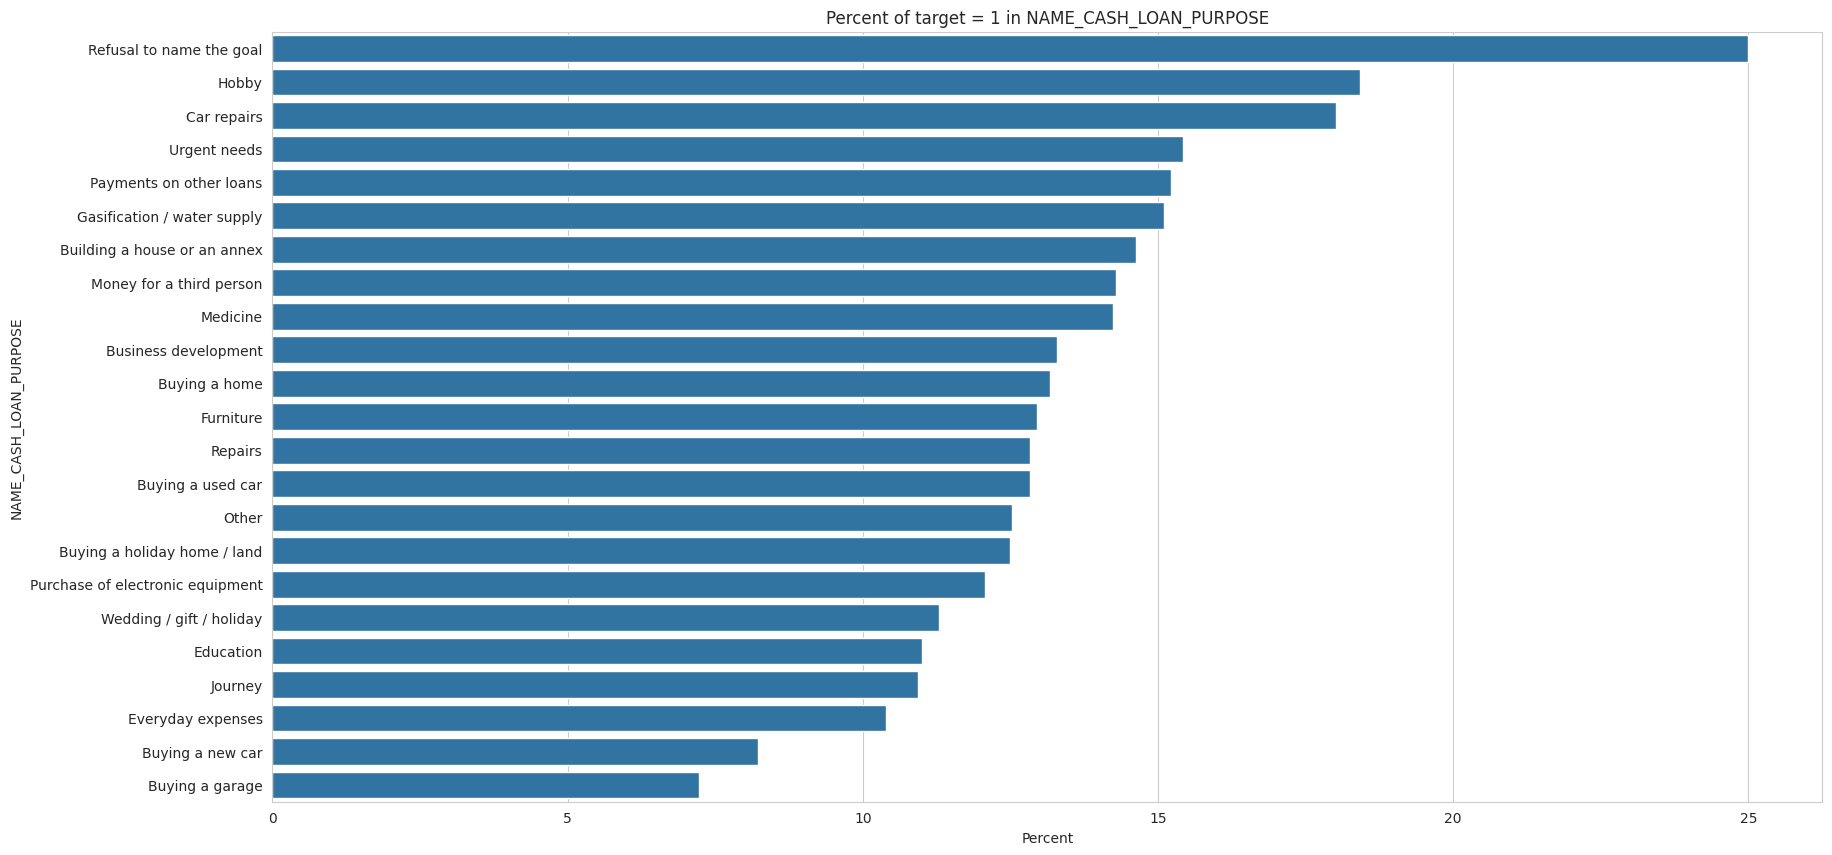

In [ ]:
plot_percent(df_merge,'NAME_CASH_LOAN_PURPOSE')

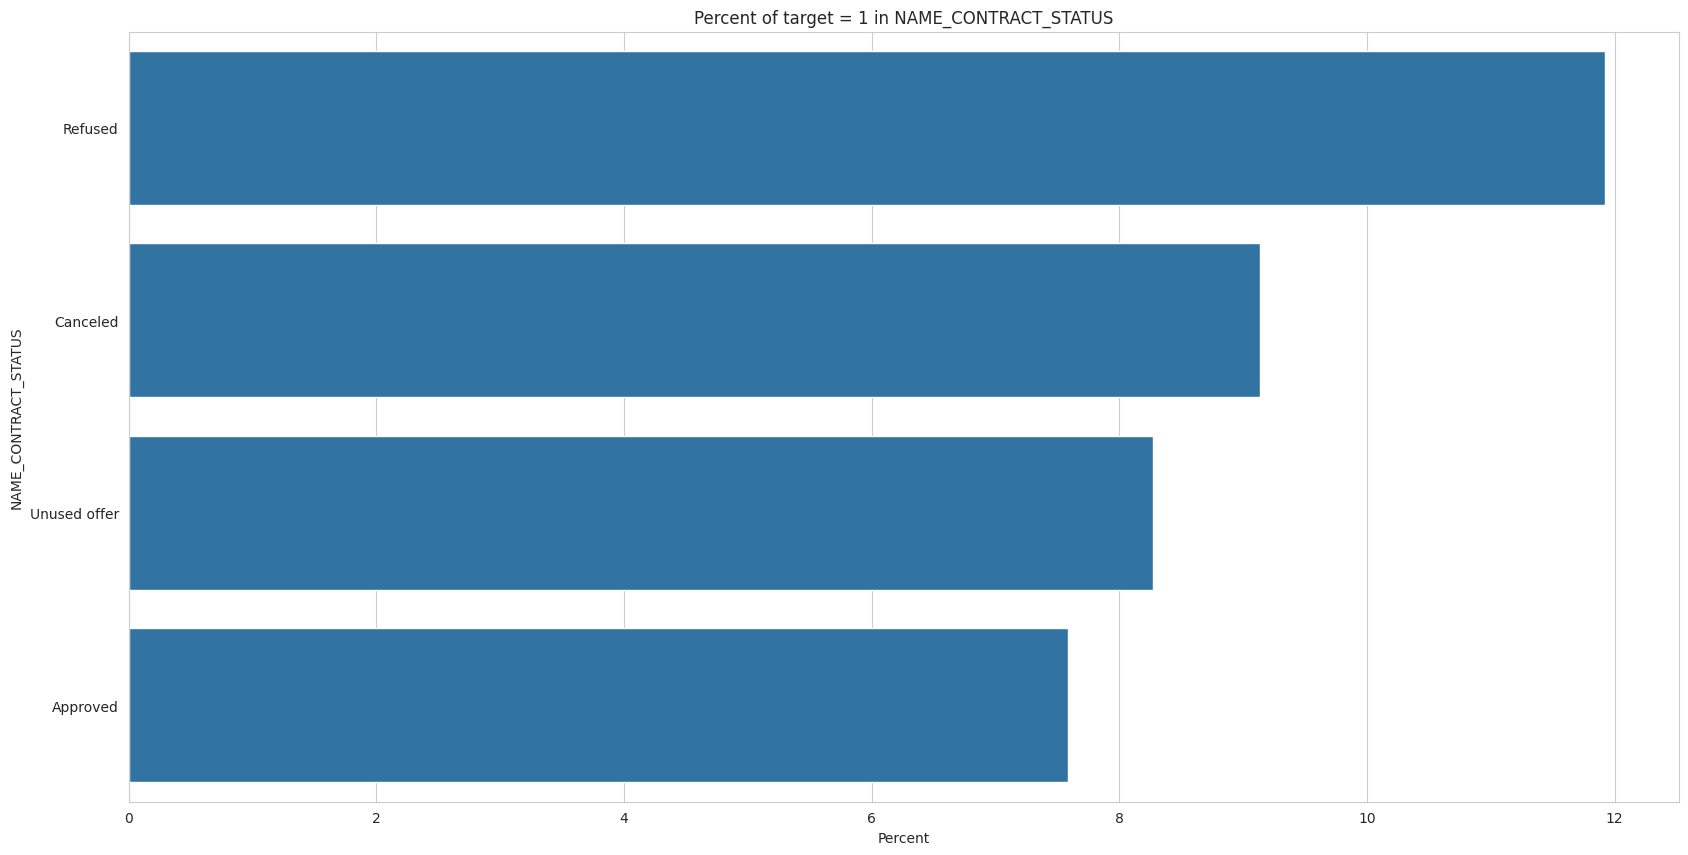

In [ ]:
plot_percent(df_merge,'NAME_CONTRACT_STATUS')

If the application was approved or refused by Home Credit. The status can also be Canceled or Unused offer if the consumer havent used the credit.

mean(TARGET) = 0.086(8.6%) => rate vo no = 8.6%